# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

In [16]:
path = 'C:\\Users\Admin\\Documents\\DL_course_project'

In [17]:
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('.csv'):
            path = os.path.join(dirname, filename) 
            print(path)

C:\Users\Admin\Documents\DL_course_project\default_csv_files\sample_submission.csv
C:\Users\Admin\Documents\DL_course_project\default_csv_files\test.csv
C:\Users\Admin\Documents\DL_course_project\default_csv_files\train.csv


# Data Preprocessing

In [19]:
df = pd.read_csv('default_csv_files/train.csv')

In [20]:
test = pd.read_csv('default_csv_files/test.csv')

In [21]:
df.head(10)

ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...  X375  X376  X377  X378  X379  \
0   0  130.81   k  v  at  a  d  u  j  o  ...     0     0     1     0     0   
1   6   88.53   k  t  av  e  d  y  l  o  ...     1     0     0     0     0   
2   7   76.26  az  w   n  c  d  x  j  x  ...     0     0     0     0     0   
3   9   80.62  az  t   n  f  d  x  l  e  ...     0     0     0     0     0   
4  13   78.02  az  v   n  f  d  h  d  n  ...     0     0     0     0     0   
5  18   92.93   t  b   e  c  d  g  h  s  ...     0     0     1     0     0   
6  24  128.76  al  r   e  f  d  f  h  s  ...     0     0     0     0     0   
7  25   91.91   o  l  as  f  d  f  j  a  ...     0     0     0     0     0   
8  27  108.67   w  s  as  e  d  f  i  h  ...     1     0     0     0     0   
9  30  126.99   j  b  aq  c  d  f  a  e  ...     0     0     1     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  
5     0     0     0     0     0  
6     0     0     0     0     0  
7     0     0     0     0     0  
8     0     0     0     0     0  
9     0     0     0     0     0  

[10 rows x 378 columns]

In [7]:
df.tail(10)

ID       y  X0  X1  X2 X3 X4  X5 X6 X8  ...  X375  X376  X377  X378  \
4199  8395   88.24   t  aa  ay  c  d  aa  l  o  ...     1     0     0     0   
4200  8397  108.59   z  aa   e  c  d  aa  i  w  ...     1     0     0     0   
4201  8399  107.39   w   v   t  d  d  aa  h  g  ...     0     1     0     0   
4202  8402  123.34  ap   l   s  c  d  aa  d  r  ...     0     0     0     0   
4203  8403   85.71  aq   s  as  c  d  aa  a  g  ...     1     0     0     0   
4204  8405  107.39  ak   s  as  c  d  aa  d  q  ...     1     0     0     0   
4205  8406  108.77   j   o   t  d  d  aa  h  h  ...     0     1     0     0   
4206  8412  109.22  ak   v   r  a  d  aa  g  e  ...     0     0     1     0   
4207  8415   87.48  al   r   e  f  d  aa  l  u  ...     0     0     0     0   
4208  8417  110.85   z   r  ae  c  d  aa  g  w  ...     1     0     0     0   

      X379  X380  X382  X383  X384  X385  
4199     0     0     0     0     0     0  
4200     0     0     0     0     0     0  
4201     0     0     0     0     0     0  
4202     0     0     0     0     0     0  
4203     0     0     0     0     0     0  
4204     0     0     0     0     0     0  
4205     0     0     0     0     0     0  
4206     0     0     0     0     0     0  
4207     0     0     0     0     0     0  
4208     0     0     0     0     0     0  

[10 rows x 378 columns]

In [8]:
print(f'df.columns   : {df.columns}')
print(f'df.shape     : {df.shape}')

df.columns   : Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)
df.shape     : (4209, 378)


In [9]:
dtypes_cnt = df.dtypes.groupby(df.dtypes).size()
dtypes_col = df.columns.groupby(df.dtypes)

In [10]:
print("dtypes_cnt    :", dtypes_cnt.to_dict())
print("dtypes_col    :", dtypes_col)

dtypes_cnt    : {dtype('int64'): 369, dtype('float64'): 1, dtype('O'): 8}
dtypes_col    : {int64: ['ID', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', ...], float64: ['y'], object: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']}


In [11]:
df.select_dtypes(include=['int64', 'float64']).head()

ID       y  X10  X11  X12  X13  X14  X15  X16  X17  ...  X375  X376  X377  \
0   0  130.81    0    0    0    1    0    0    0    0  ...     0     0     1   
1   6   88.53    0    0    0    0    0    0    0    0  ...     1     0     0   
2   7   76.26    0    0    0    0    0    0    0    1  ...     0     0     0   
3   9   80.62    0    0    0    0    0    0    0    0  ...     0     0     0   
4  13   78.02    0    0    0    0    0    0    0    0  ...     0     0     0   

   X378  X379  X380  X382  X383  X384  X385  
0     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0  
2     0     0     0     1     0     0     0  
3     0     0     0     0     0     0     0  
4     0     0     0     0     0     0     0  

[5 rows x 370 columns]

In [12]:
df.select_dtypes(exclude=['int64', 'float64']).head()

X0 X1  X2 X3 X4 X5 X6 X8
0   k  v  at  a  d  u  j  o
1   k  t  av  e  d  y  l  o
2  az  w   n  c  d  x  j  x
3  az  t   n  f  d  x  l  e
4  az  v   n  f  d  h  d  n

In [13]:
df.select_dtypes(include=['int64', 'float64']).describe()

ID            y          X10     X11          X12  \
count  4209.000000  4209.000000  4209.000000  4209.0  4209.000000   
mean   4205.960798   100.669318     0.013305     0.0     0.075077   
std    2437.608688    12.679381     0.114590     0.0     0.263547   
min       0.000000    72.110000     0.000000     0.0     0.000000   
25%    2095.000000    90.820000     0.000000     0.0     0.000000   
50%    4220.000000    99.150000     0.000000     0.0     0.000000   
75%    6314.000000   109.010000     0.000000     0.0     0.000000   
max    8417.000000   265.320000     1.000000     0.0     1.000000   

               X13          X14          X15          X16          X17  ...  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000  ...   
mean      0.057971     0.428130     0.000475     0.002613     0.007603  ...   
std       0.233716     0.494867     0.021796     0.051061     0.086872  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     1.000000     0.000000     0.000000     0.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

              X375         X376         X377         X378         X379  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean      0.318841     0.057258     0.314802     0.020670     0.009503   
std       0.466082     0.232363     0.464492     0.142294     0.097033   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     1.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              X380         X382         X383         X384         X385  
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000  
mean      0.008078     0.007603     0.001663     0.000475     0.001426  
std       0.089524     0.086872     0.040752     0.021796     0.037734  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 370 columns]

In [14]:
df.select_dtypes(exclude=['int64', 'float64']).describe()

X0    X1    X2    X3    X4    X5    X6    X8
count   4209  4209  4209  4209  4209  4209  4209  4209
unique    47    27    44     7     4    29    12    25
top        z    aa    as     c     d     v     g     j
freq     360   833  1659  1942  4205   231  1042   277

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [16]:
df.isna().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [17]:
print('column name'.ljust(20), '# unique values')
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    print(col.ljust(20), '=>', df[col].nunique())

column name          # unique values
ID                   => 4209
y                    => 2545
X10                  => 2
X11                  => 1
X12                  => 2
X13                  => 2
X14                  => 2
X15                  => 2
X16                  => 2
X17                  => 2
X18                  => 2
X19                  => 2
X20                  => 2
X21                  => 2
X22                  => 2
X23                  => 2
X24                  => 2
X26                  => 2
X27                  => 2
X28                  => 2
X29                  => 2
X30                  => 2
X31                  => 2
X32                  => 2
X33                  => 2
X34                  => 2
X35                  => 2
X36                  => 2
X37                  => 2
X38                  => 2
X39                  => 2
X40                  => 2
X41                  => 2
X42                  => 2
X43                  => 2
X44                  => 2
X45                  

In [18]:
print('column name'.ljust(20), '# unique values')
for col in df.select_dtypes(exclude=['int64', 'float64']).columns:
    print(col.ljust(20), '=>', df[col].nunique())

column name          # unique values
X0                   => 47
X1                   => 27
X2                   => 44
X3                   => 7
X4                   => 4
X5                   => 29
X6                   => 12
X8                   => 25


In [19]:
categorical_features = [col for col in df.columns if df[col].nunique() < 50]
numerical_features   = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col not in categorical_features]

In [20]:
for col in categorical_features:
    print(col.ljust(20), '=>', df[col].unique())

X0                   => ['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
X1                   => ['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
X2                   => ['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
X3                   => ['a' 'e' 'c' 'f' 'd' 'b' 'g']
X4                   => ['d' 'b' 'c' 'a']
X5                   => ['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
X6                   => ['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
X8                   => ['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j

In [21]:
df = df.drop(columns=['ID'])

In [22]:
test_id = test['ID']
test = test.drop(columns=['ID'])

In [23]:
nan_percent = {col : df[col].isnull().mean() for col in df.columns}
nan_percent = pd.DataFrame(sorted(nan_percent.items(), key=lambda x: x[1], reverse=True))
nan_percent = nan_percent[nan_percent[1] > 0.0]
nan_percent

Empty DataFrame
Columns: [0, 1]
Index: []

In [24]:
for col in test.select_dtypes(exclude=['int64', 'float64']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])
    test[col] = test[col].fillna(test[col].mode()[0])
for col in test.select_dtypes(include=['int64', 'float64']).columns:
    df[col] = df[col].fillna(df[col].median())
    test[col] = test[col].fillna(test[col].median())
df['y'] = df['y'].fillna(df['y'].median())

In [25]:
categorical_features = [col for col in df.columns if df[col].nunique() < 50]
numerical_features   = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col not in categorical_features]

# Data Visualization

In [26]:
# Distribution Plots:
def my_histplot(df, col, ax):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Histogram Plot of {col}')
def my_distplot(df, col, ax):
    sns.distplot(df[col], ax=ax)
    ax.set_title(f'Distribution Plot of {col}')
def my_kdeplot(df, col, ax):
    sns.kdeplot(df[col], ax=ax, fill=True)
    ax.set_title(f'KDE Plot of {col}')

# Relational Plots:
def my_scatterplot(df, col, ax):
    sns.scatterplot(df[col], ax=ax)
    ax.set_title(f'Scatter Plot of {col}')
def my_lineplot(df, col, ax):
    sns.lineplot(df[col], ax=ax)
    ax.set_title(f'Line Plot of {col}')
    
# Categorical Plots:
def my_pie_chart(df, col, ax):
    labels = df[col].value_counts()
    ax.pie(labels, labels=labels.index, autopct='%1.1f%%')
    ax.set_title(f'Pie Chart of {col}')
def my_countplot(df, col, ax):
    sns.countplot(x=df[col], ax=ax)
    ax.set_title(f'Count Plot of {col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
def my_boxplot(df, col, ax):
    sns.boxplot(df[col], ax=ax)
def my_violinplot(df, col, ax):
    sns.violinplot(df[col], ax=ax)
    
# Matrix Plots:
def my_heatmap(df, size):
    if size: plt.figure(figsize=size)
    sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap='Blues', annot_kws={"size": 12})
    plt.title('Correlation Heatmap')
    plt.show()

In [27]:
def plot_charts_grid_single_feature(df, plot_func, size=(12, 4), n_col=1):
    if len(df.columns) == 0:
        return
    n_rows = (len(df.columns) + n_col-1) // n_col
    fig, axes = plt.subplots(n_rows, n_col, figsize=(size[0]*n_col, size[1]*n_rows))
    if len(df.columns) == 1:
        axes = np.array([axes])
    axes = axes.flatten()
    
    for i, label in enumerate(df.columns):
        plot_func(df, label, axes[i])
        axes[i].set_xlabel(label)

    for j in range(i+1, n_rows*n_col):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

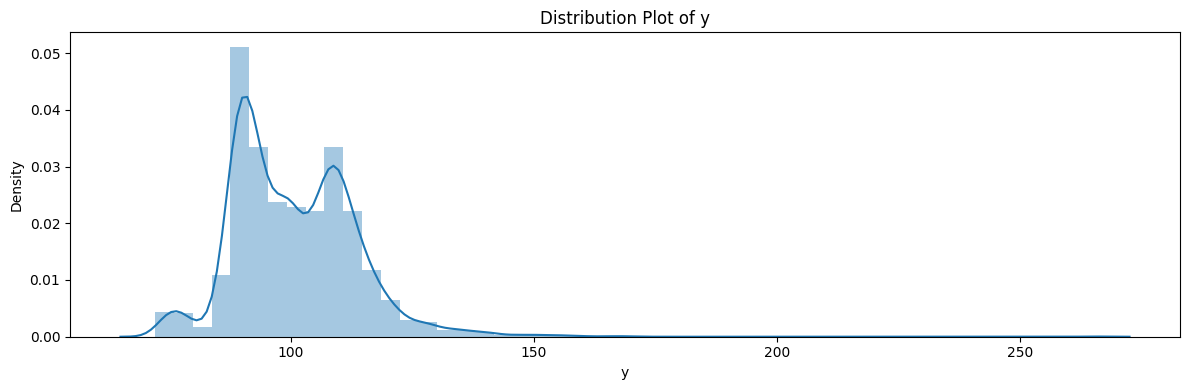

In [28]:
plot_charts_grid_single_feature(df[numerical_features], my_distplot)

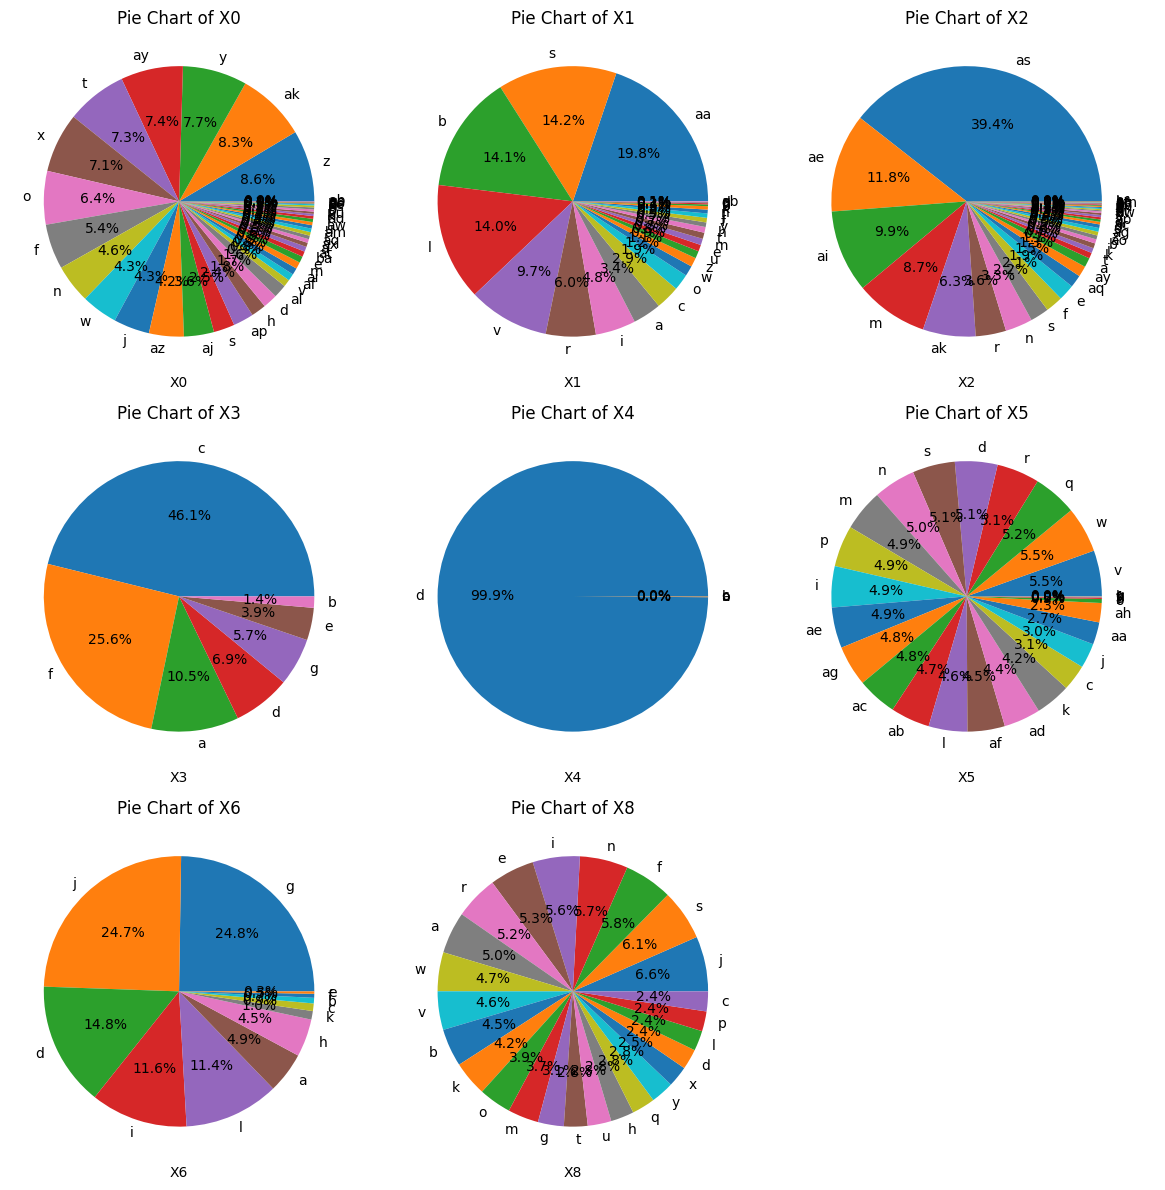

In [29]:
plot_charts_grid_single_feature(df[categorical_features[:8]], my_pie_chart, size=(4, 4), n_col=3)

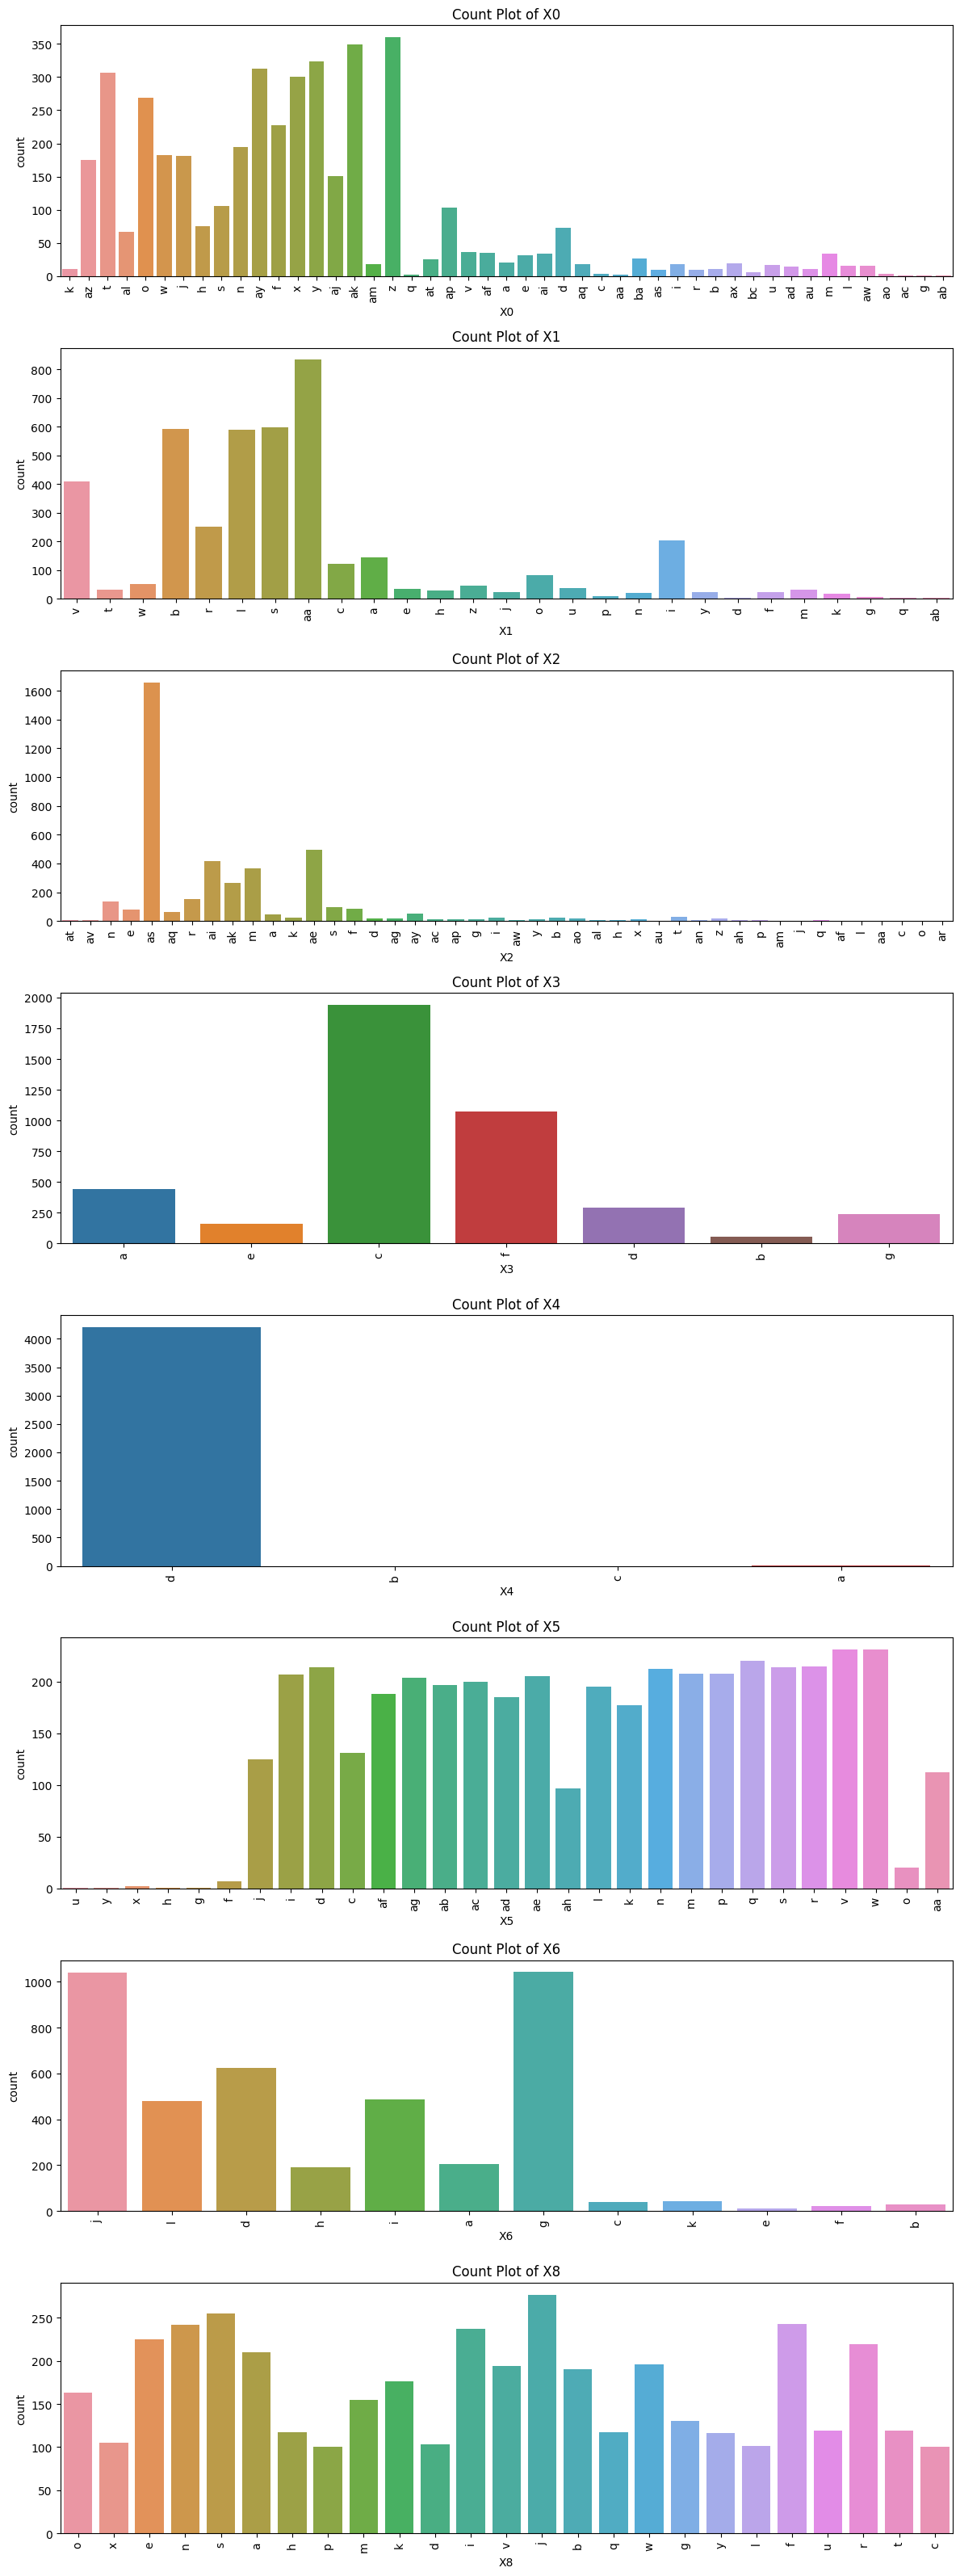

In [30]:
plot_charts_grid_single_feature(df[categorical_features[:8]], my_countplot)

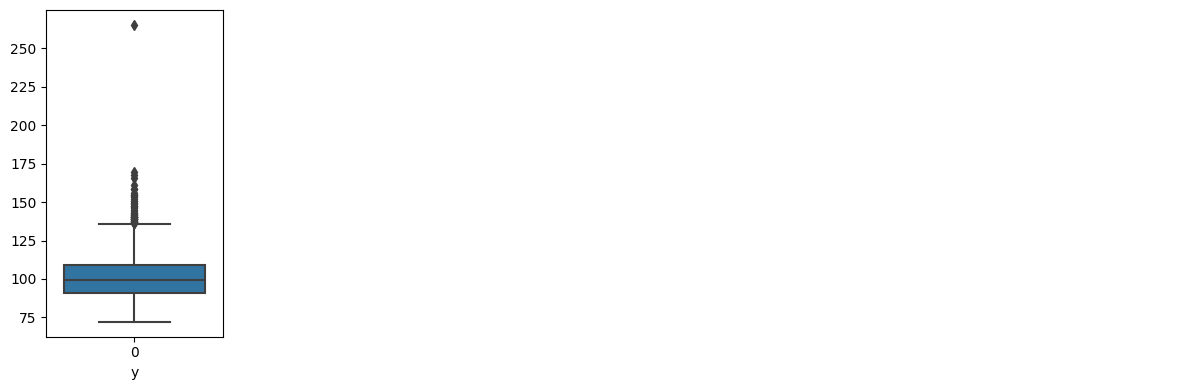

In [31]:
plot_charts_grid_single_feature(df[numerical_features], my_boxplot, size=(2, 4), n_col=6)

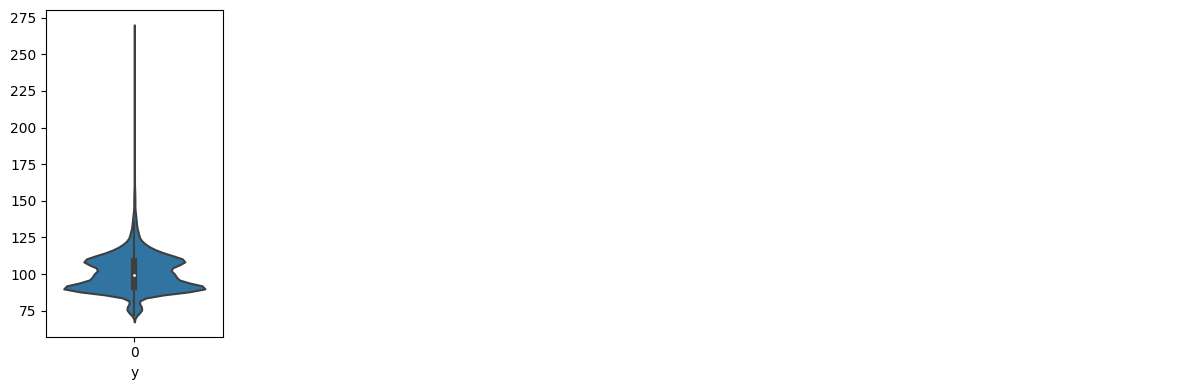

In [32]:
plot_charts_grid_single_feature(df[numerical_features], my_violinplot, size=(2, 4), n_col=6)

In [33]:
def plot_charts_grid_multiple_feature(df, columns, plot_func, y_col, size=(12, 4), n_col=1):
    if len(columns) == 0:
        return
    n_rows = (len(columns) + n_col-1) // n_col
    fig, axes = plt.subplots(n_rows, n_col, figsize=(size[0]*n_col, size[1]*n_rows))
    if len(columns) == 1:
        axes = np.array([axes])
    axes = axes.flatten()
    
    for i, label in enumerate(columns):
        plot_func(x=label, y=y_col, ax=axes[i], data=df)
        axes[i].set_xlabel(label)

    for j in range(i+1, n_rows*n_col):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

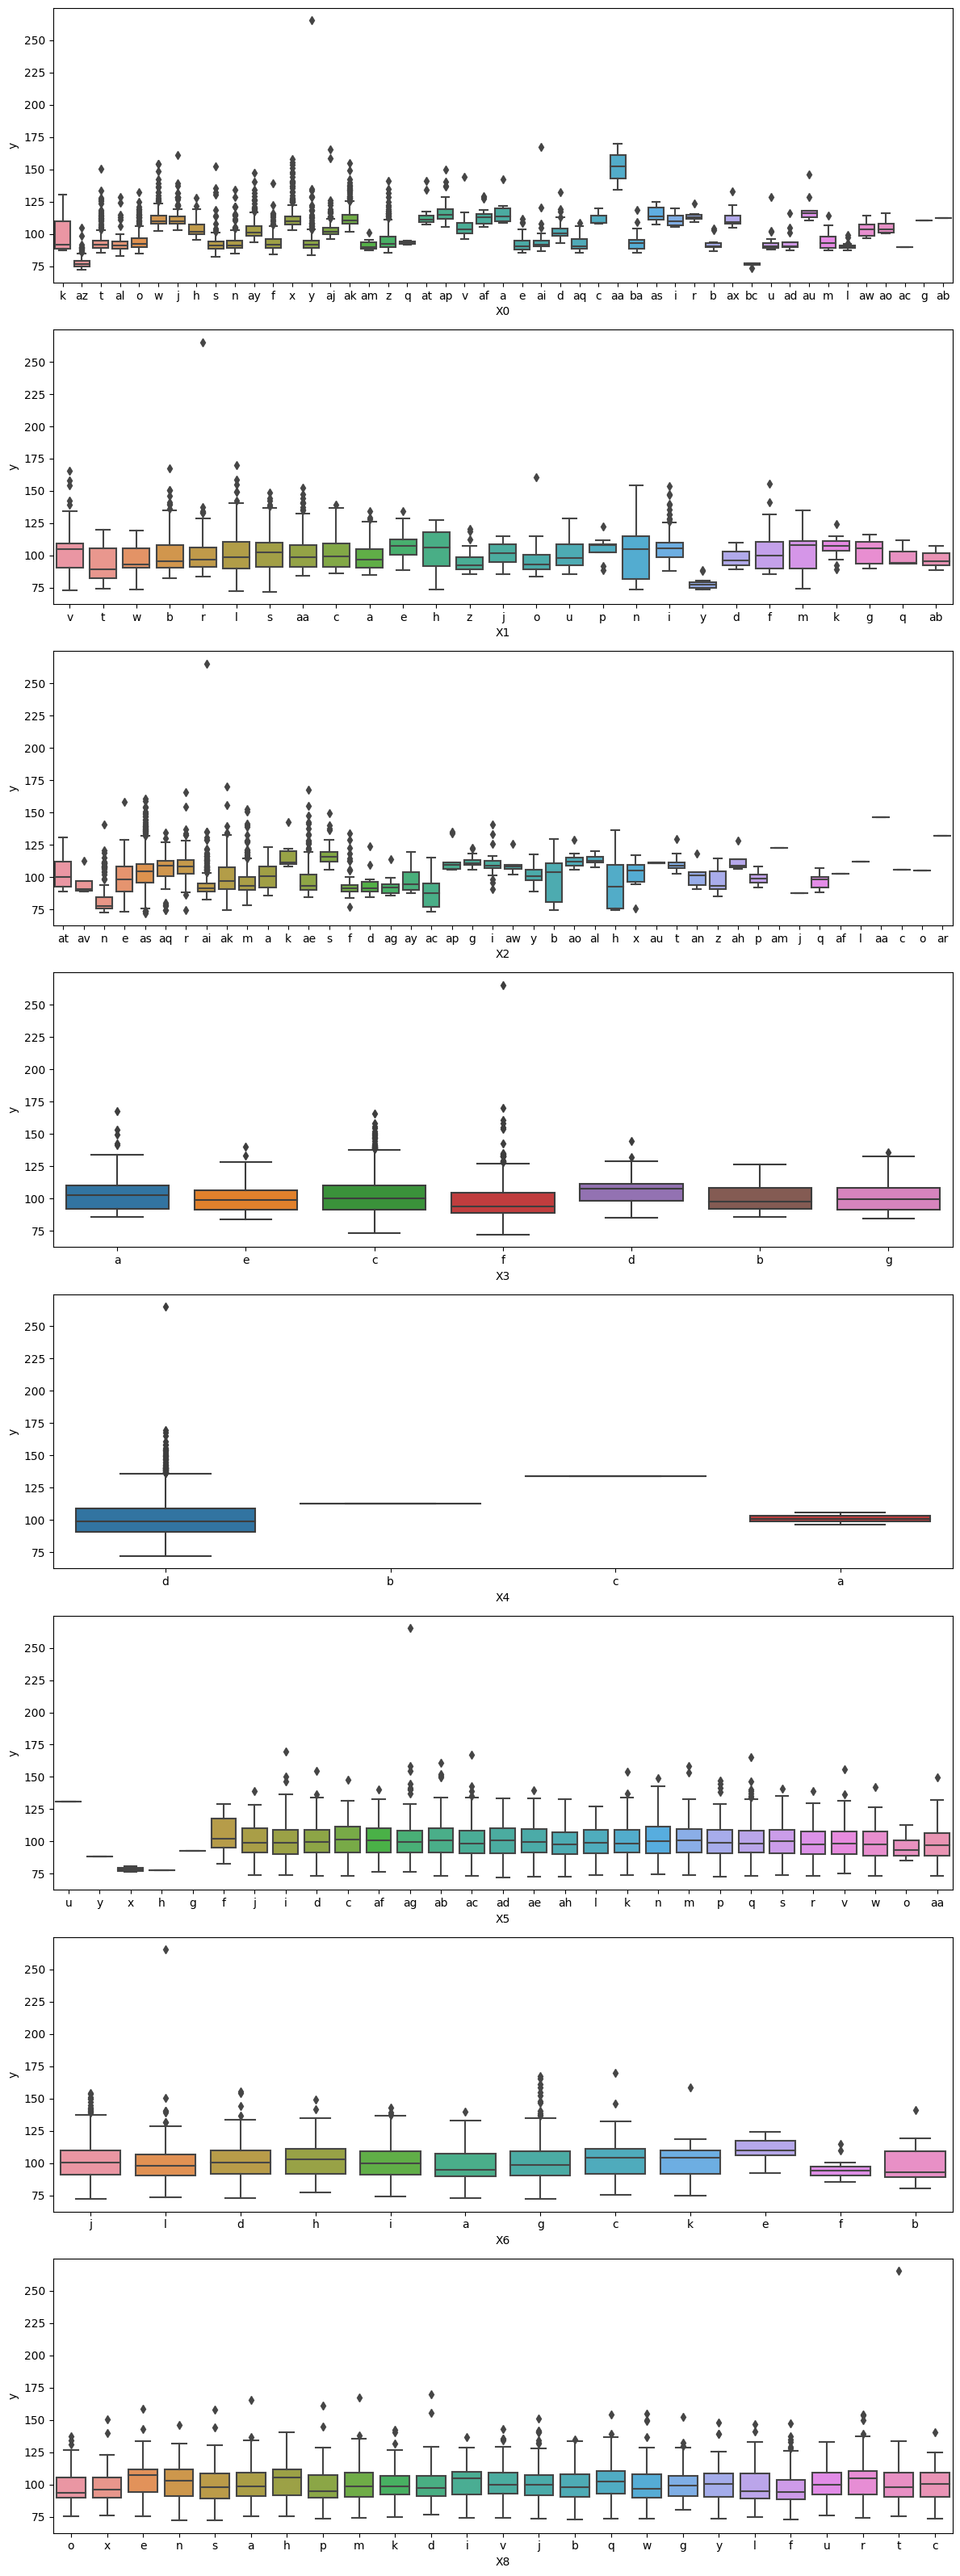

In [34]:
plot_charts_grid_multiple_feature(df, categorical_features[:8], sns.boxplot, y_col='y')

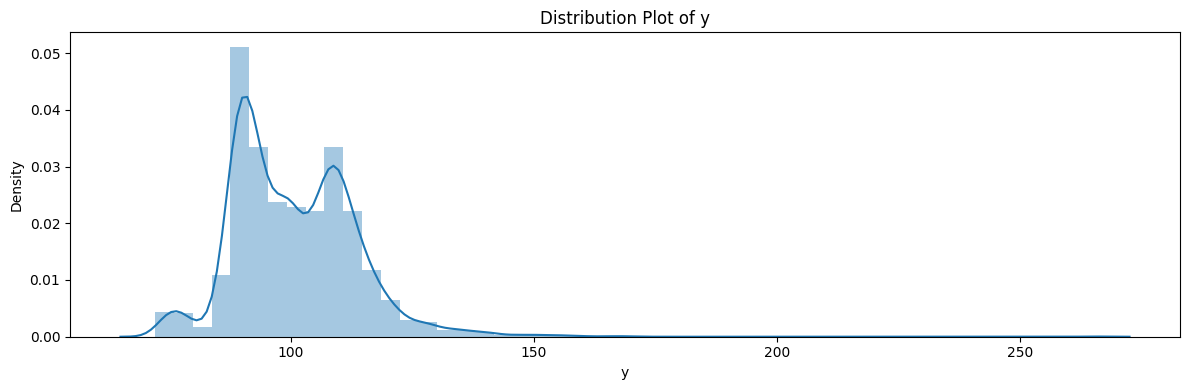

In [35]:
plot_charts_grid_single_feature(df[numerical_features], my_distplot)

# Feature Engineering and Transformation

In [36]:
df.head(10)

y  X0 X1  X2 X3 X4 X5 X6 X8  X10  ...  X375  X376  X377  X378  X379  \
0  130.81   k  v  at  a  d  u  j  o    0  ...     0     0     1     0     0   
1   88.53   k  t  av  e  d  y  l  o    0  ...     1     0     0     0     0   
2   76.26  az  w   n  c  d  x  j  x    0  ...     0     0     0     0     0   
3   80.62  az  t   n  f  d  x  l  e    0  ...     0     0     0     0     0   
4   78.02  az  v   n  f  d  h  d  n    0  ...     0     0     0     0     0   
5   92.93   t  b   e  c  d  g  h  s    0  ...     0     0     1     0     0   
6  128.76  al  r   e  f  d  f  h  s    0  ...     0     0     0     0     0   
7   91.91   o  l  as  f  d  f  j  a    0  ...     0     0     0     0     0   
8  108.67   w  s  as  e  d  f  i  h    0  ...     1     0     0     0     0   
9  126.99   j  b  aq  c  d  f  a  e    0  ...     0     0     1     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  
5     0     0     0     0     0  
6     0     0     0     0     0  
7     0     0     0     0     0  
8     0     0     0     0     0  
9     0     0     0     0     0  

[10 rows x 377 columns]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, y to X385
dtypes: float64(1), int64(368), object(8)
memory usage: 12.1+ MB


In [38]:
from sklearn.preprocessing import LabelEncoder

def encode_str_features(df):
    label_encoder = LabelEncoder()
    for col in df.select_dtypes(exclude=['int64', 'float64']).columns:
        df[col]  = label_encoder.fit_transform(df[col])

In [39]:
encode_str_features(df)
encode_str_features(test)

In [40]:
df.select_dtypes(include=['int64', 'float64']).head(10)

y  X0  X1  X2  X3  X4  X5  X6  X8  X10  ...  X375  X376  X377  X378  \
0  130.81  32  23  17   0   3  24   9  14    0  ...     0     0     1     0   
1   88.53  32  21  19   4   3  28  11  14    0  ...     1     0     0     0   
2   76.26  20  24  34   2   3  27   9  23    0  ...     0     0     0     0   
3   80.62  20  21  34   5   3  27  11   4    0  ...     0     0     0     0   
4   78.02  20  23  34   5   3  12   3  13    0  ...     0     0     0     0   
5   92.93  40   3  25   2   3  11   7  18    0  ...     0     0     1     0   
6  128.76   9  19  25   5   3  10   7  18    0  ...     0     0     0     0   
7   91.91  36  13  16   5   3  10   9   0    0  ...     0     0     0     0   
8  108.67  43  20  16   4   3  10   8   7    0  ...     1     0     0     0   
9  126.99  31   3  14   2   3  10   0   4    0  ...     0     0     1     0   

   X379  X380  X382  X383  X384  X385  
0     0     0     0     0     0     0  
1     0     0     0     0     0     0  
2     0     0     1     0     0     0  
3     0     0     0     0     0     0  
4     0     0     0     0     0     0  
5     0     0     0     0     0     0  
6     0     0     0     0     0     0  
7     0     0     0     0     0     0  
8     0     0     0     0     0     0  
9     0     0     0     0     0     0  

[10 rows x 377 columns]

In [41]:
for col in df.select_dtypes(exclude=['int64', 'float64']).columns:
    print(col.ljust(20), df[col].nunique())

In [42]:
df['log_y'] = np.log1p(df['y'])

In [43]:
def get_nonnumerical_features(df):
    return list(df.select_dtypes(exclude=['int64', 'float64']).columns)

def get_one_value_features(df):
    return [col for col in df.columns if df[col].nunique() == 1]

In [44]:
nonnumerical_features = list(set(get_nonnumerical_features(df) + get_nonnumerical_features(test)))
one_value_features    = list(set(get_one_value_features(df)    + get_one_value_features(test)))
useless_features      = list(set(nonnumerical_features + one_value_features))

In [45]:
df   = df.drop(columns=useless_features)
test = test.drop(columns=useless_features)

In [46]:
categorical_features = [col for col in df.columns if df[col].nunique() < 50]
numerical_features   = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col not in categorical_features]

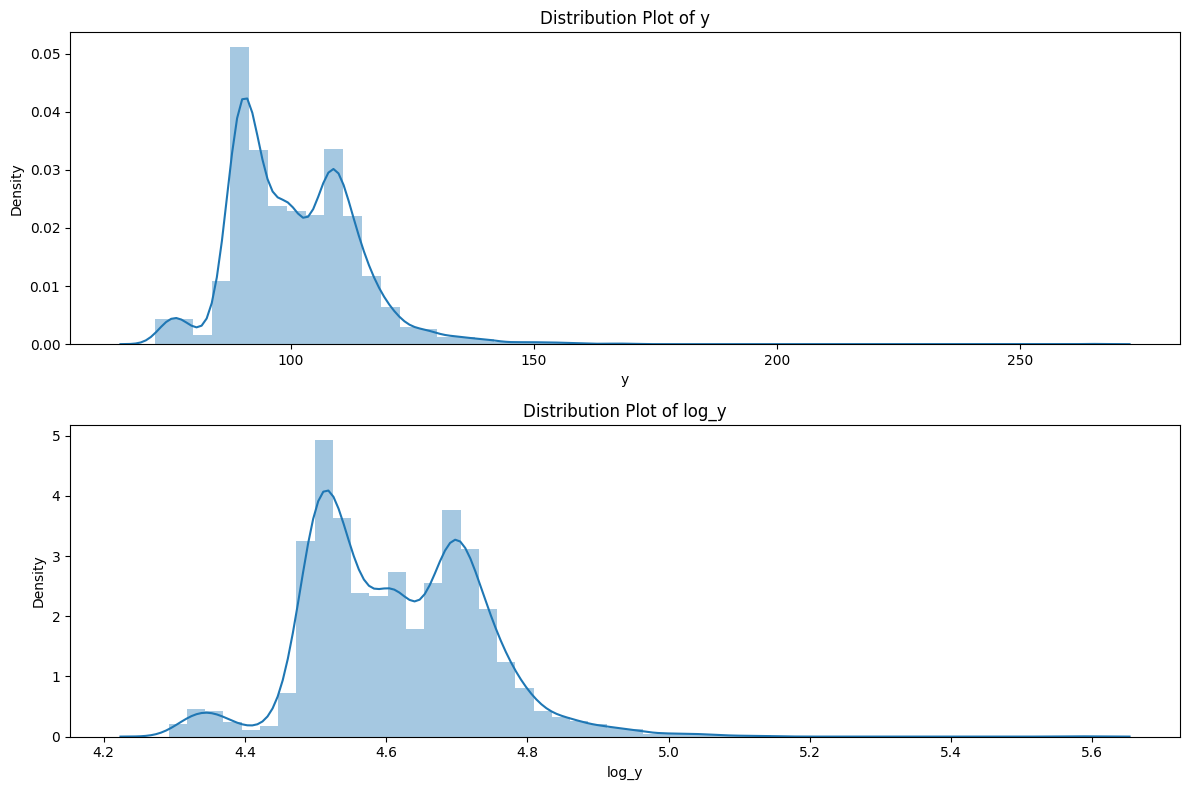

In [47]:
plot_charts_grid_single_feature(df[numerical_features], my_distplot)

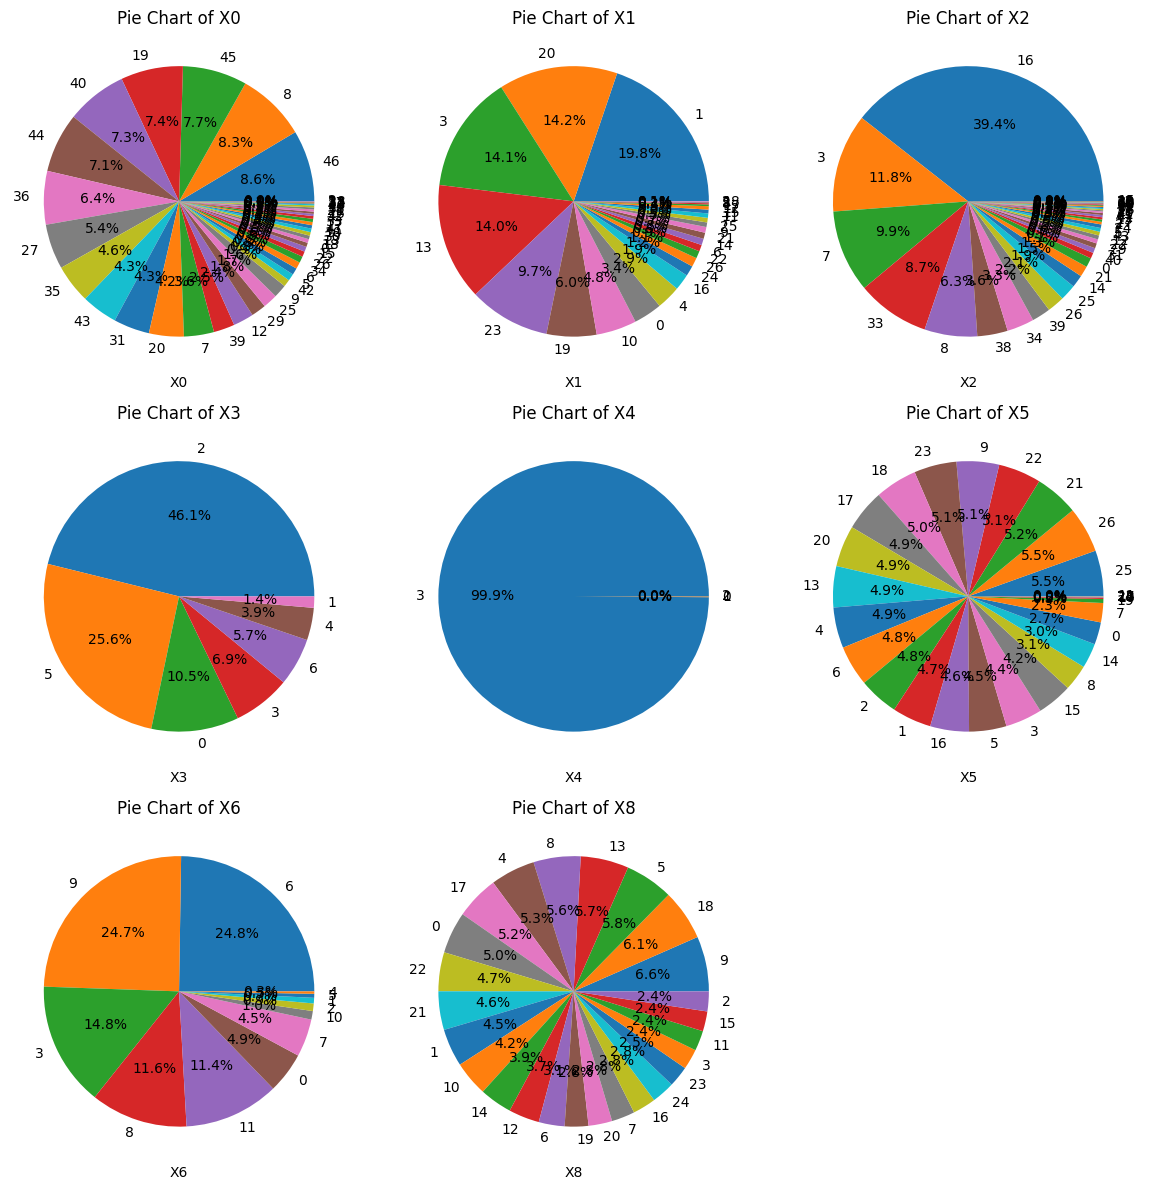

In [48]:
plot_charts_grid_single_feature(df[categorical_features[:8]], my_pie_chart, size=(4, 4), n_col=3)

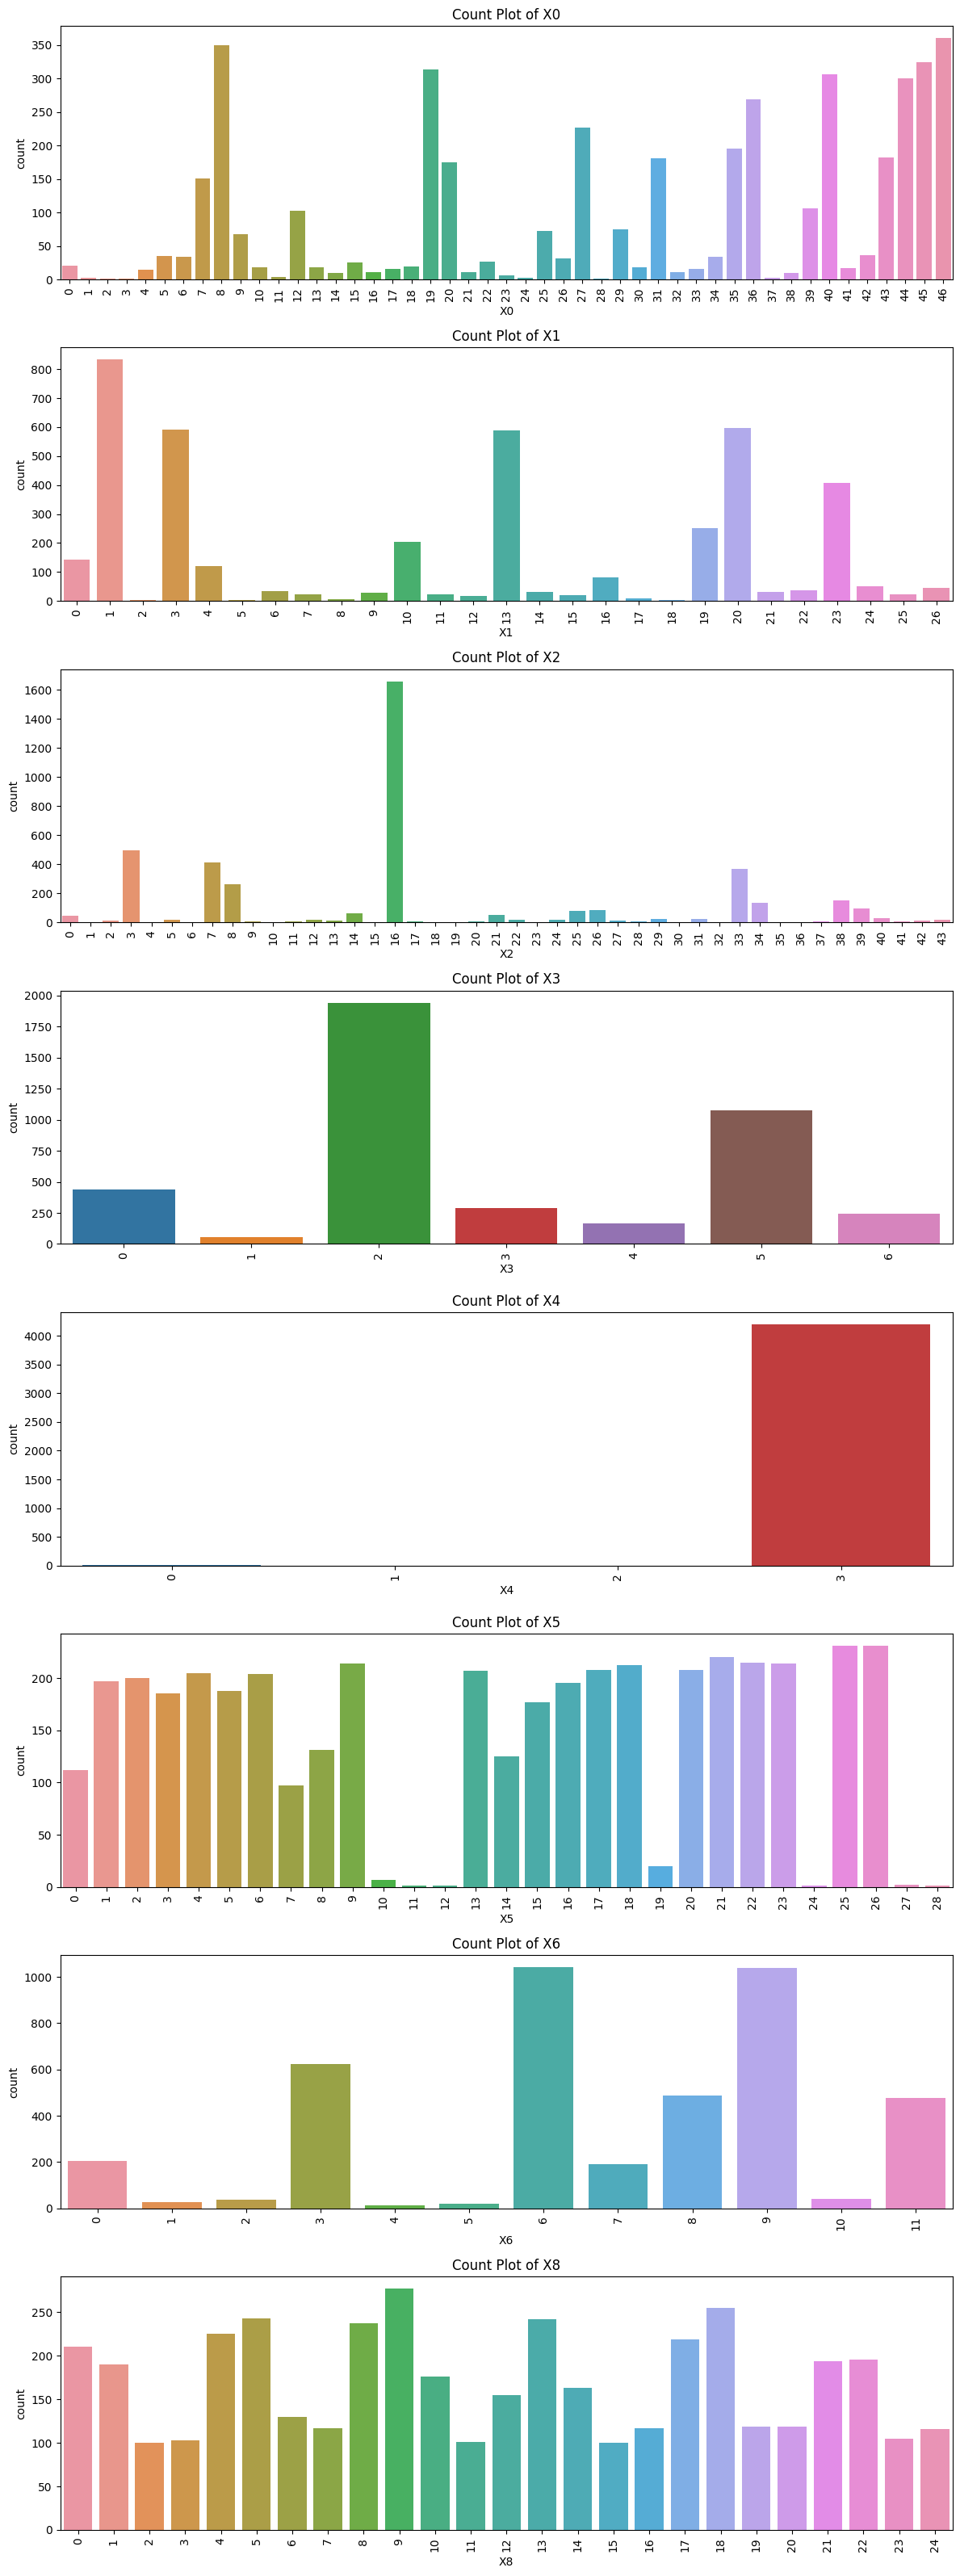

In [49]:
plot_charts_grid_single_feature(df[categorical_features[:8]], my_countplot)

In [50]:
useless_features = ['X4']
df   = df.drop(columns=useless_features)
test = test.drop(columns=useless_features)

In [51]:
categorical_features = [col for col in df.columns if df[col].nunique() < 50]
numerical_features   = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col not in categorical_features]

In [52]:
from sklearn.preprocessing import MinMaxScaler, \
                                  StandardScaler, \
                                  RobustScaler, \
                                  MaxAbsScaler

minmax_scaler   = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler   = RobustScaler()
maxabs_scaler   = MaxAbsScaler()

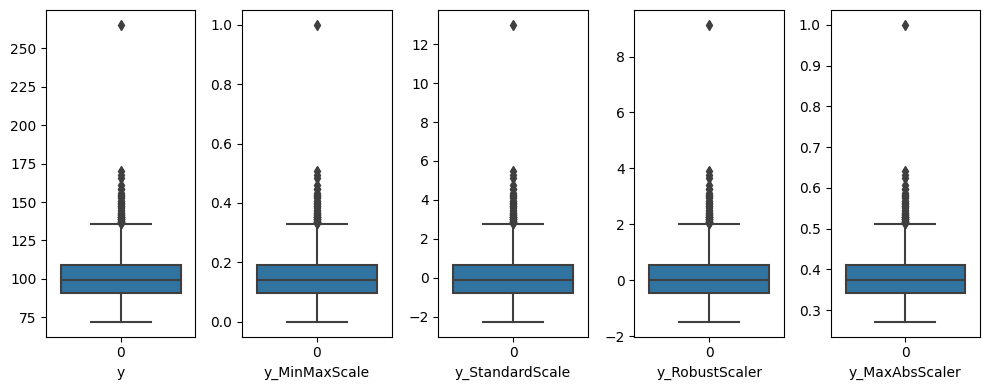

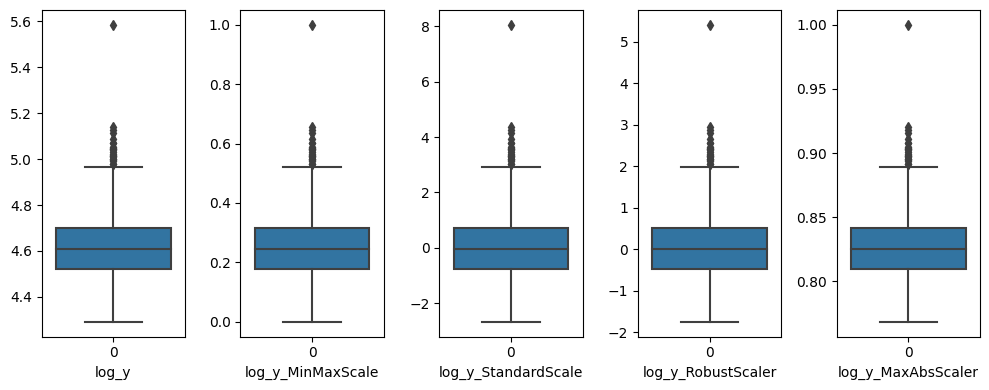

In [53]:
for col in numerical_features:
    temp_df = pd.DataFrame()
    temp_df[col] = df[[col]]
    temp_df[col+'_MinMaxScale']   = minmax_scaler.fit_transform(df[[col]])
    temp_df[col+'_StandardScale'] = standard_scaler.fit_transform(df[[col]])
    temp_df[col+'_RobustScaler']  = robust_scaler.fit_transform(df[[col]])
    temp_df[col+'_MaxAbsScaler']  = maxabs_scaler.fit_transform(df[[col]])
    plot_charts_grid_single_feature(temp_df, my_boxplot, size=(2, 4), n_col=5)

# Outliers Detection

In [54]:
df.head(10)

y  X0  X1  X2  X3  X5  X6  X8  X10  X12  ...  X376  X377  X378  X379  \
0  130.81  32  23  17   0  24   9  14    0    0  ...     0     1     0     0   
1   88.53  32  21  19   4  28  11  14    0    0  ...     0     0     0     0   
2   76.26  20  24  34   2  27   9  23    0    0  ...     0     0     0     0   
3   80.62  20  21  34   5  27  11   4    0    0  ...     0     0     0     0   
4   78.02  20  23  34   5  12   3  13    0    0  ...     0     0     0     0   
5   92.93  40   3  25   2  11   7  18    0    0  ...     0     1     0     0   
6  128.76   9  19  25   5  10   7  18    0    0  ...     0     0     0     0   
7   91.91  36  13  16   5  10   9   0    0    0  ...     0     0     0     0   
8  108.67  43  20  16   4  10   8   7    0    0  ...     0     0     0     0   
9  126.99  31   3  14   2  10   0   4    0    0  ...     0     1     0     0   

   X380  X382  X383  X384  X385     log_y  
0     0     0     0     0     0  4.881361  
1     0     0     0     0     0  4.494574  
2     0     1     0     0     0  4.347176  
3     0     0     0     0     0  4.402074  
4     0     0     0     0     0  4.369701  
5     0     0     0     0     0  4.542550  
6     0     0     0     0     0  4.865687  
7     0     0     0     0     0  4.531631  
8     0     0     0     0     0  4.697476  
9     0     0     0     0     0  4.851952  

[10 rows x 360 columns]

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 360 entries, y to log_y
dtypes: float64(2), int64(358)
memory usage: 11.6 MB


In [56]:
def plot_column_with_outlier_effect(df, plot_func, outliers_indices, outliers_method, x_col, y_col):
    fig, ax = plt.subplots(1, 2, figsize=(12*2, 4))
    ax[0].set_title('Original Data')
    ax[1].set_title(f'Data without Outliers of {y_col} using {outliers_method.__name__}')
    plot_func(x=x_col, y=y_col, ax=ax[0], data=df)
    plot_func(x=x_col, y=y_col, ax=ax[1], data=df.drop(outliers_indices))
    plt.tight_layout()
    plt.show()

In [57]:
def outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df.index[(df[col] < lower_bound) | (df[col] > upper_bound)]

In [58]:
from scipy import stats

def outliers_zscore(df, col):
    return df.index[stats.zscore(df[col]).abs() > 3]

In [59]:
def detect_outliers(df, target_col, outliers_method, plot_func):
    outliers_indices = [item for item in outliers_method(df, target_col)]
    print(f'length of {target_col} outliers_indices: {len(outliers_indices)}')
    for curr_col in df.columns:
        if curr_col == target_col:
            continue
        plot_column_with_outlier_effect(df, plot_func, outliers_indices, outliers_method, x_col=curr_col, y_col=target_col)

length of y outliers_indices: 50


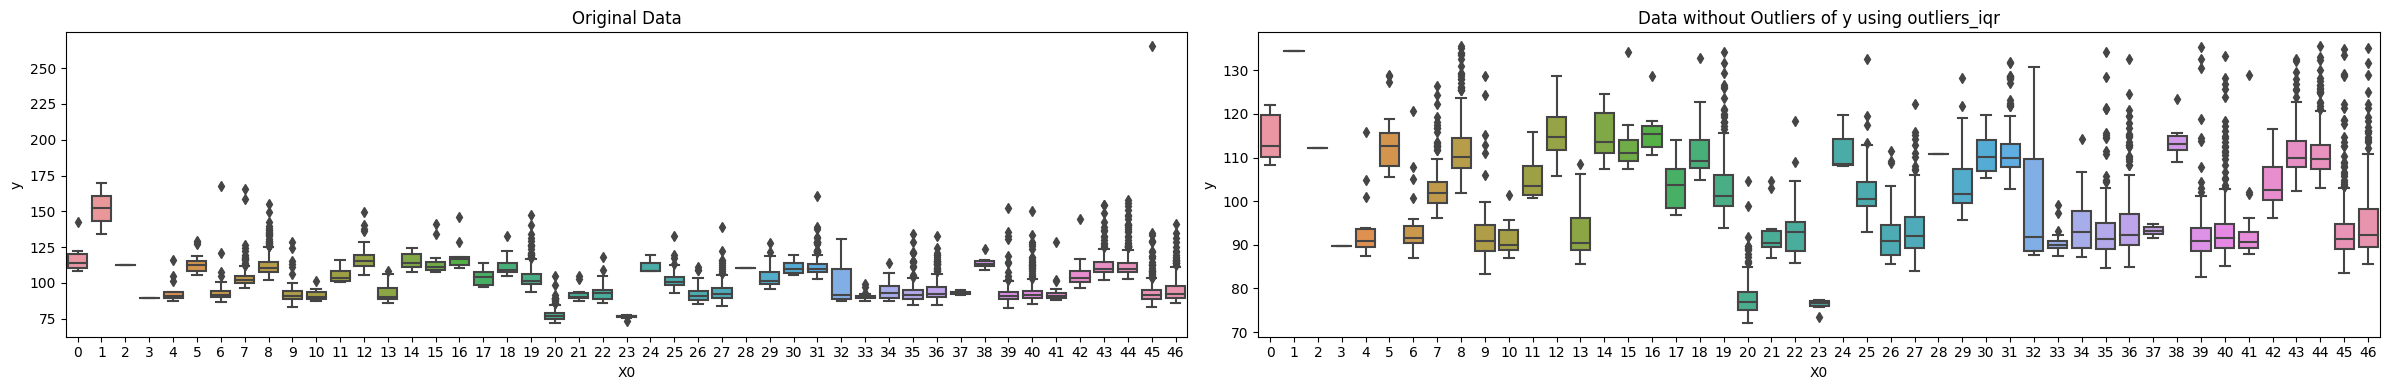

length of y outliers_indices: 40


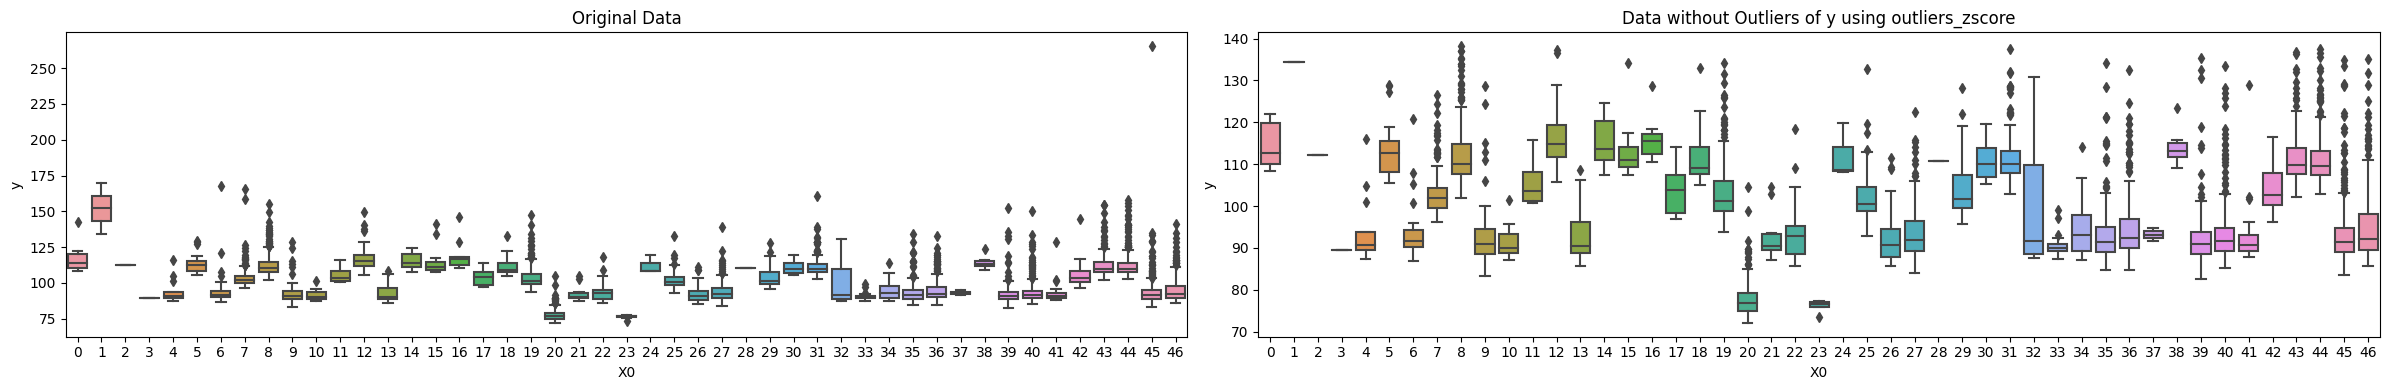

length of y outliers_indices: 50


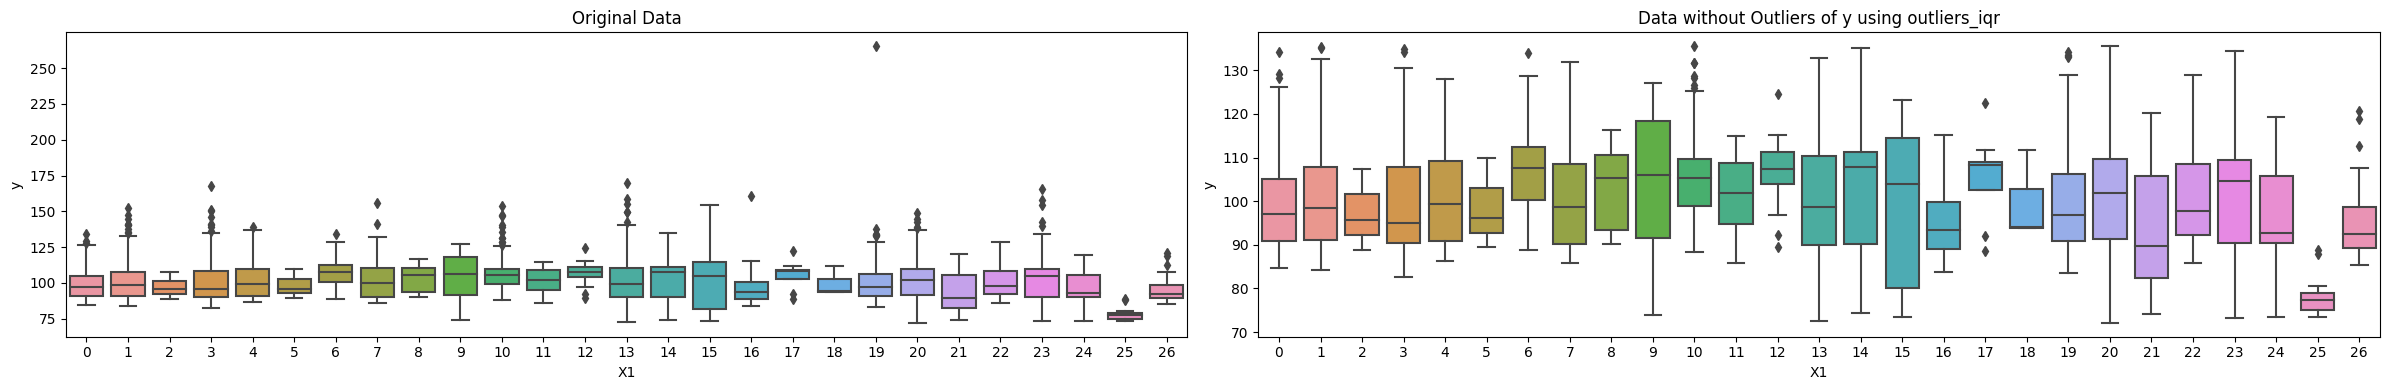

length of y outliers_indices: 40


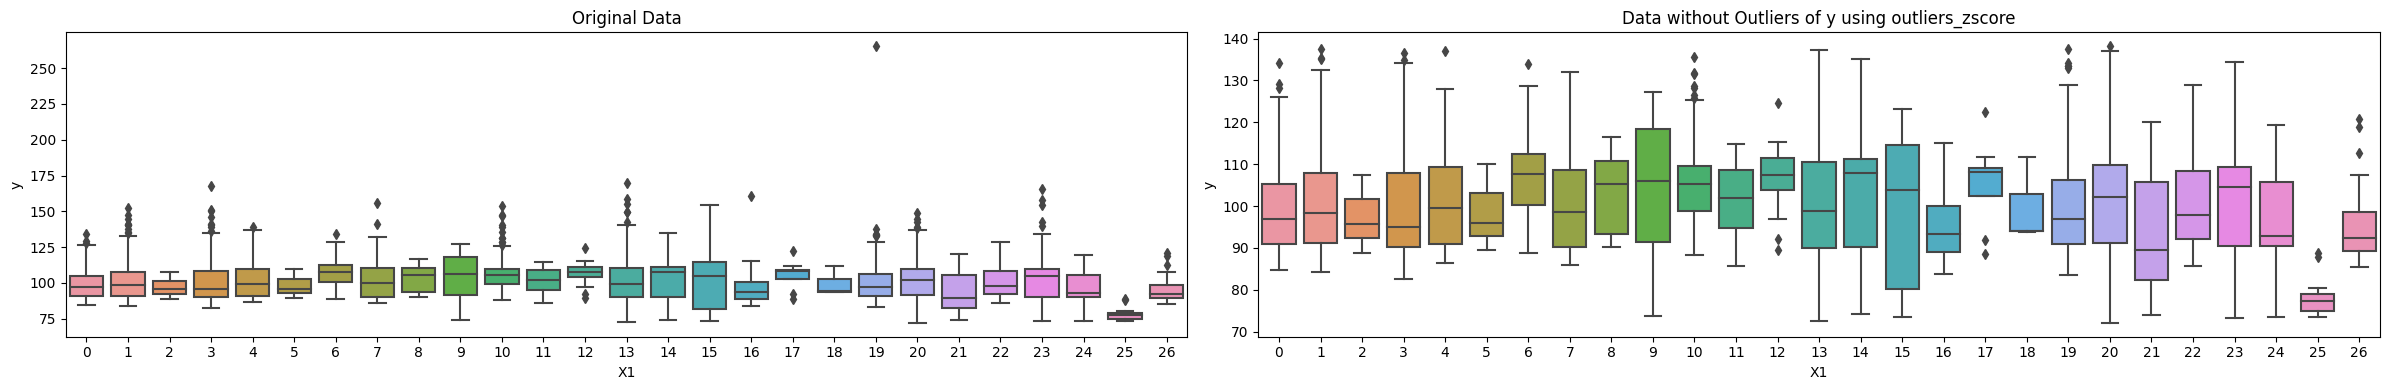

length of y outliers_indices: 50


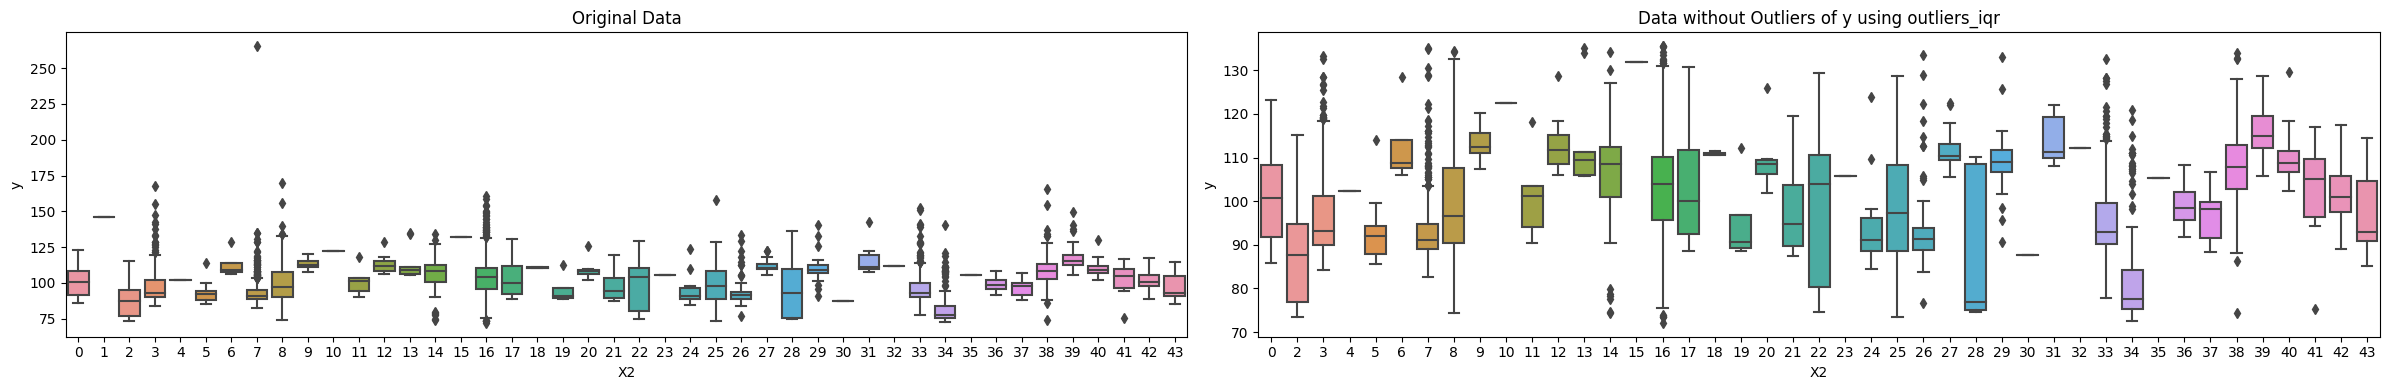

length of y outliers_indices: 40


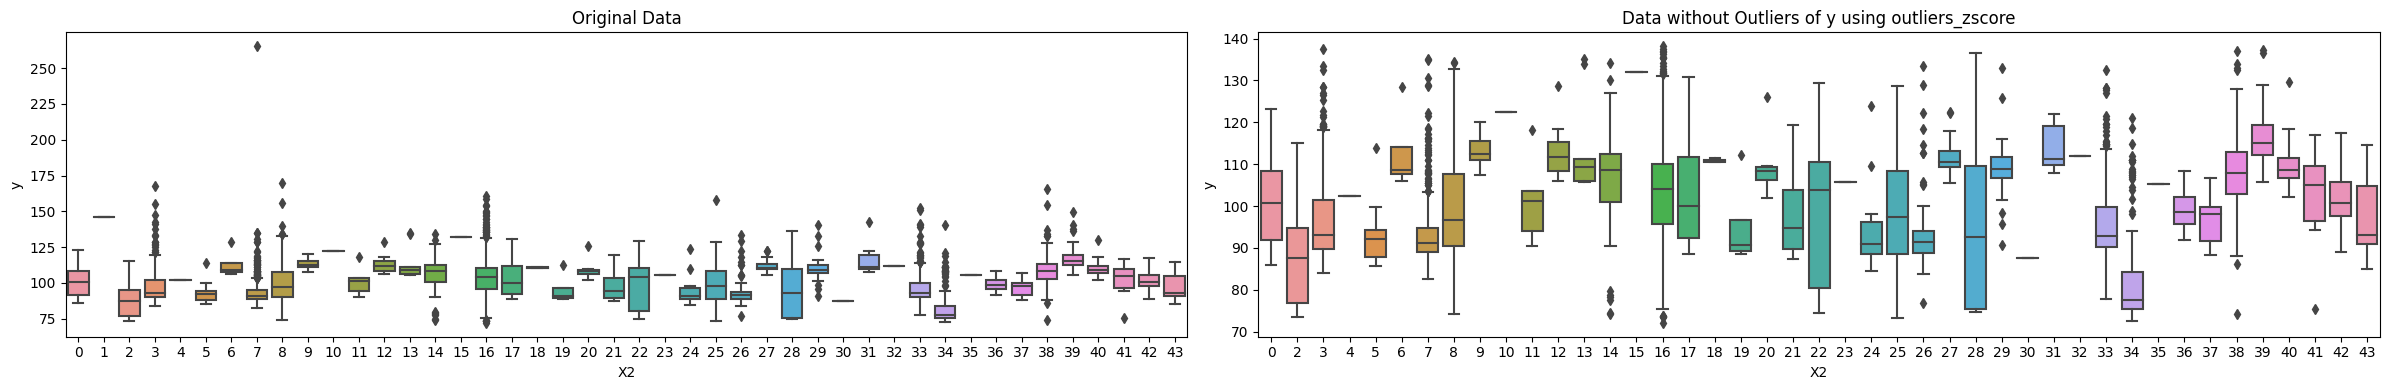

length of y outliers_indices: 50


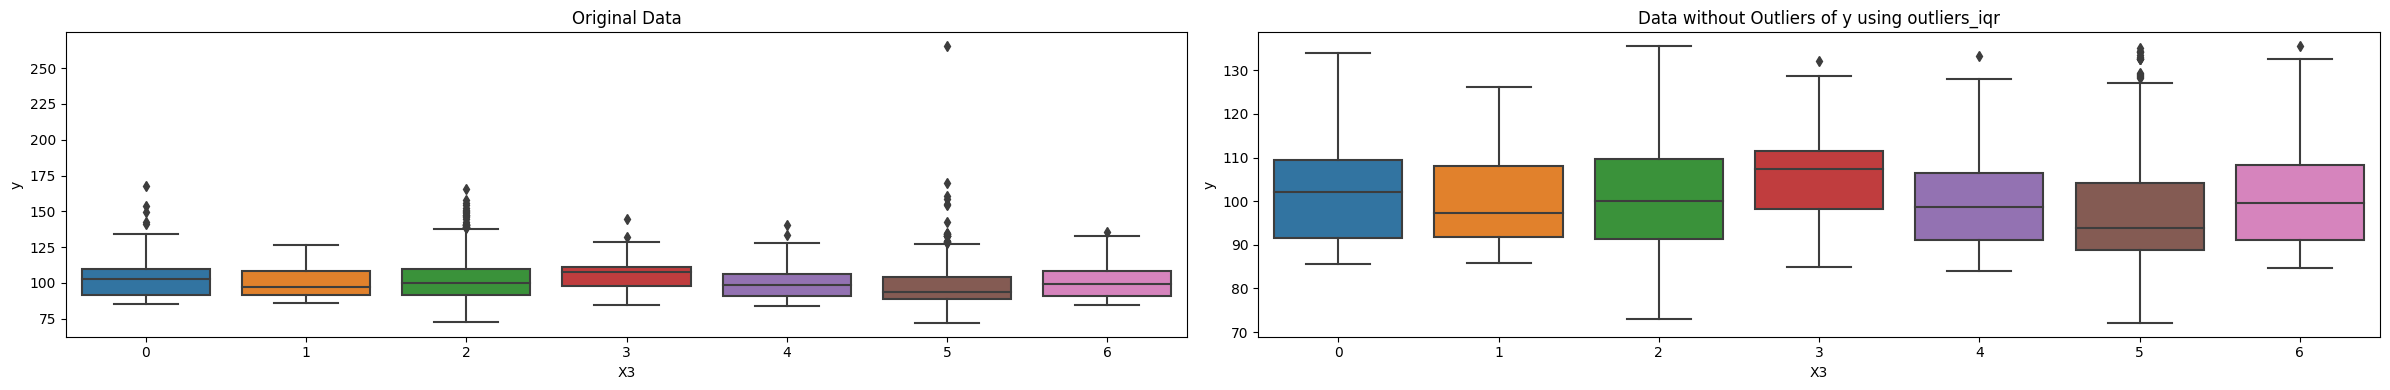

length of y outliers_indices: 40


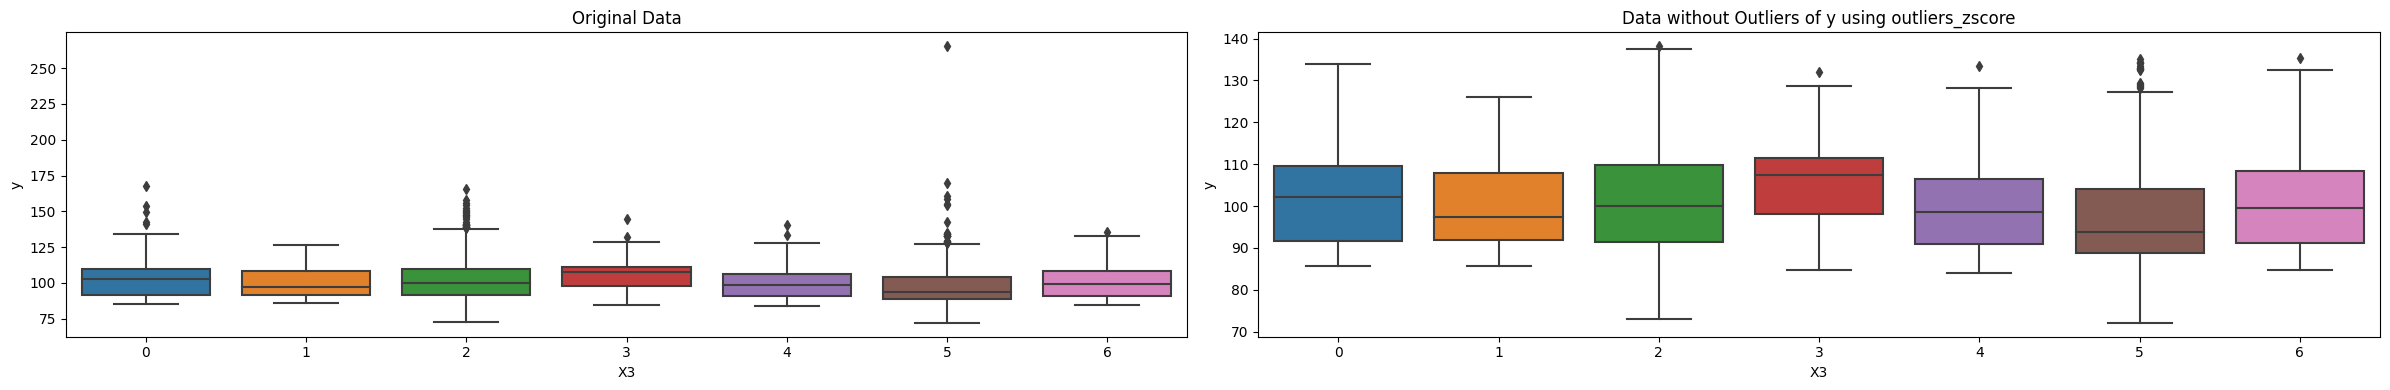

length of y outliers_indices: 50


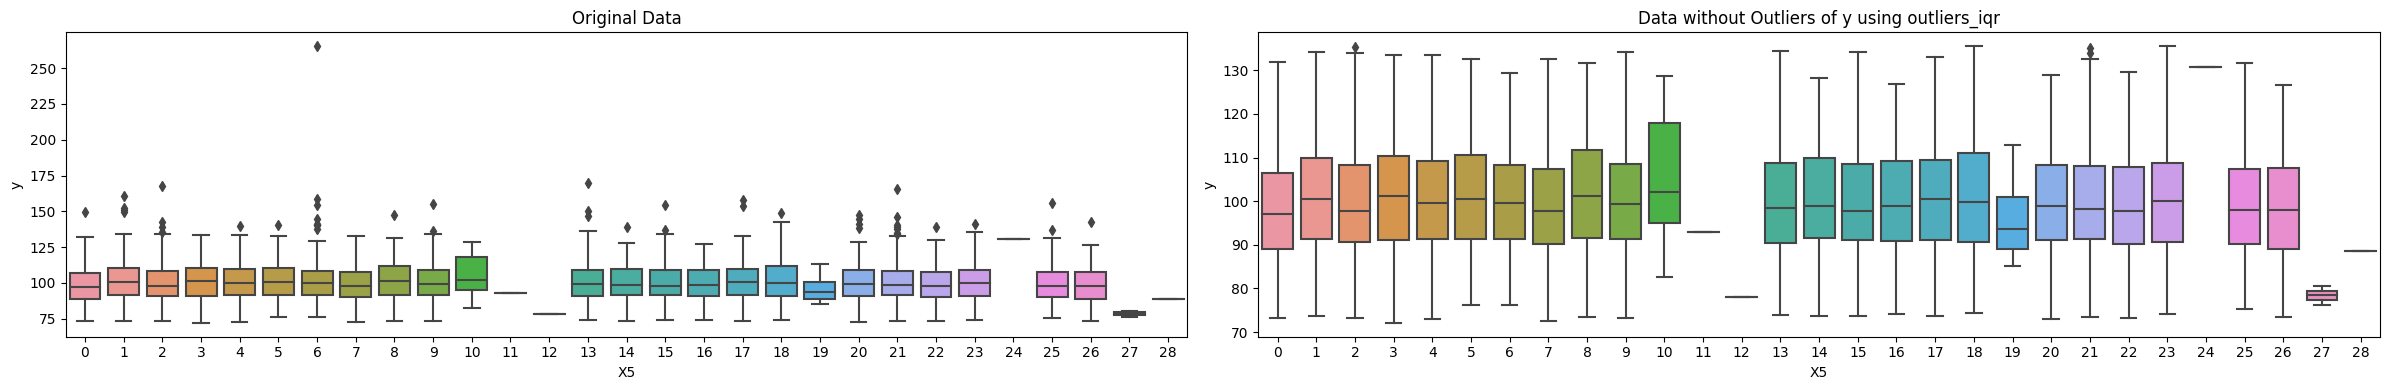

length of y outliers_indices: 40


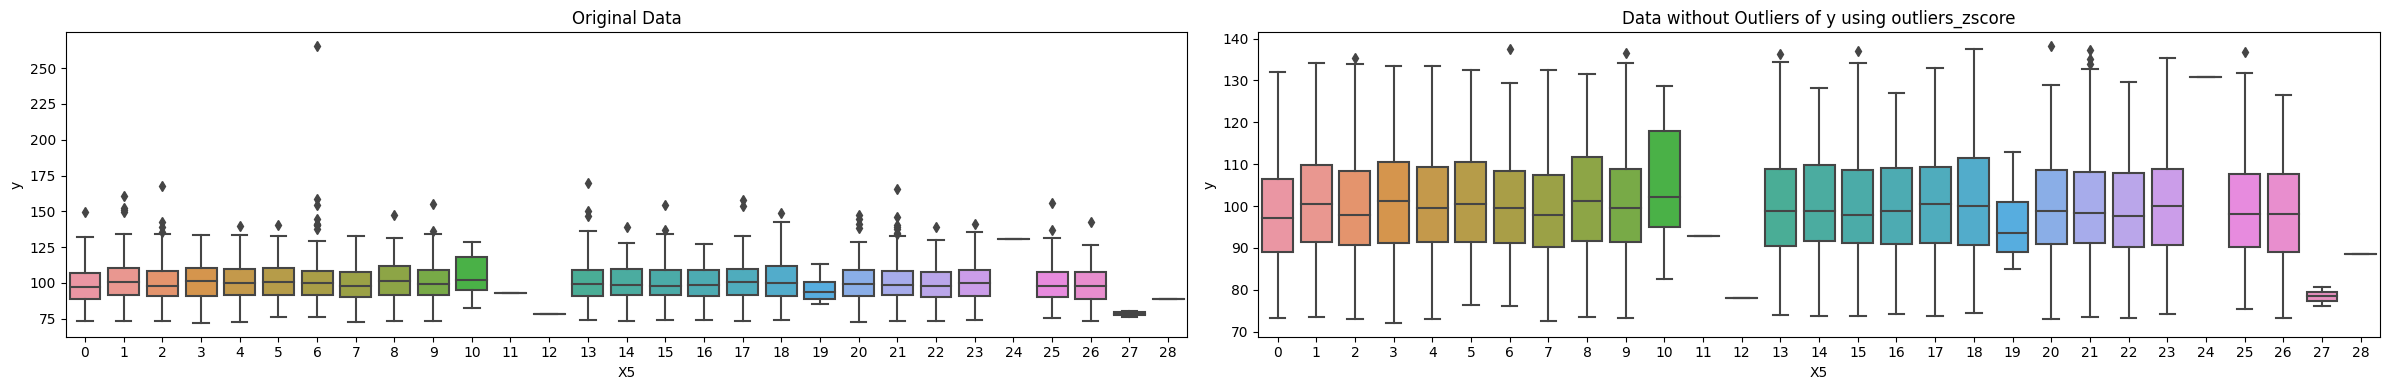

length of y outliers_indices: 50


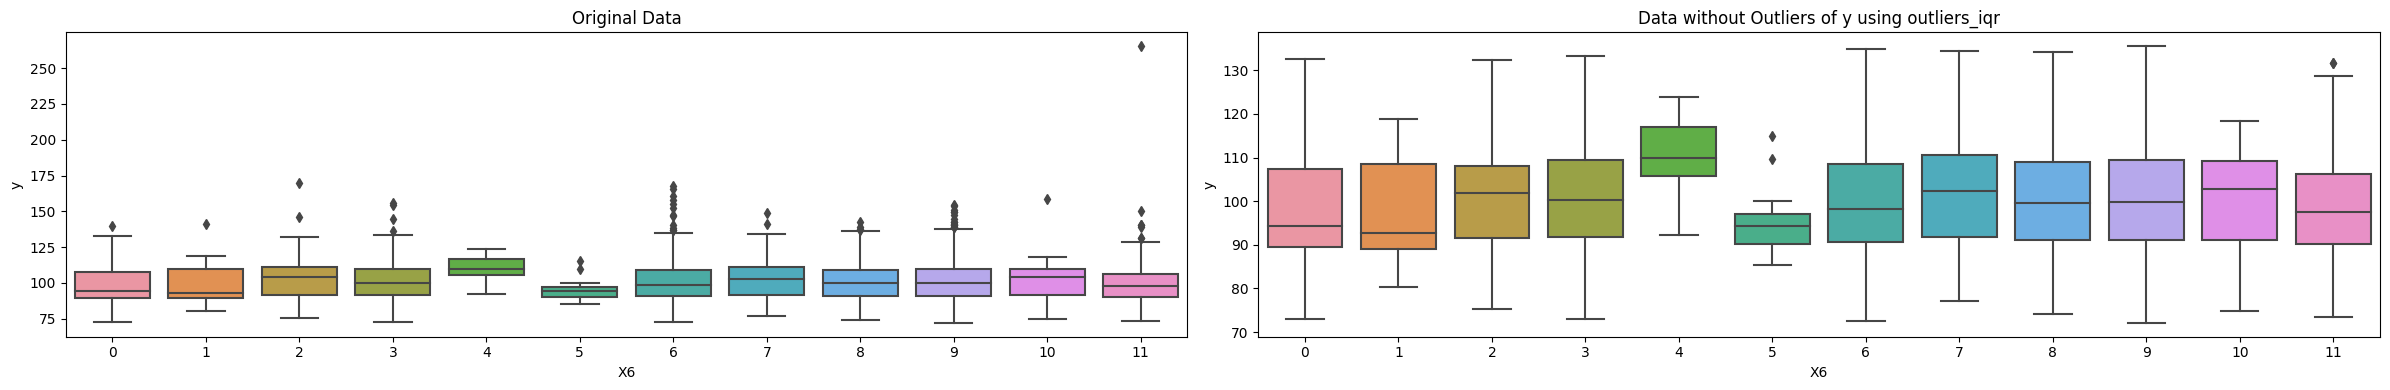

length of y outliers_indices: 40


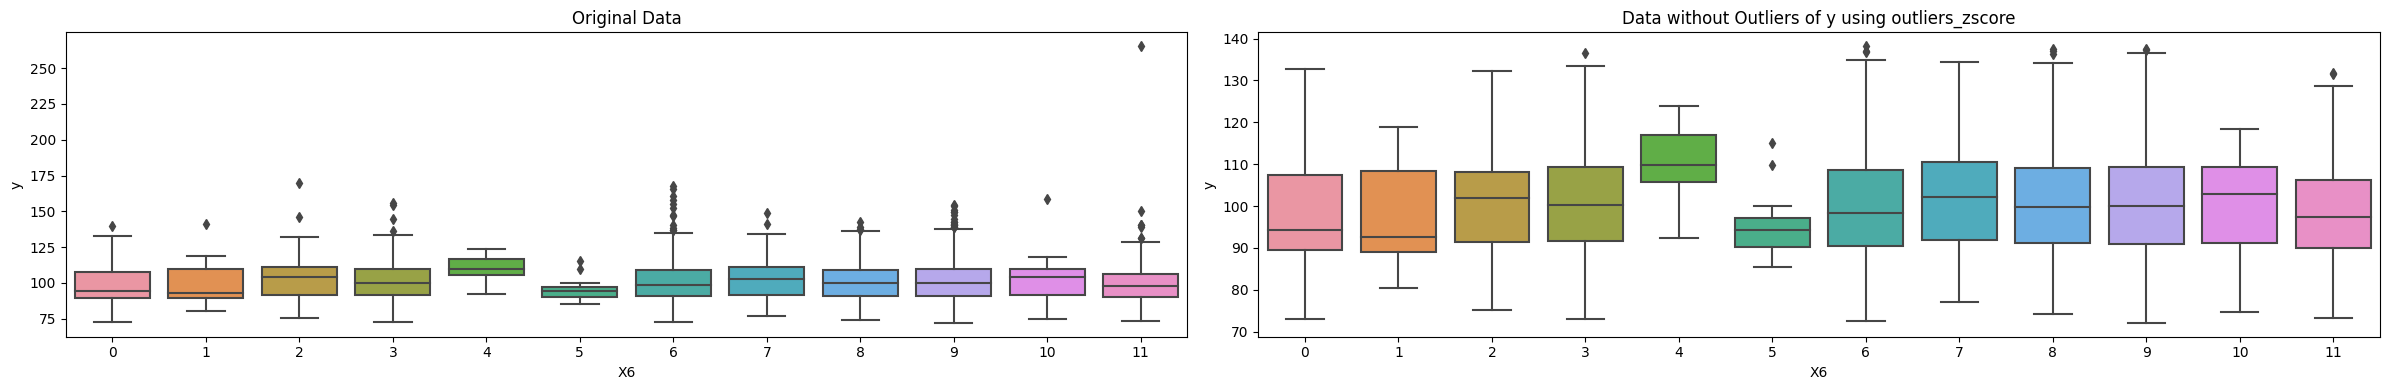

length of y outliers_indices: 50


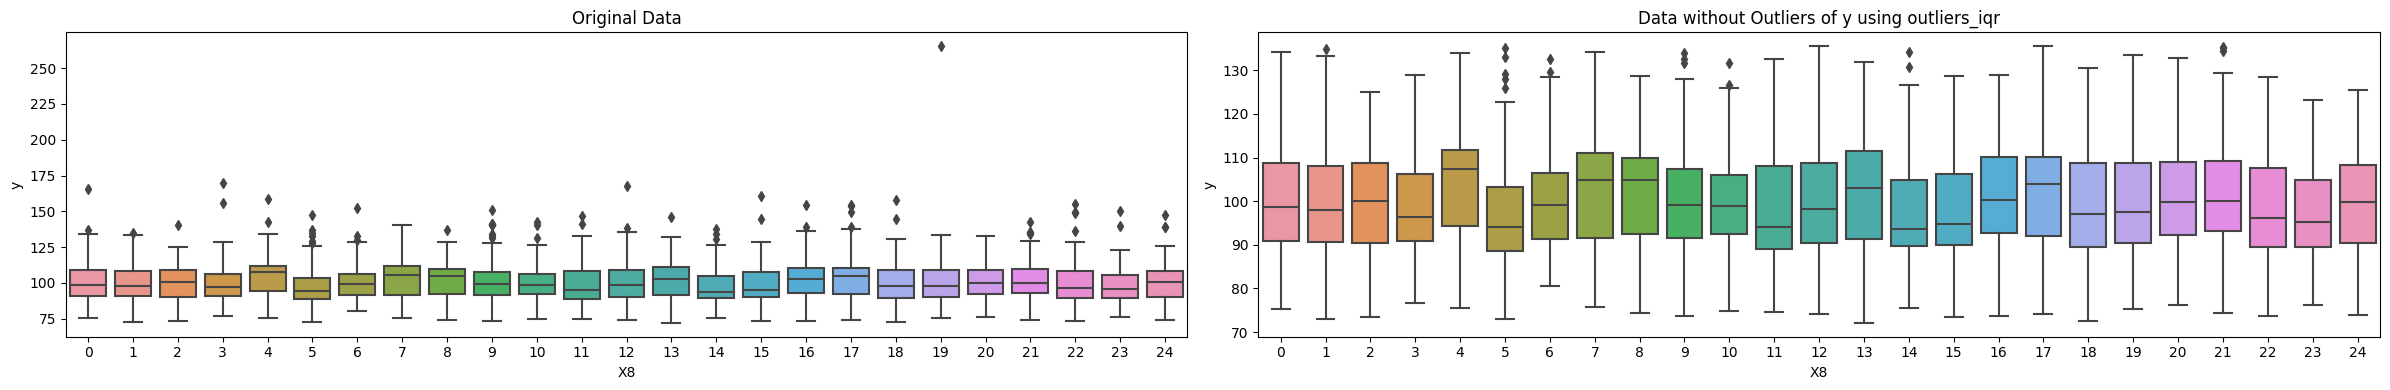

length of y outliers_indices: 40


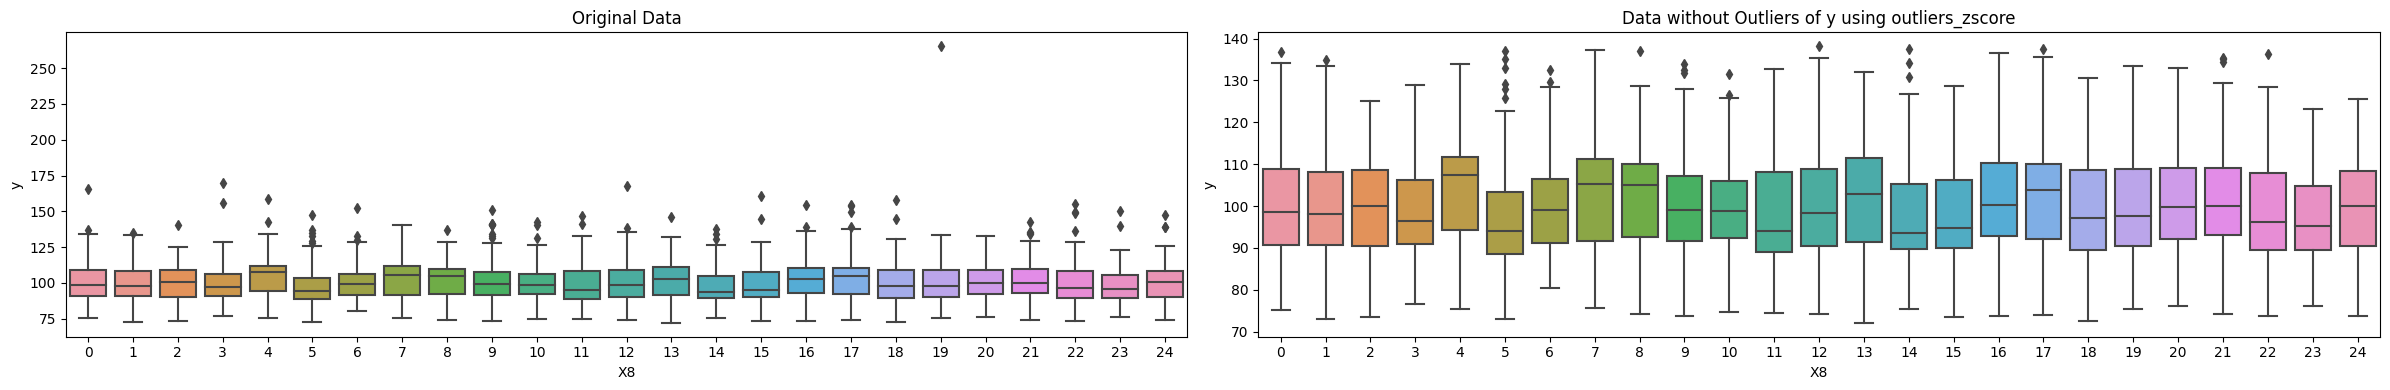

length of y outliers_indices: 50


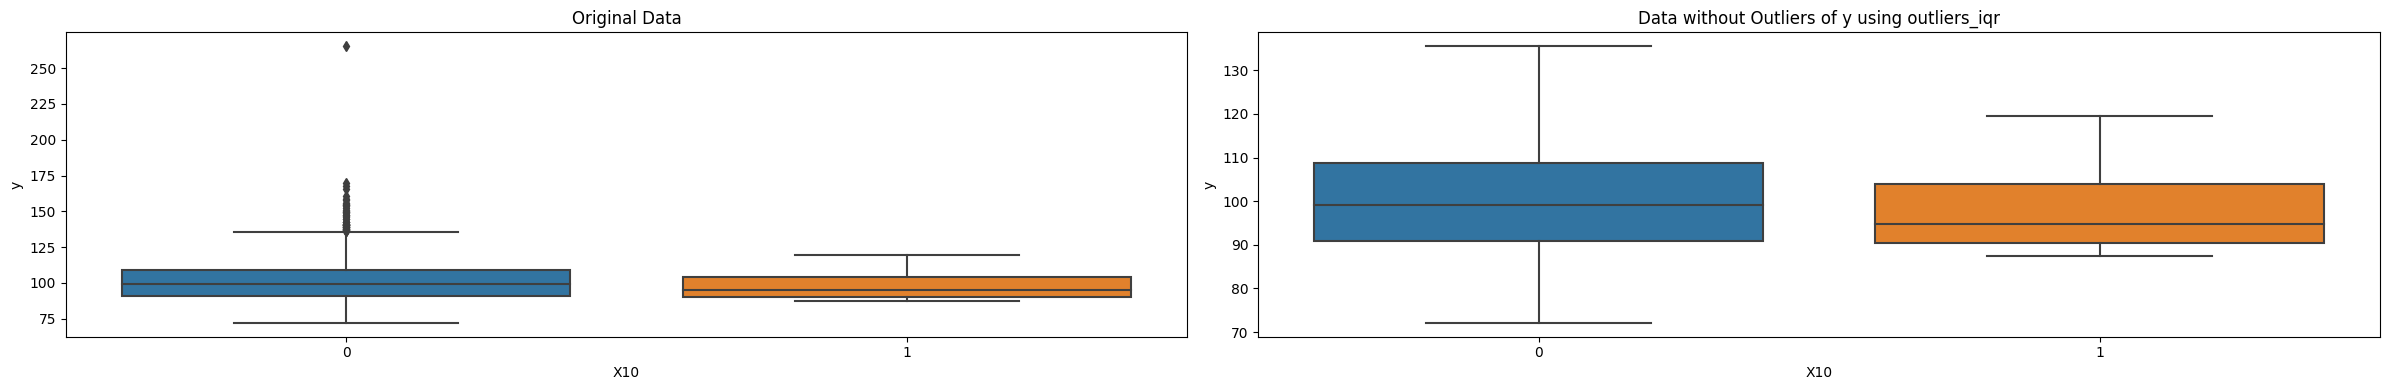

length of y outliers_indices: 40


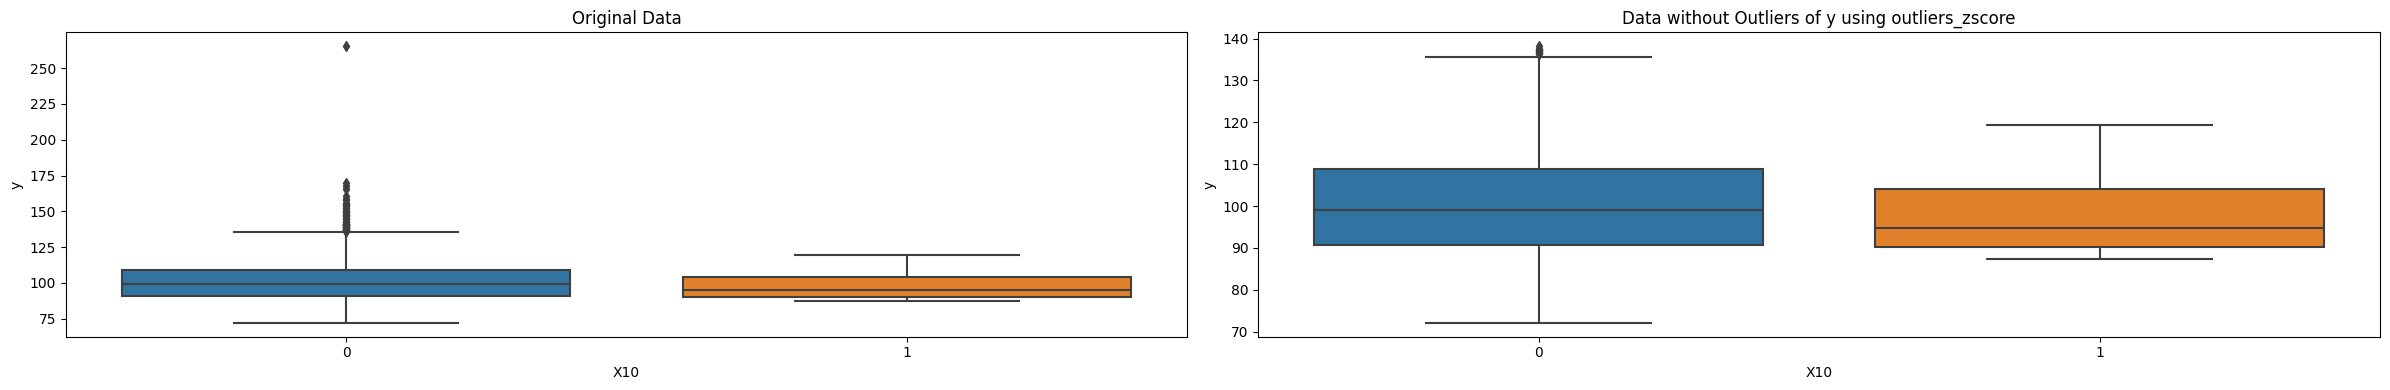

In [60]:
for col in categorical_features[:8]:
    detect_outliers(df[[col]+['y']], 'y', outliers_iqr,    sns.boxplot)
    detect_outliers(df[[col]+['y']], 'y', outliers_zscore, sns.boxplot)

length of y outliers_indices: 50


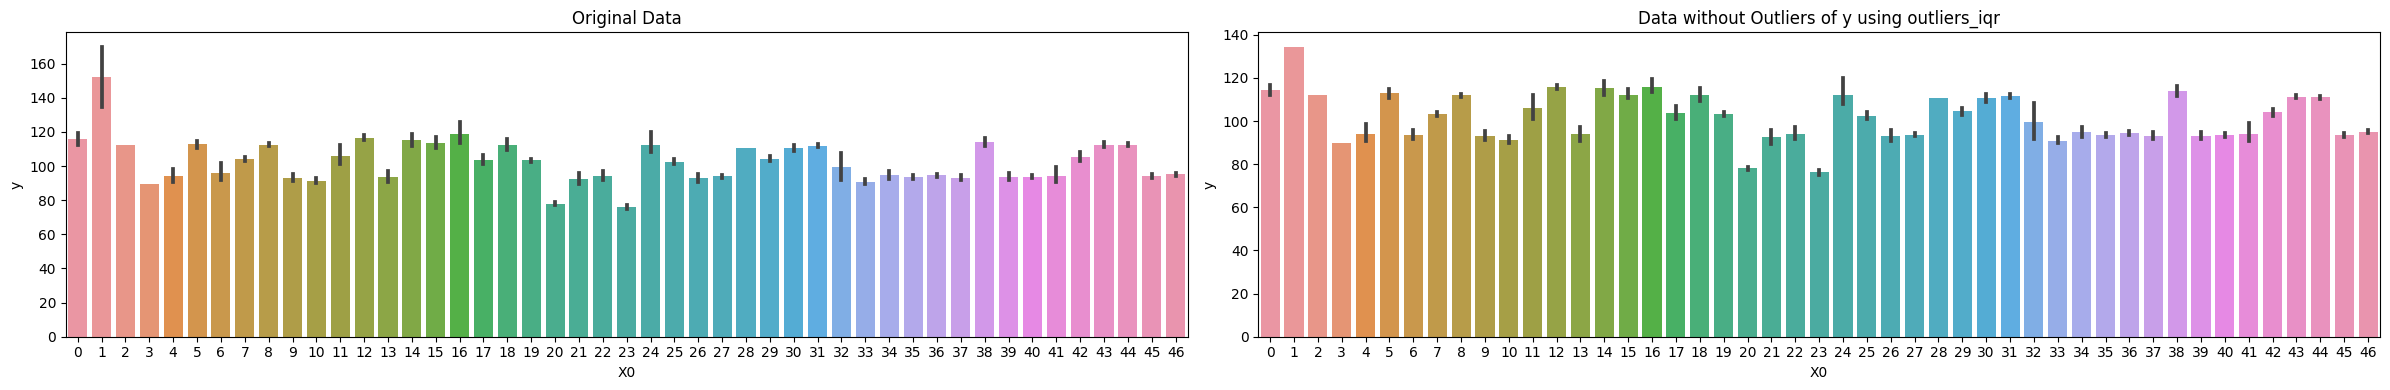

length of y outliers_indices: 40


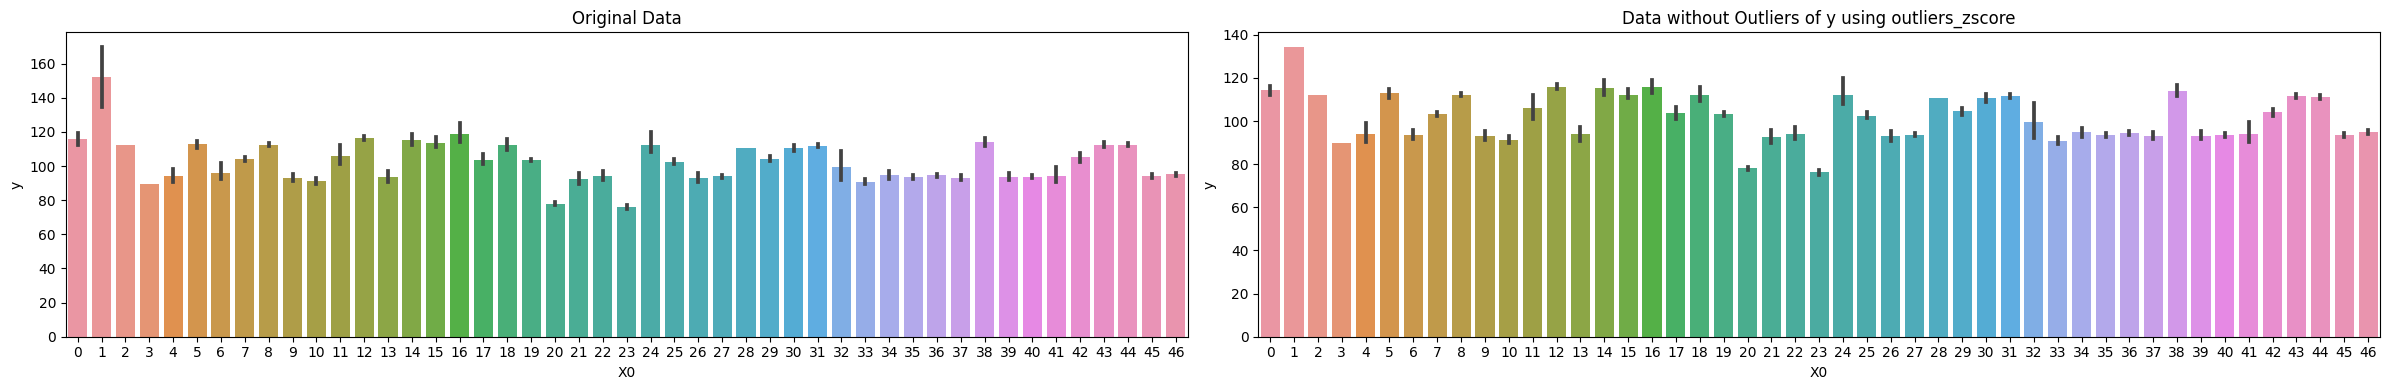

length of y outliers_indices: 50


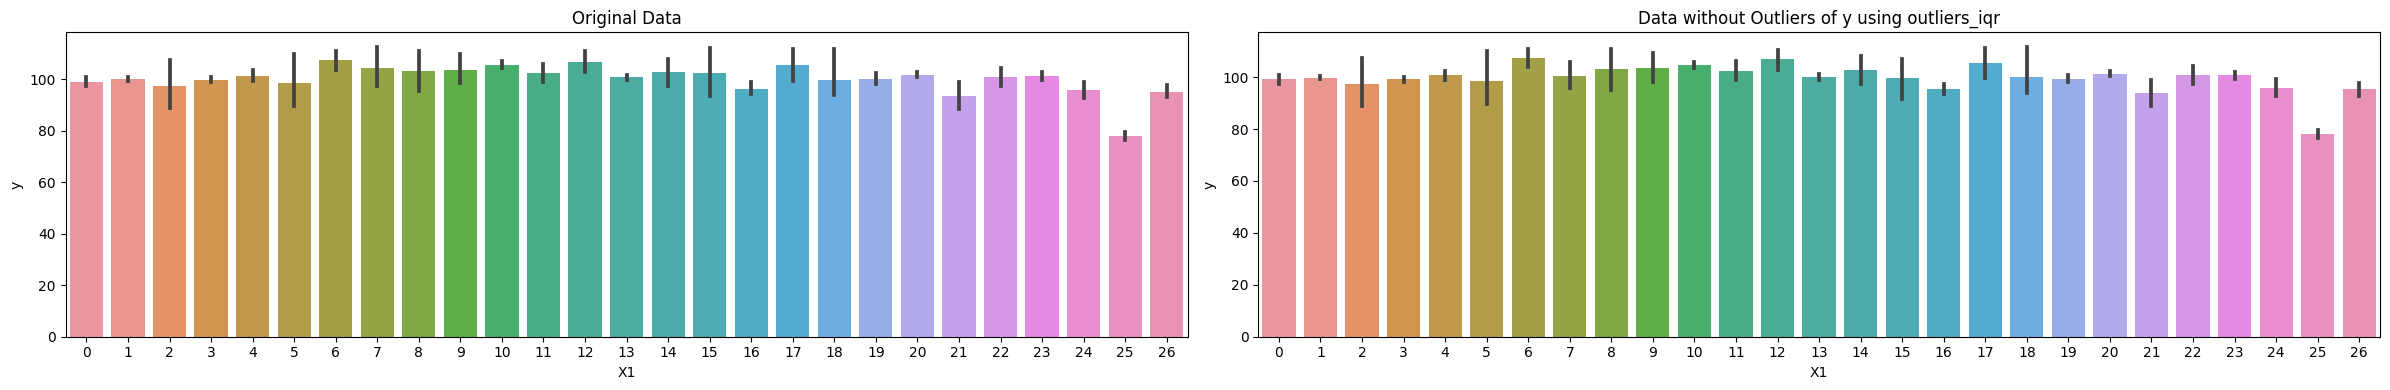

length of y outliers_indices: 40


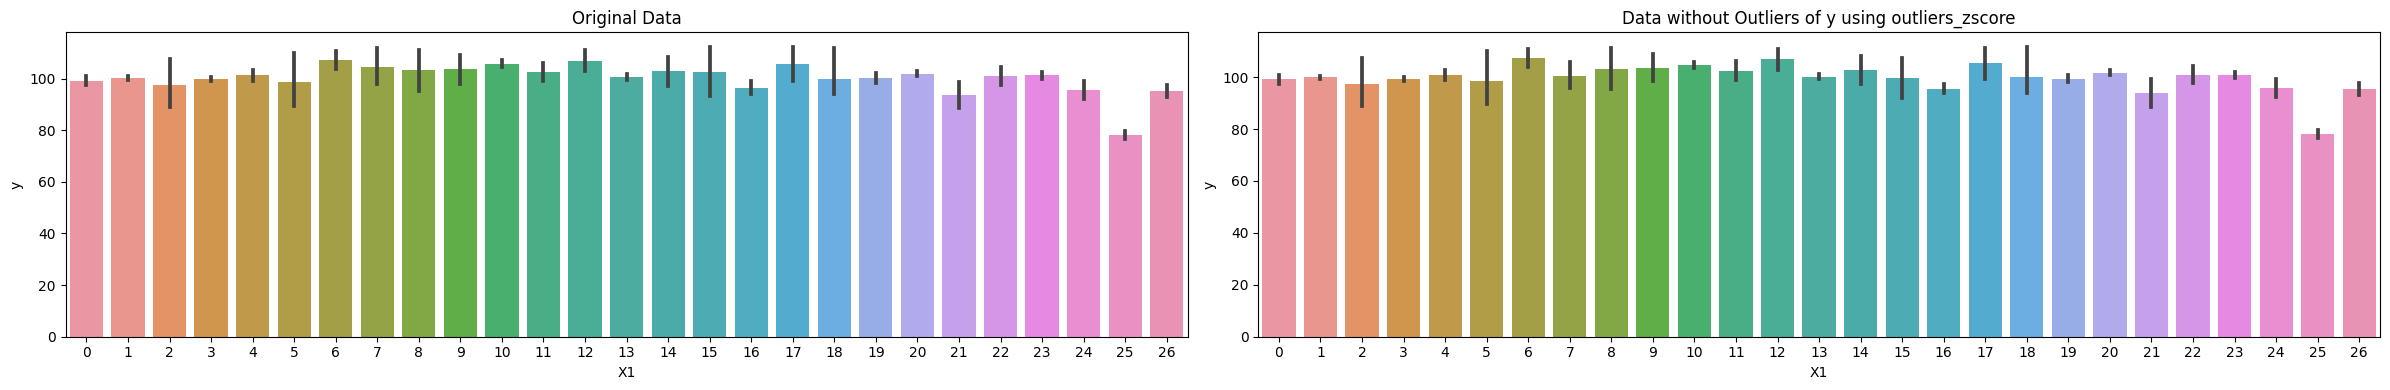

length of y outliers_indices: 50


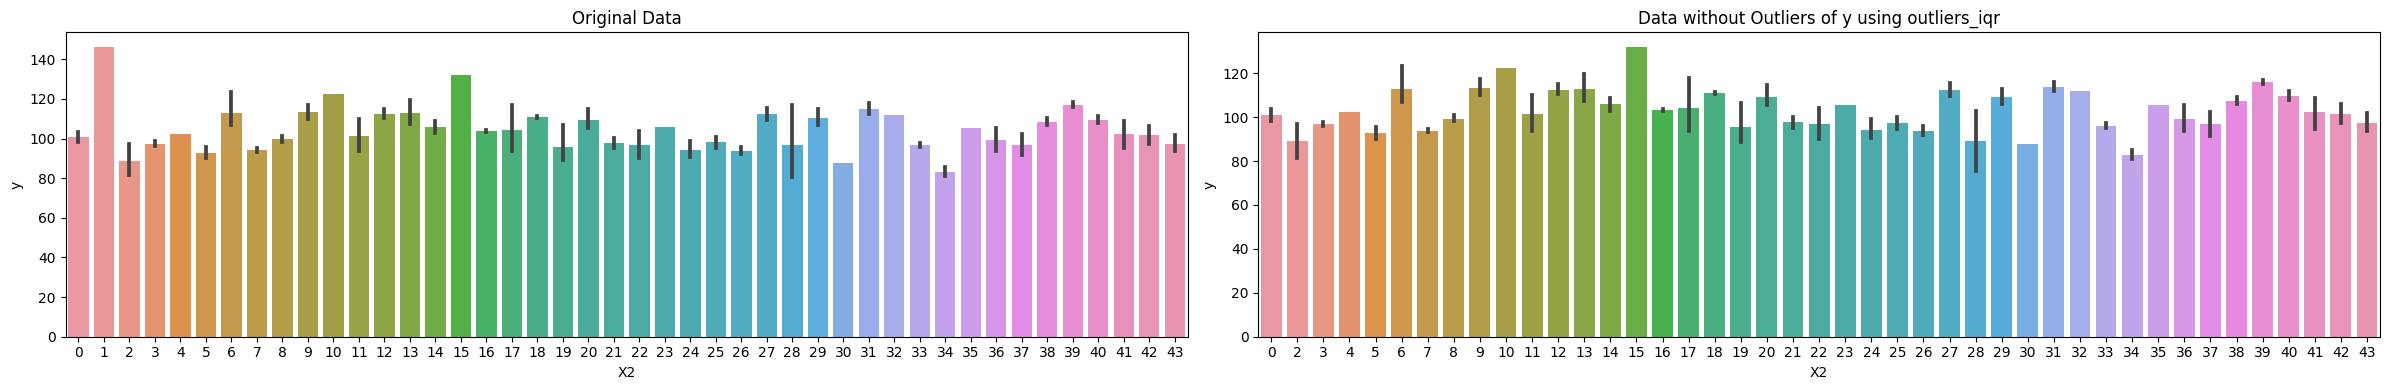

length of y outliers_indices: 40


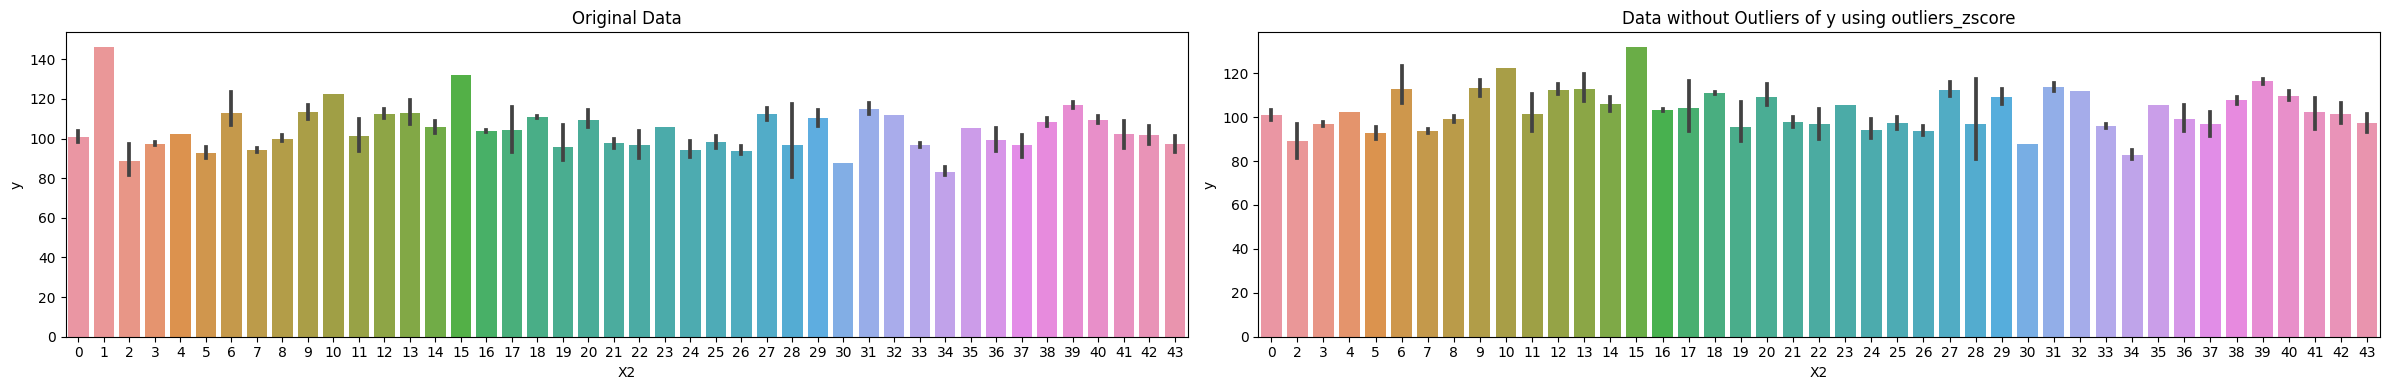

length of y outliers_indices: 50


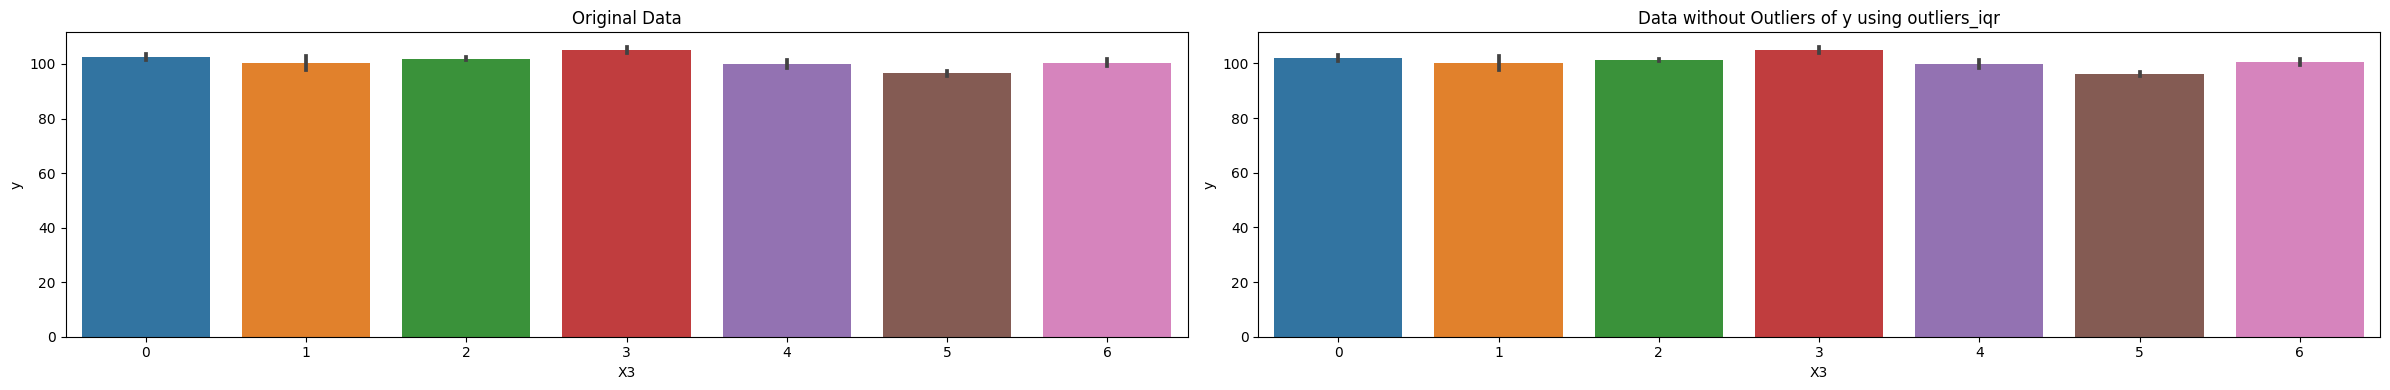

length of y outliers_indices: 40


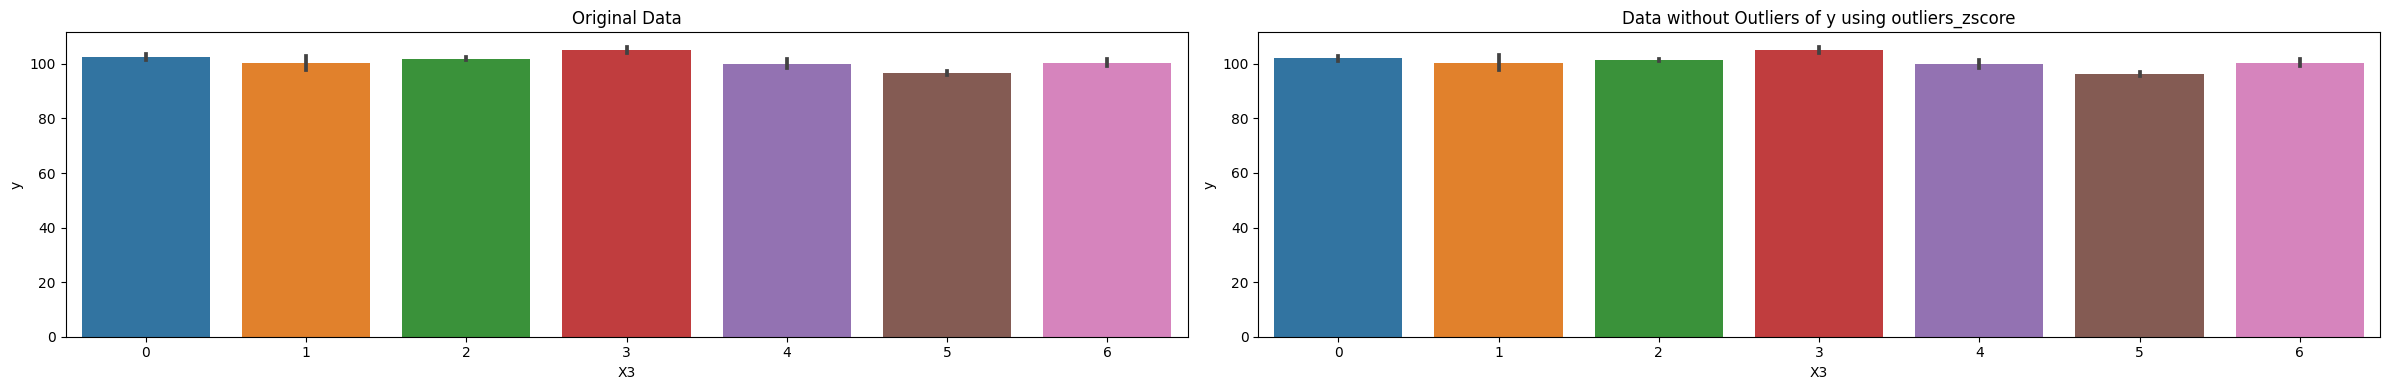

length of y outliers_indices: 50


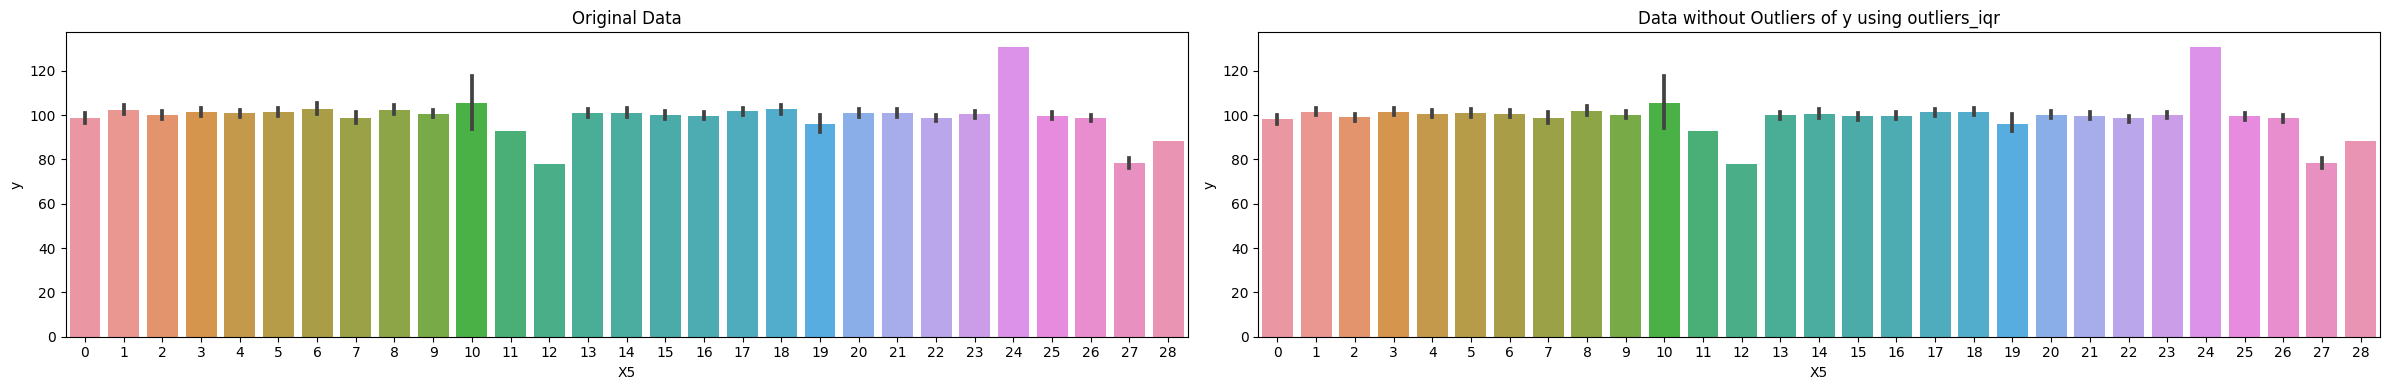

length of y outliers_indices: 40


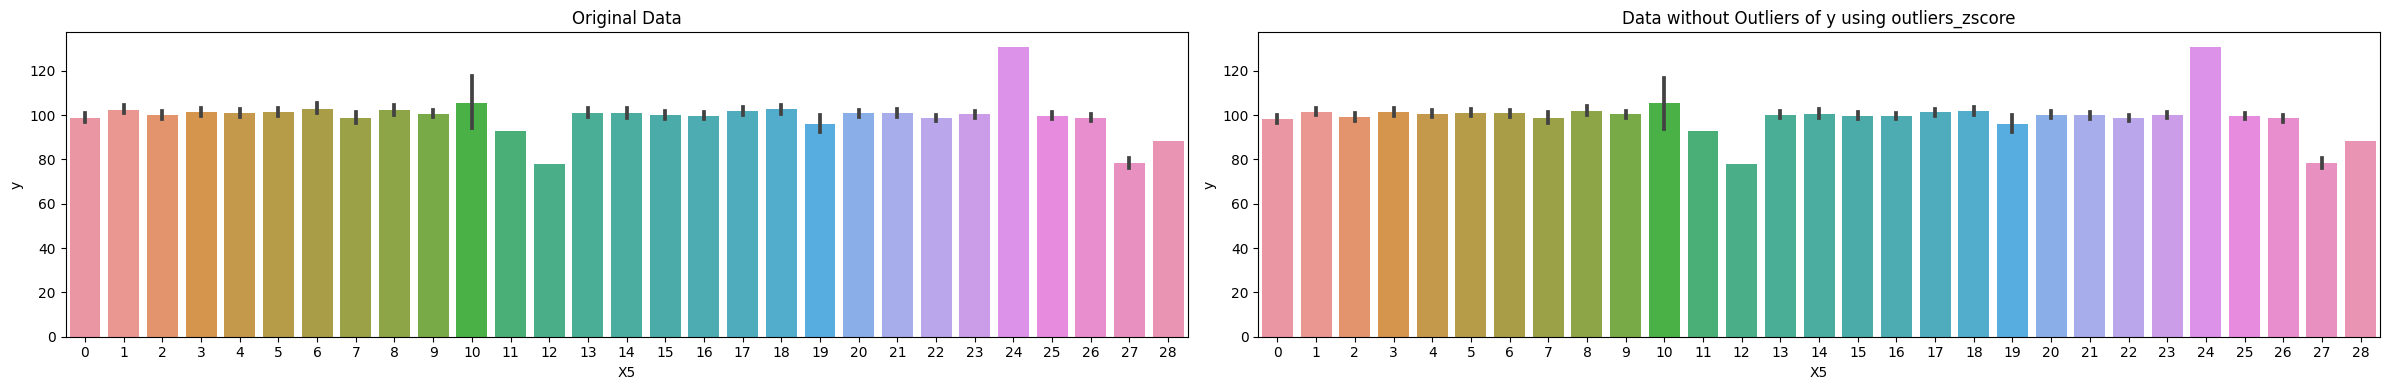

length of y outliers_indices: 50


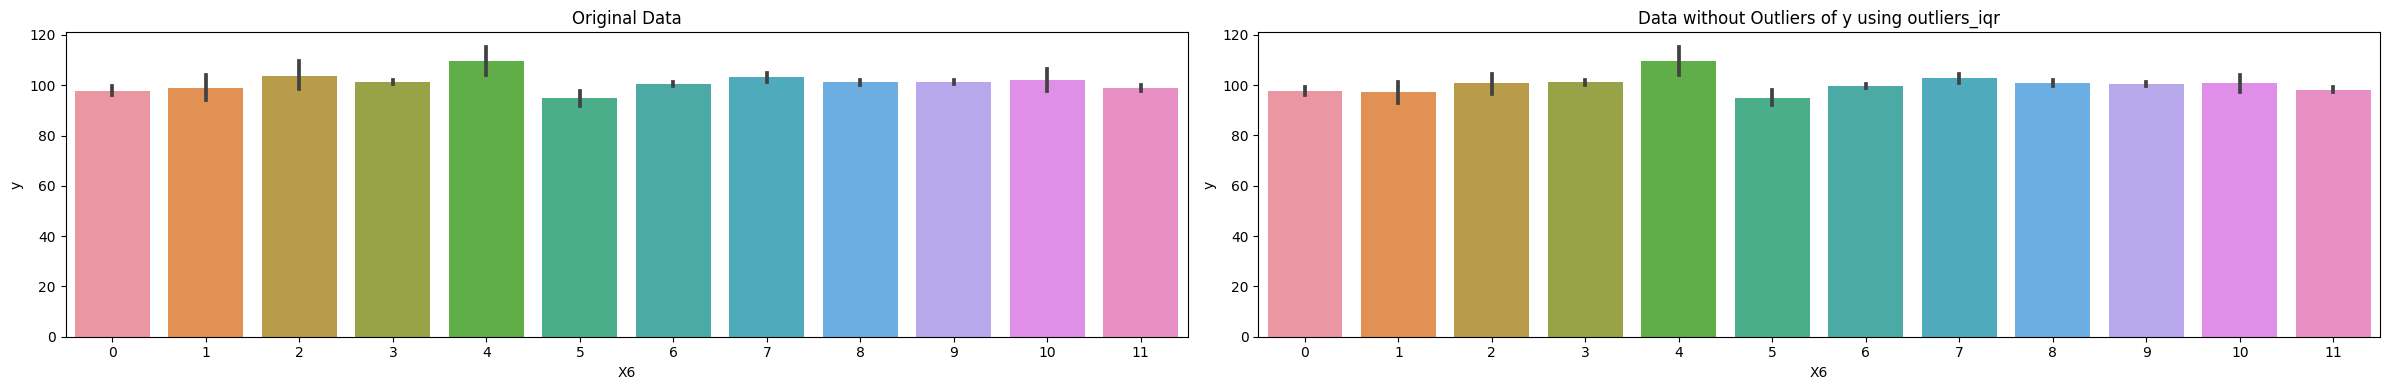

length of y outliers_indices: 40


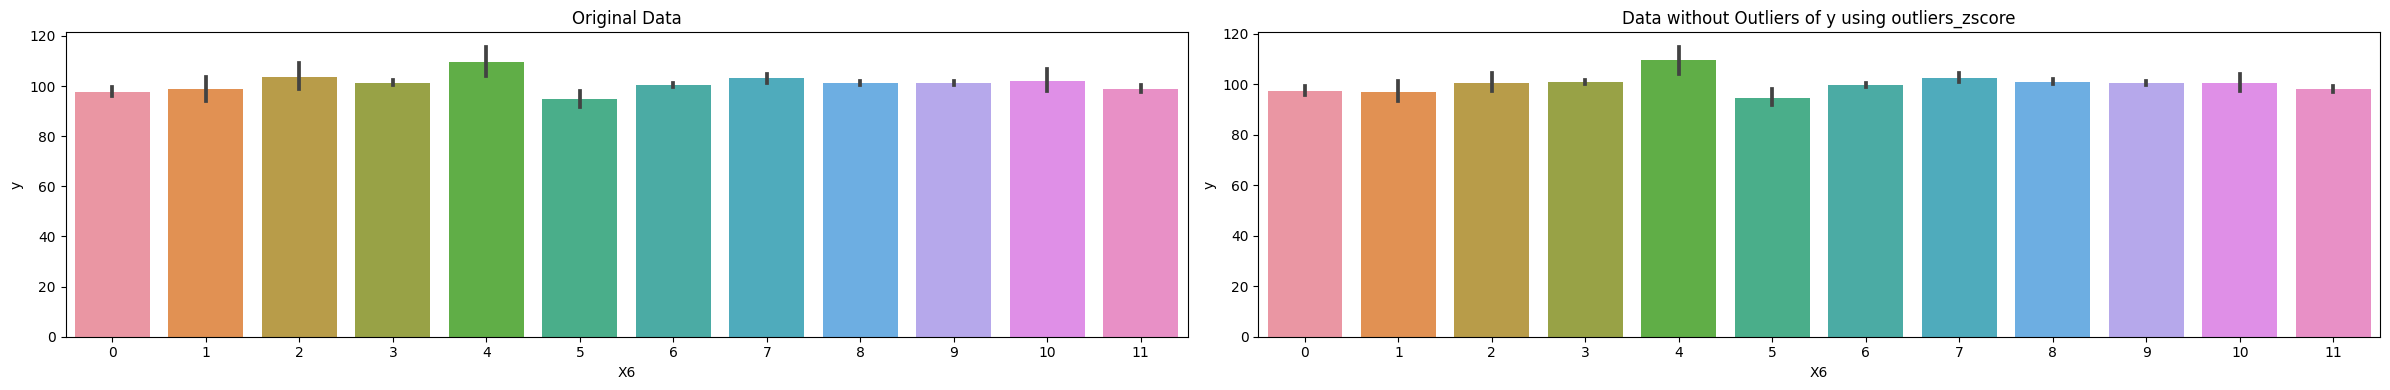

length of y outliers_indices: 50


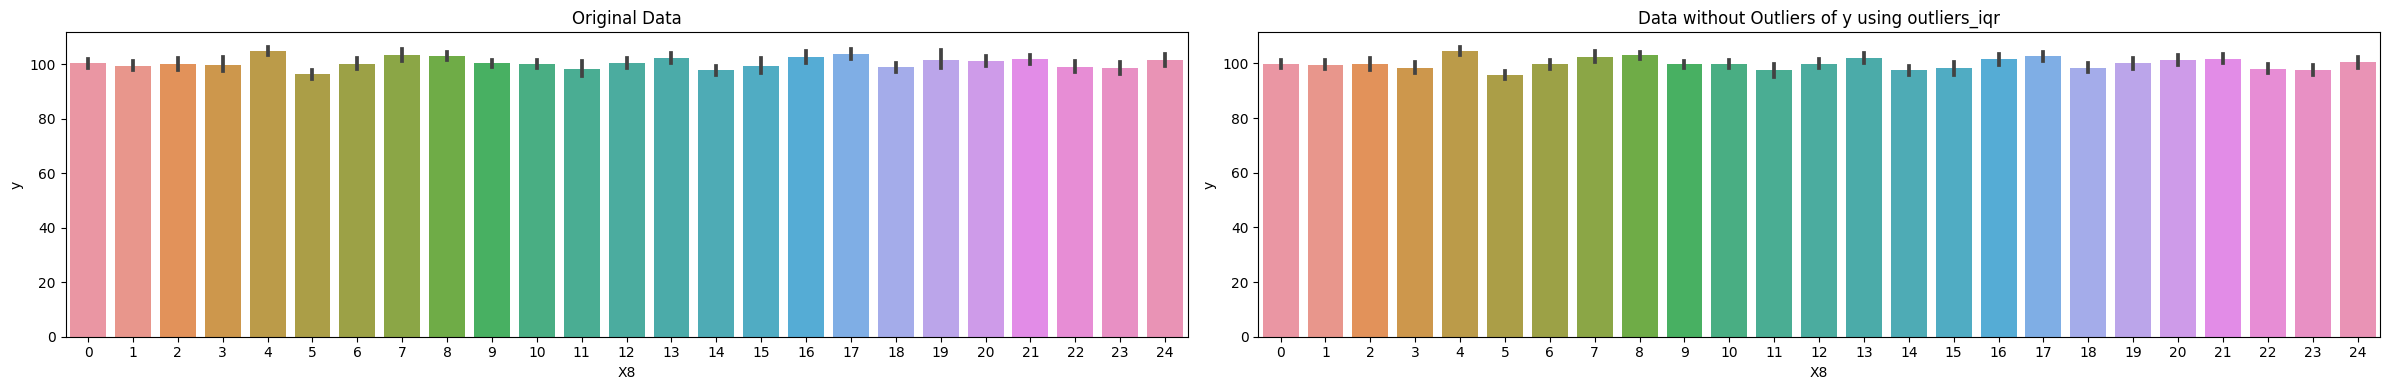

length of y outliers_indices: 40


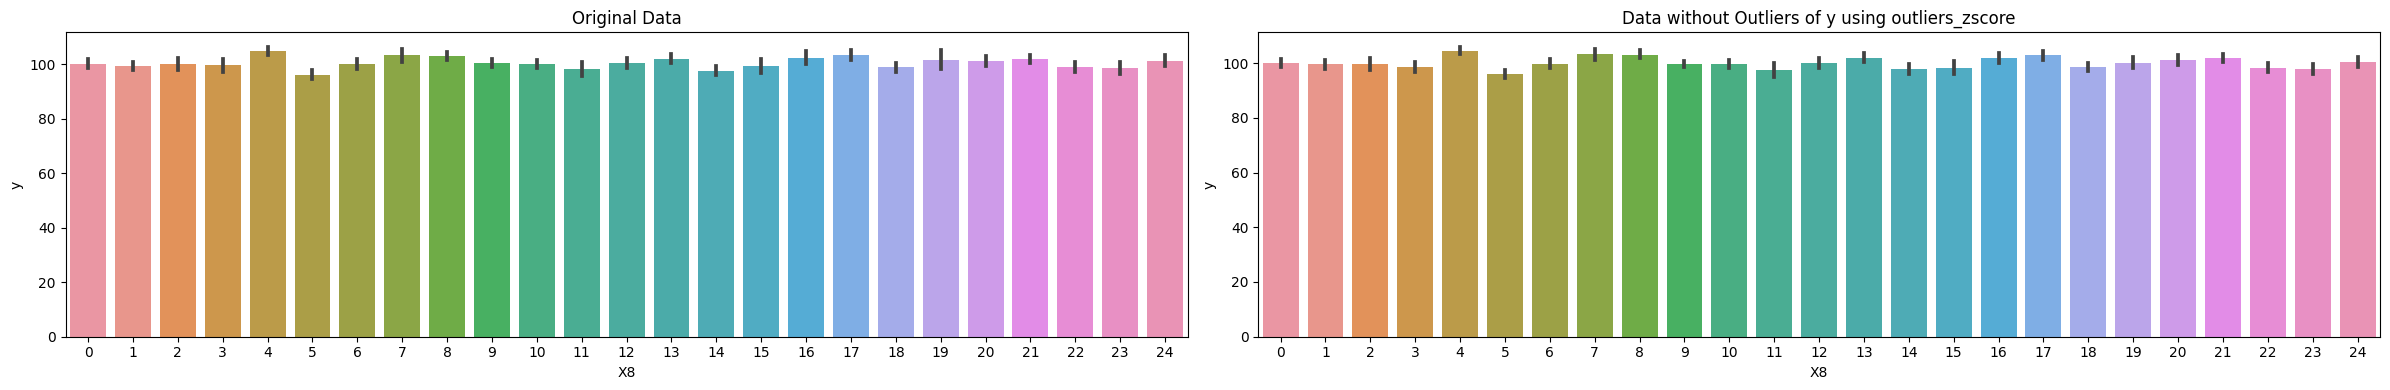

length of y outliers_indices: 50


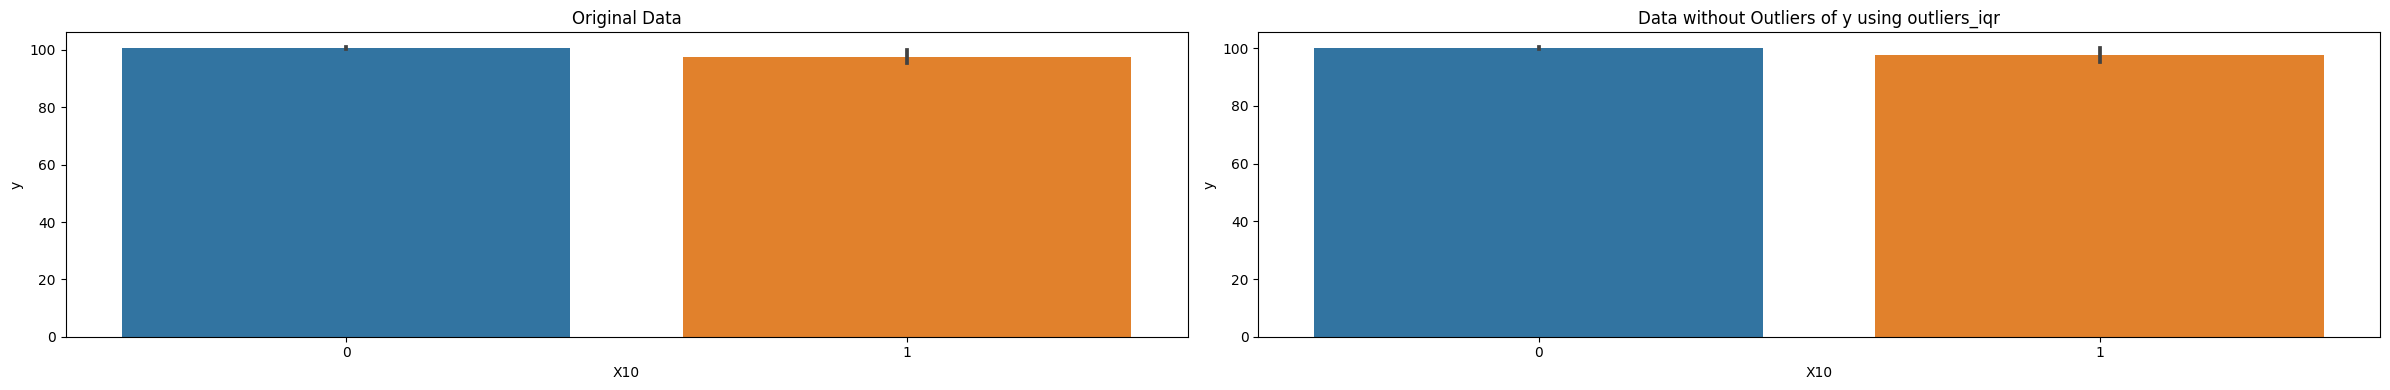

length of y outliers_indices: 40


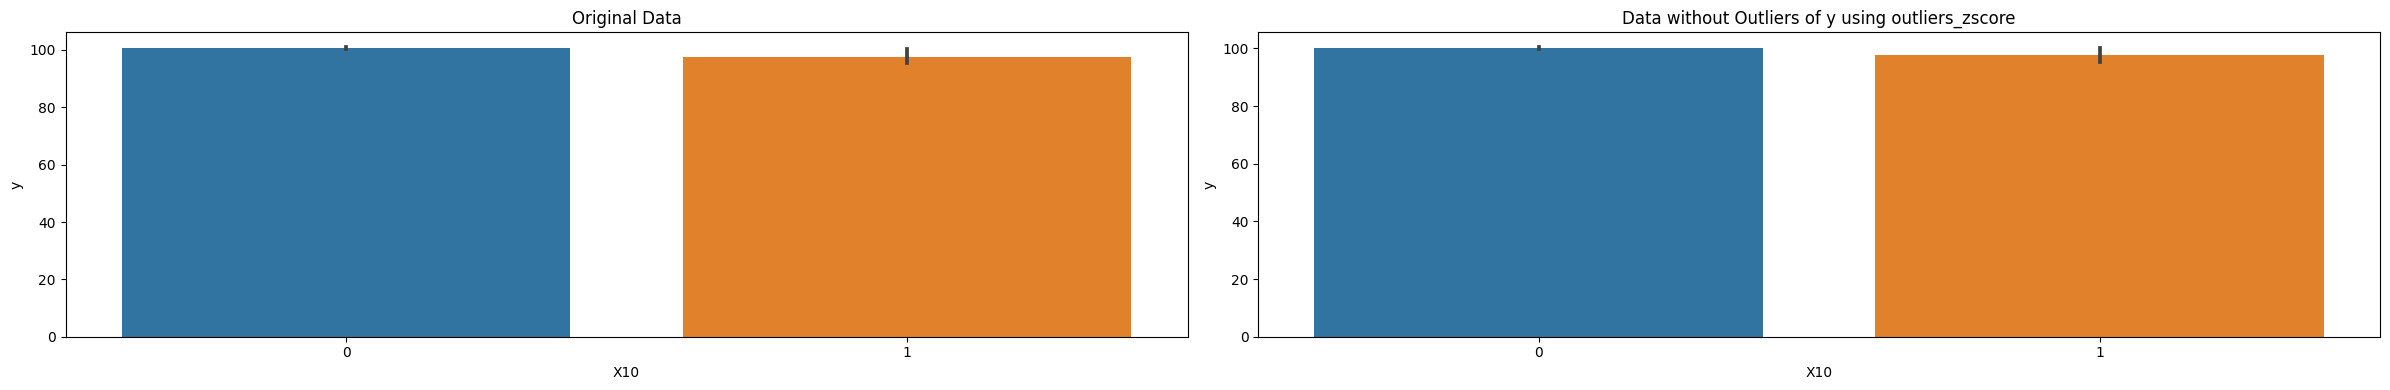

In [61]:
for col in categorical_features[:8]:
    detect_outliers(df[[col]+['y']], 'y', outliers_iqr,    sns.barplot)
    detect_outliers(df[[col]+['y']], 'y', outliers_zscore, sns.barplot)

length of y outliers_indices: 50


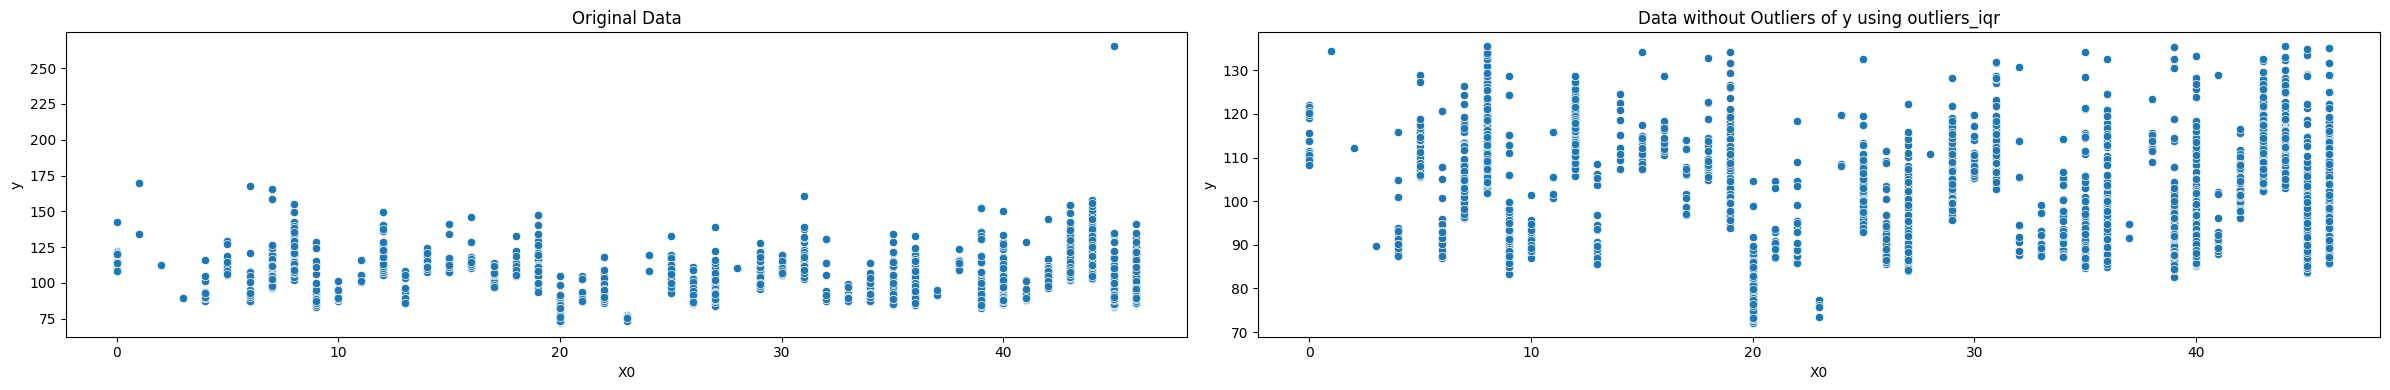

length of y outliers_indices: 40


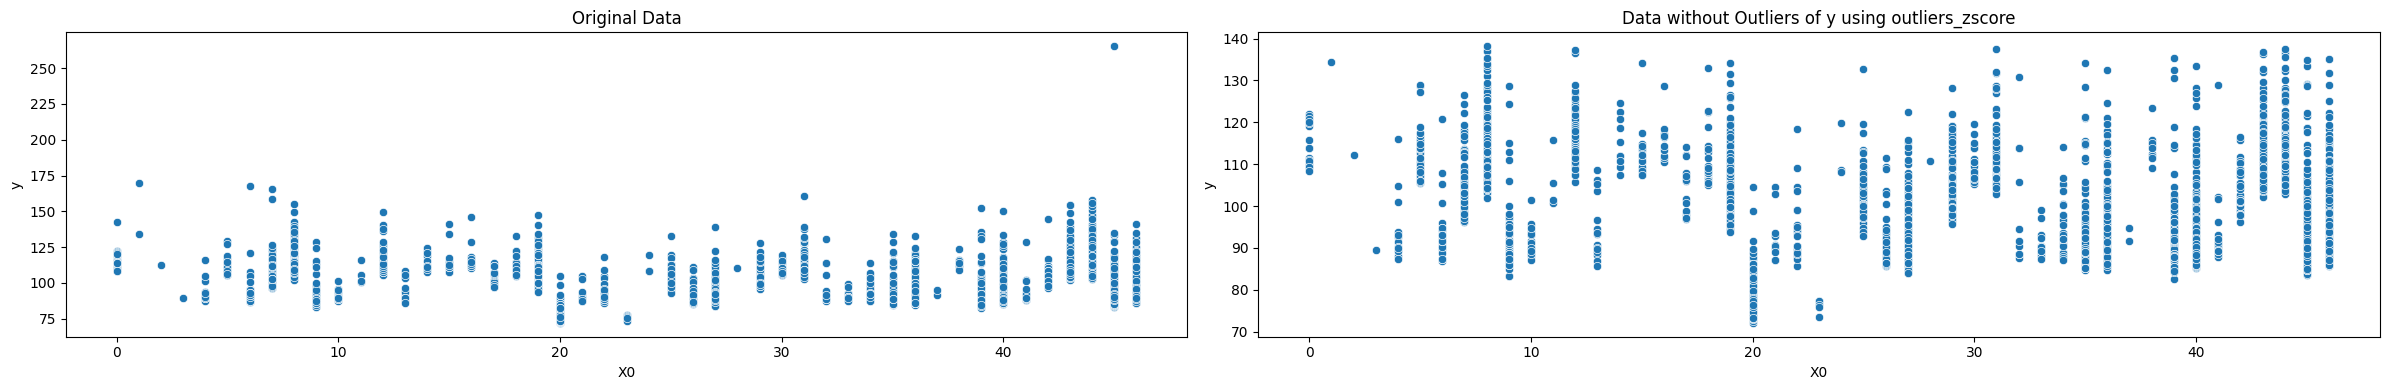

length of y outliers_indices: 50


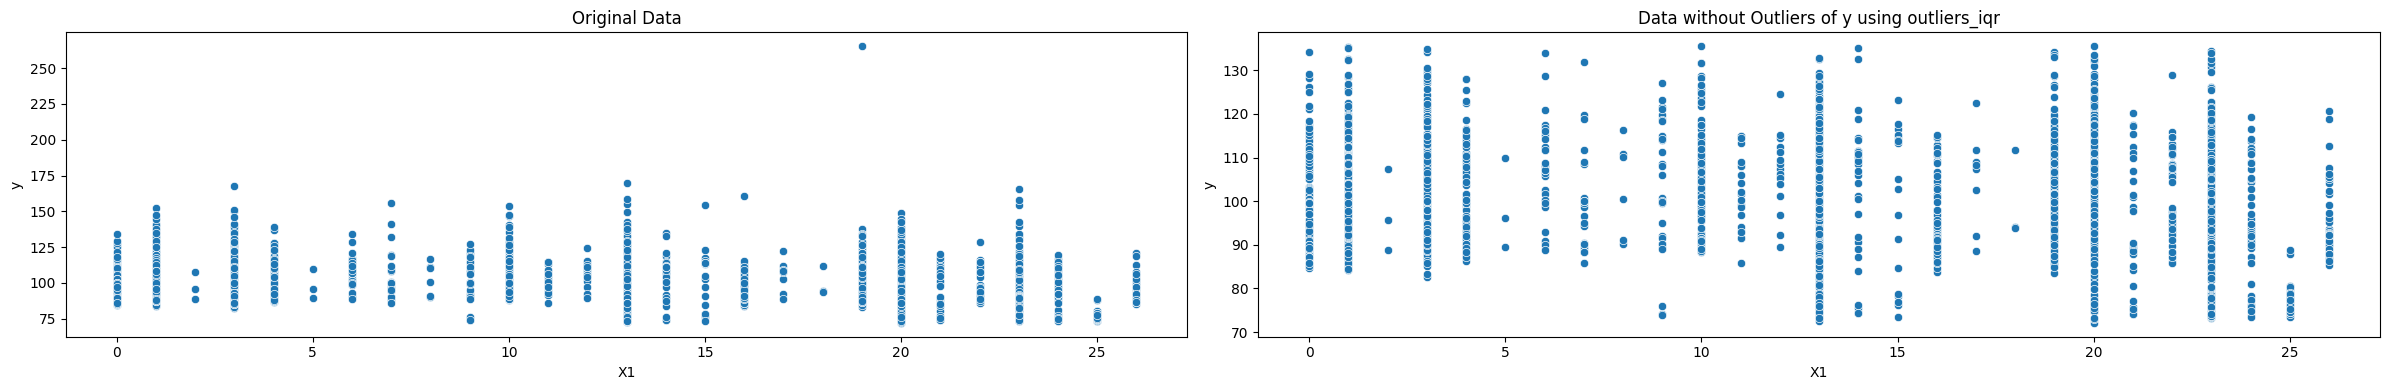

length of y outliers_indices: 40


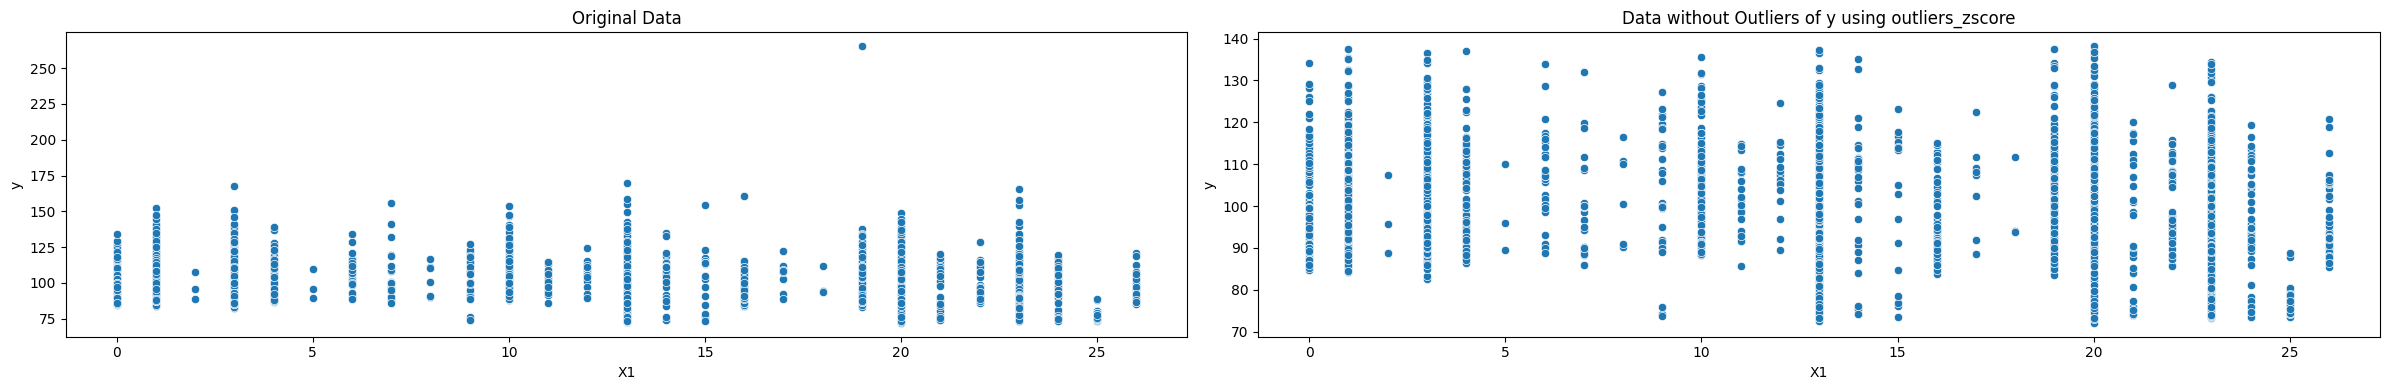

length of y outliers_indices: 50


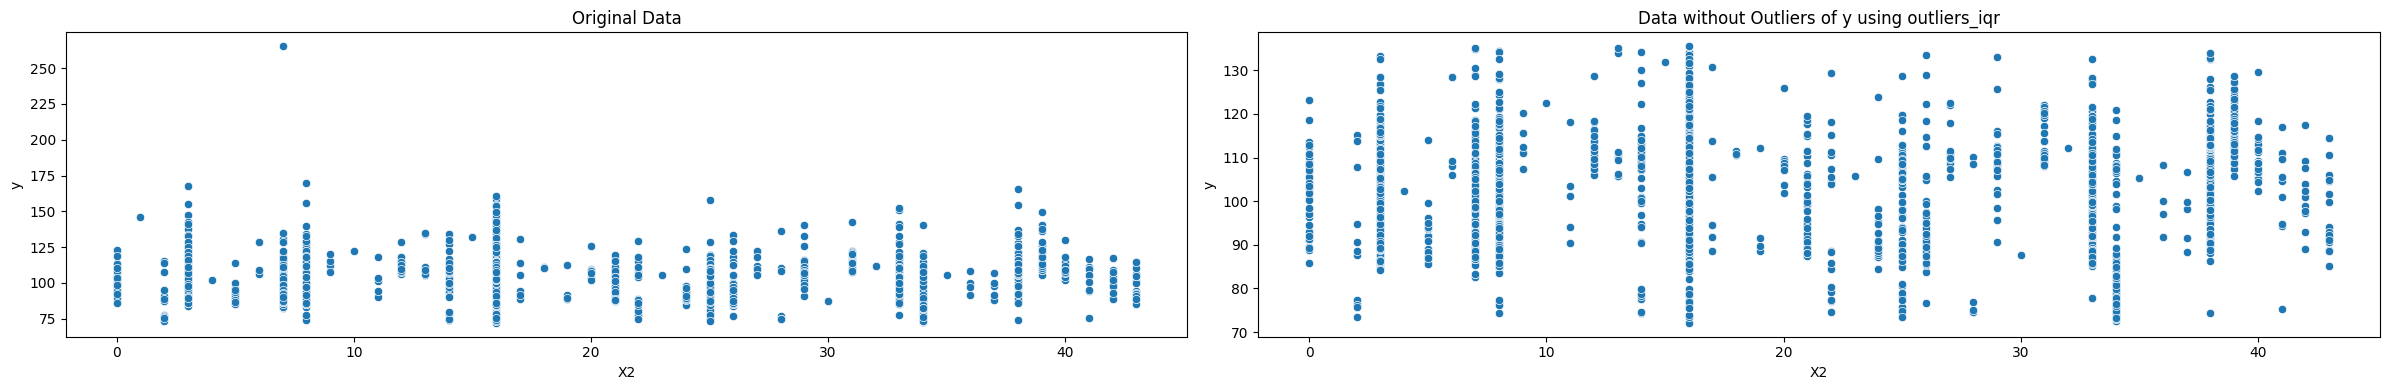

length of y outliers_indices: 40


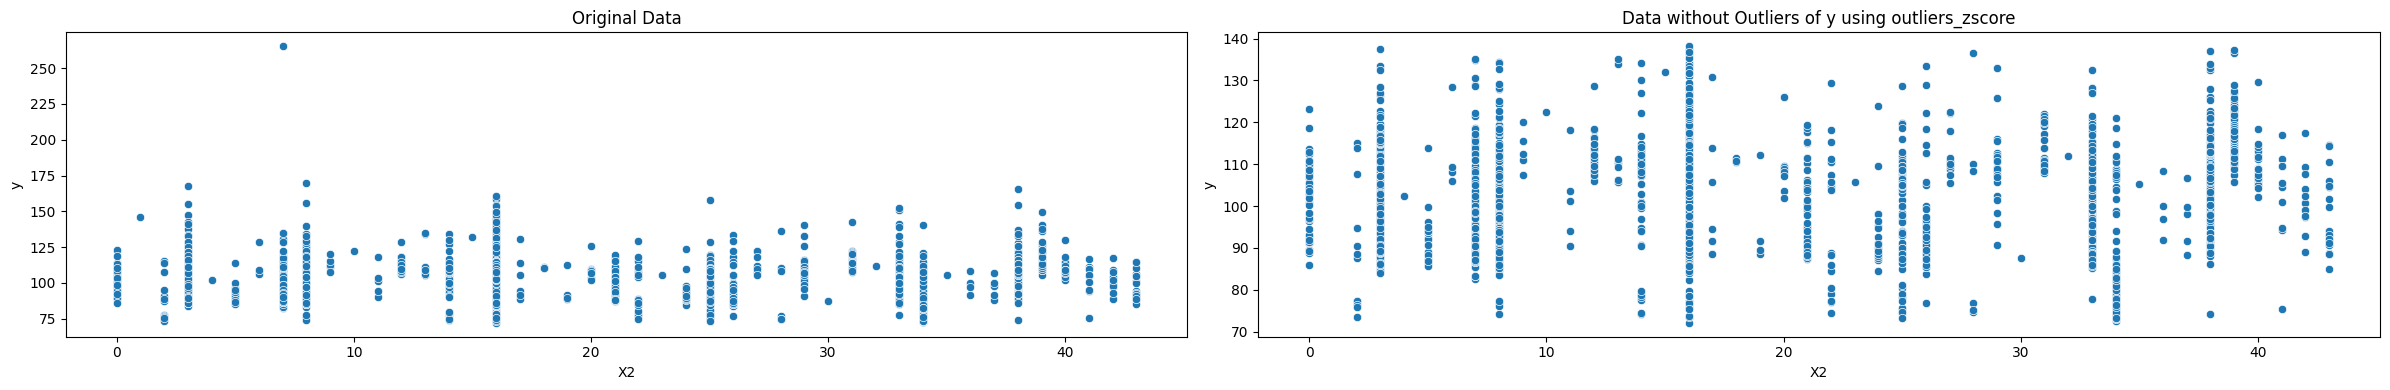

length of y outliers_indices: 50


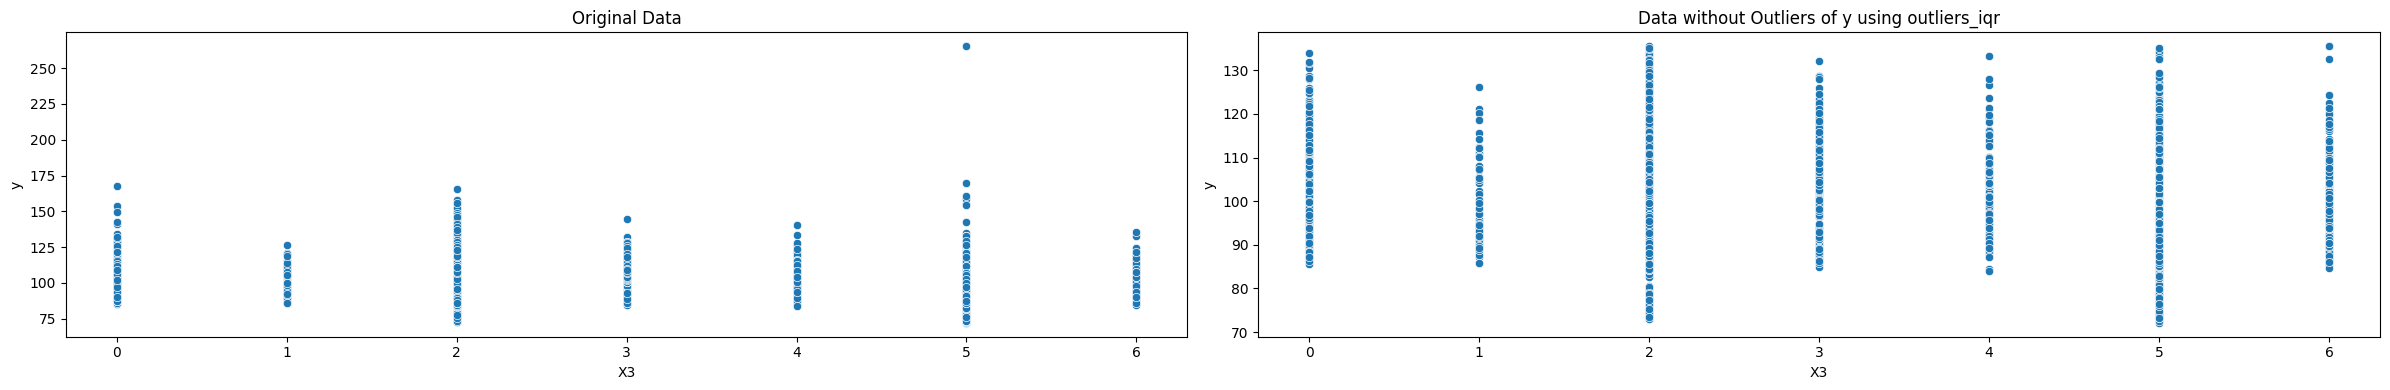

length of y outliers_indices: 40


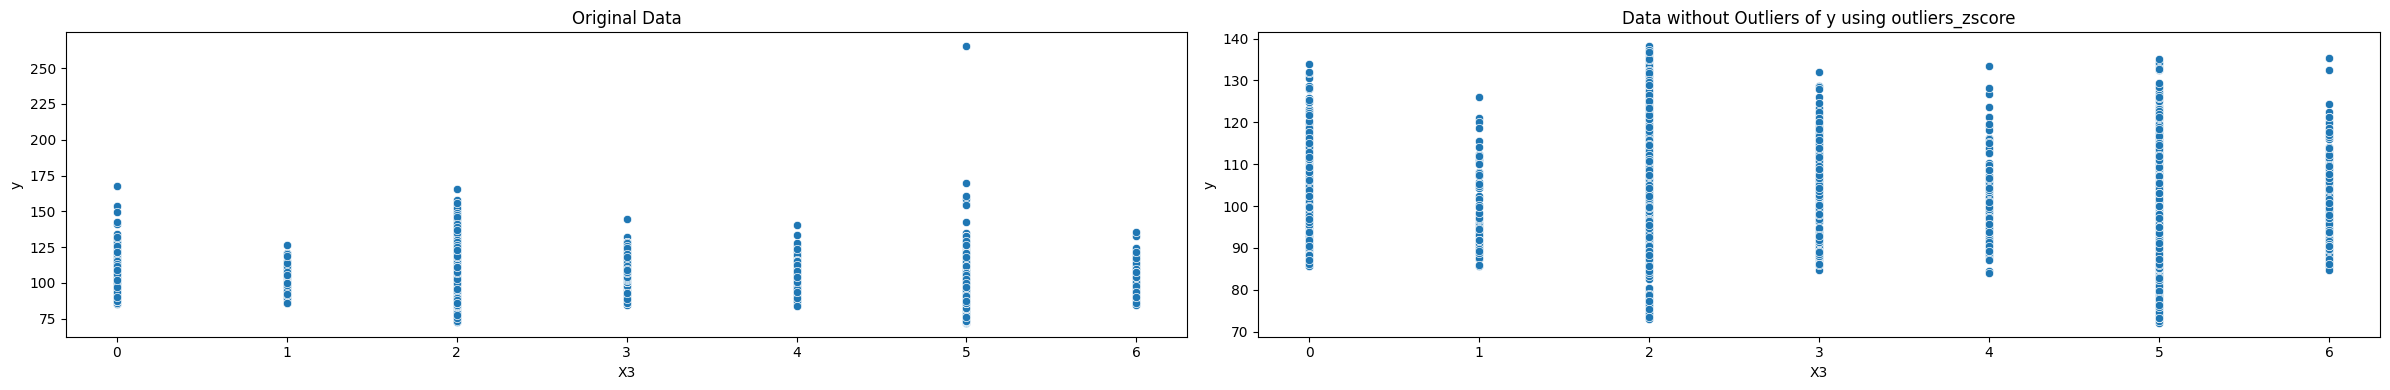

length of y outliers_indices: 50


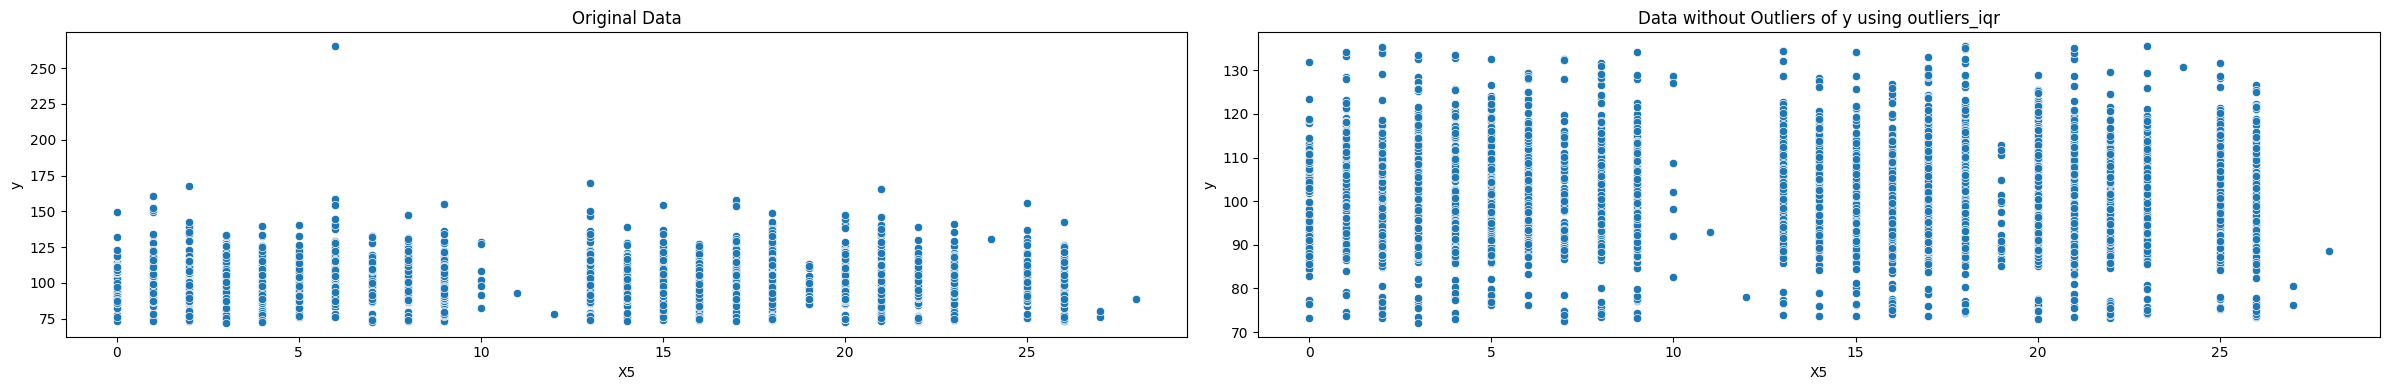

length of y outliers_indices: 40


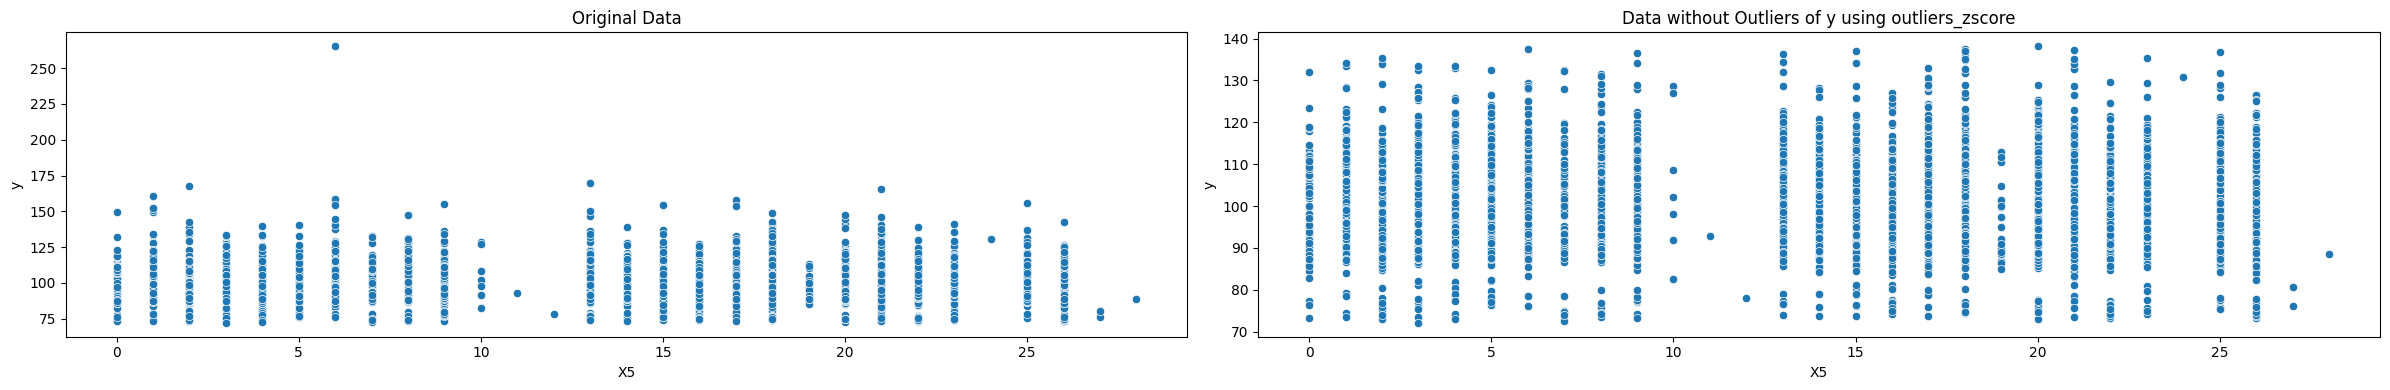

length of y outliers_indices: 50


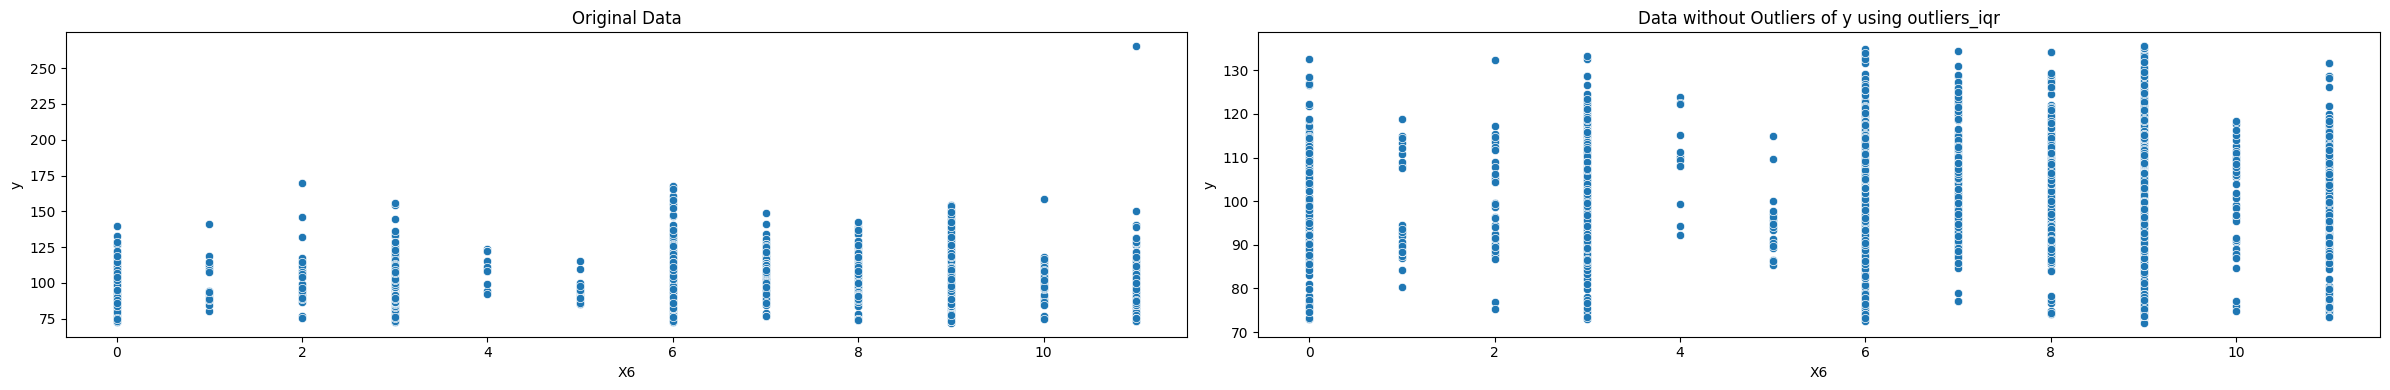

length of y outliers_indices: 40


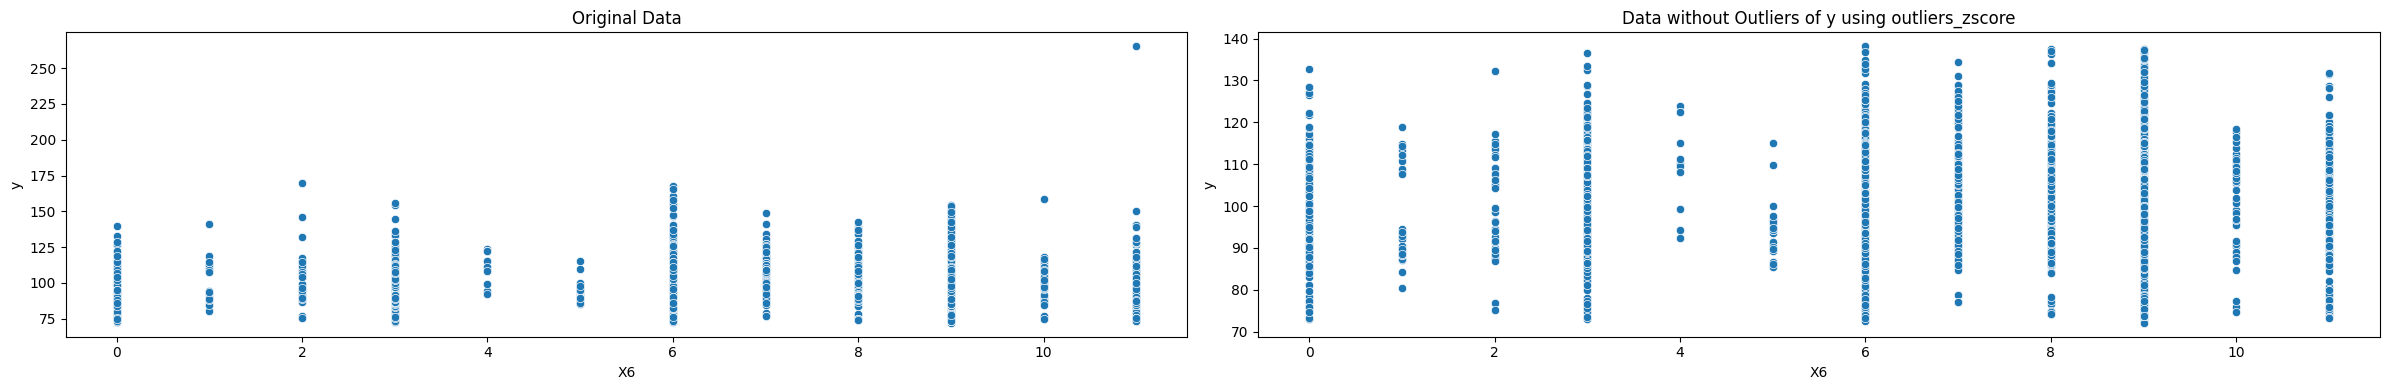

length of y outliers_indices: 50


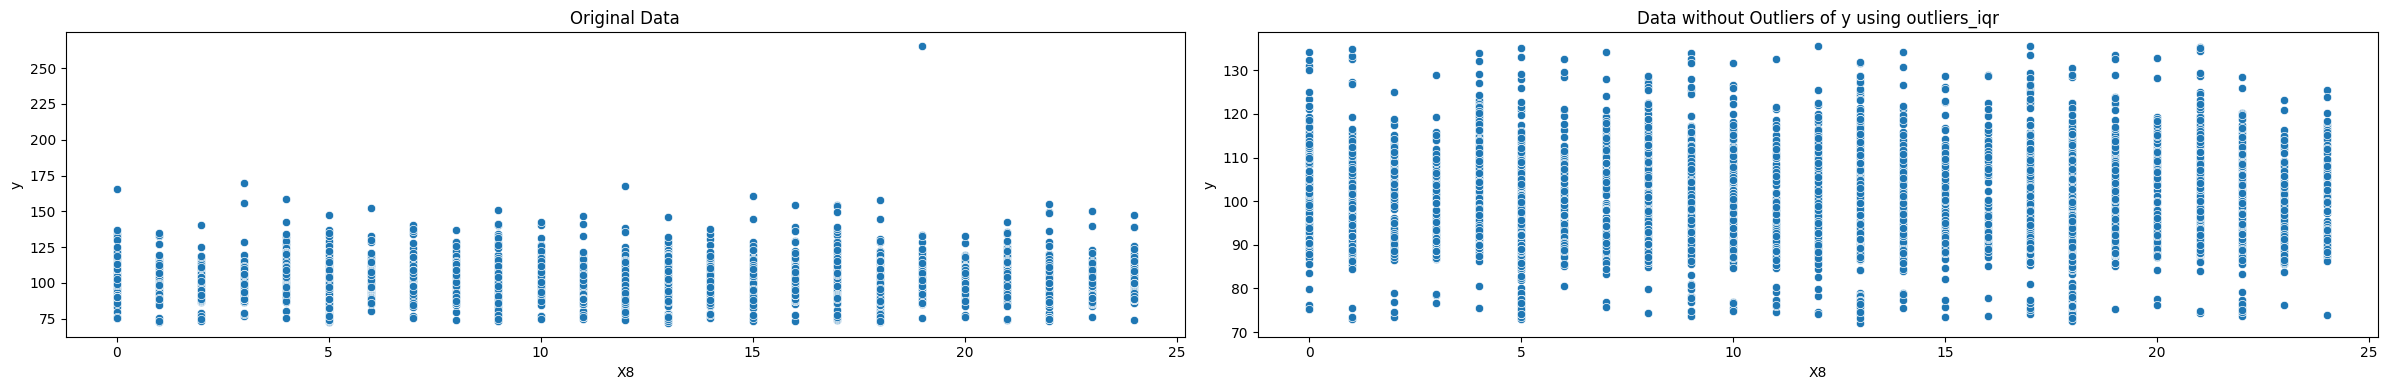

length of y outliers_indices: 40


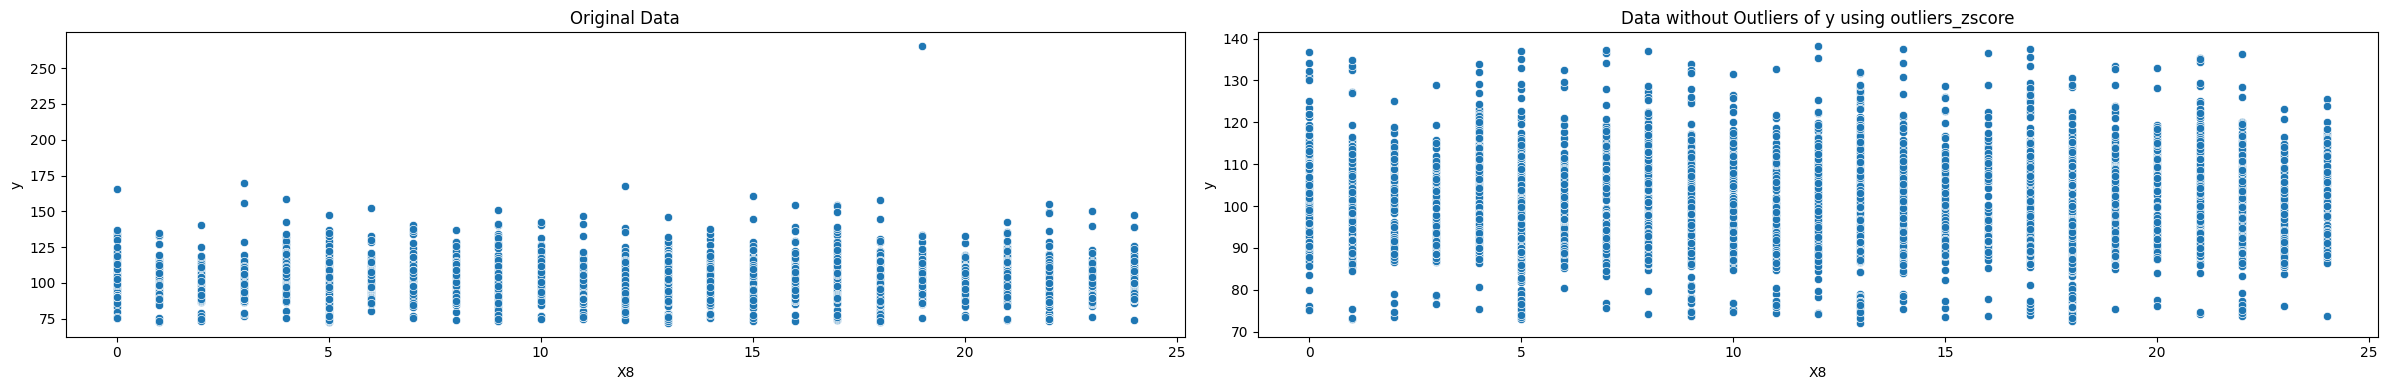

length of y outliers_indices: 50


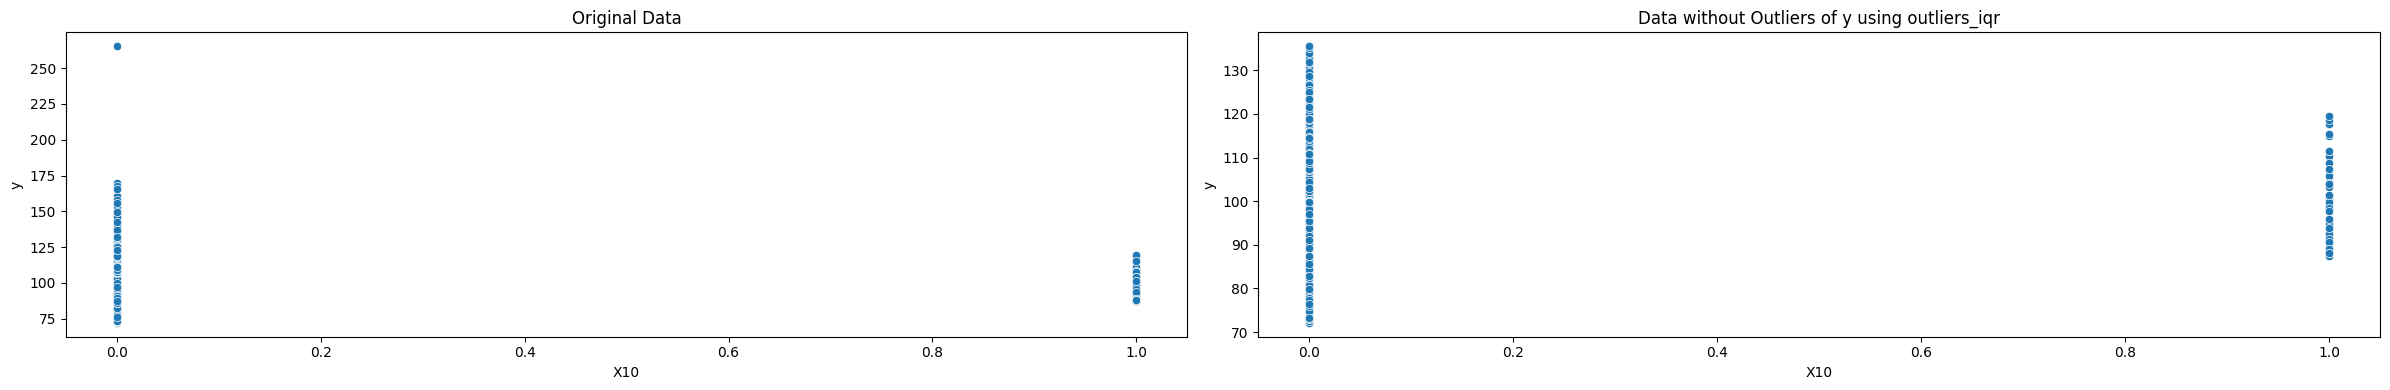

length of y outliers_indices: 40


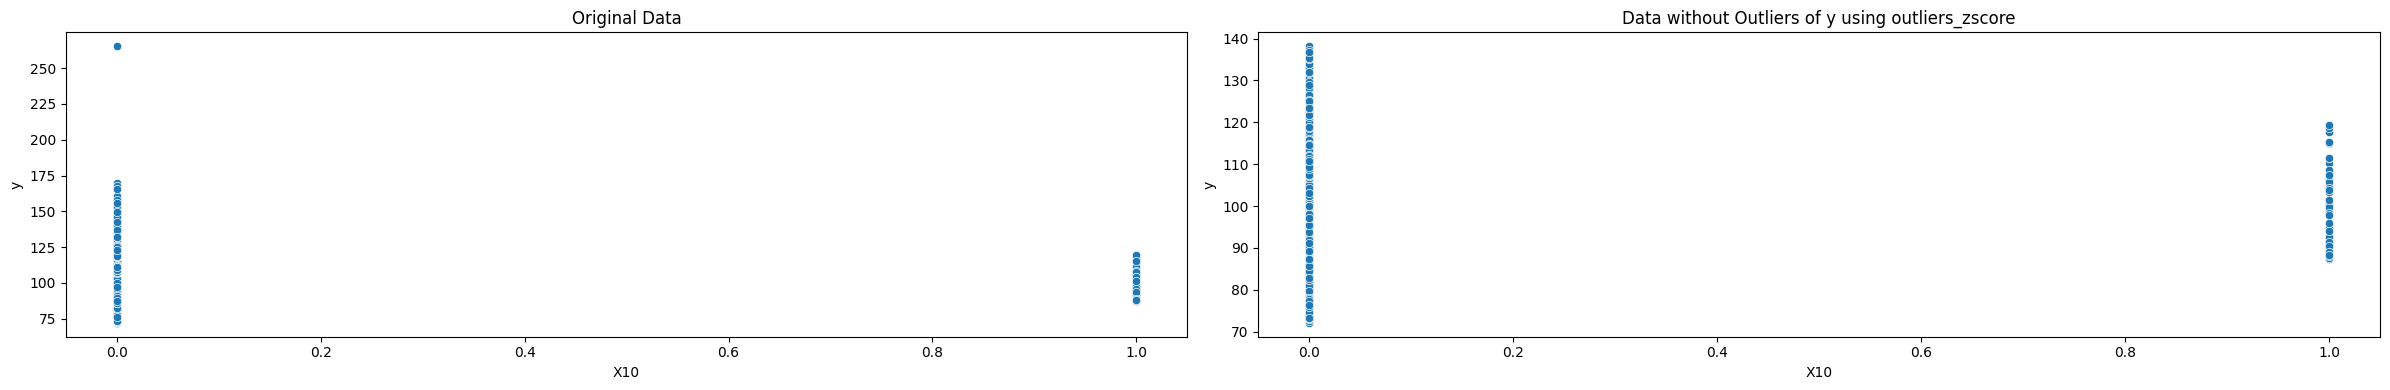

In [62]:
for col in categorical_features[:8]:
    detect_outliers(df[[col]+['y']], 'y', outliers_iqr,    sns.scatterplot)
    detect_outliers(df[[col]+['y']], 'y', outliers_zscore, sns.scatterplot)

length of y outliers_indices: 50


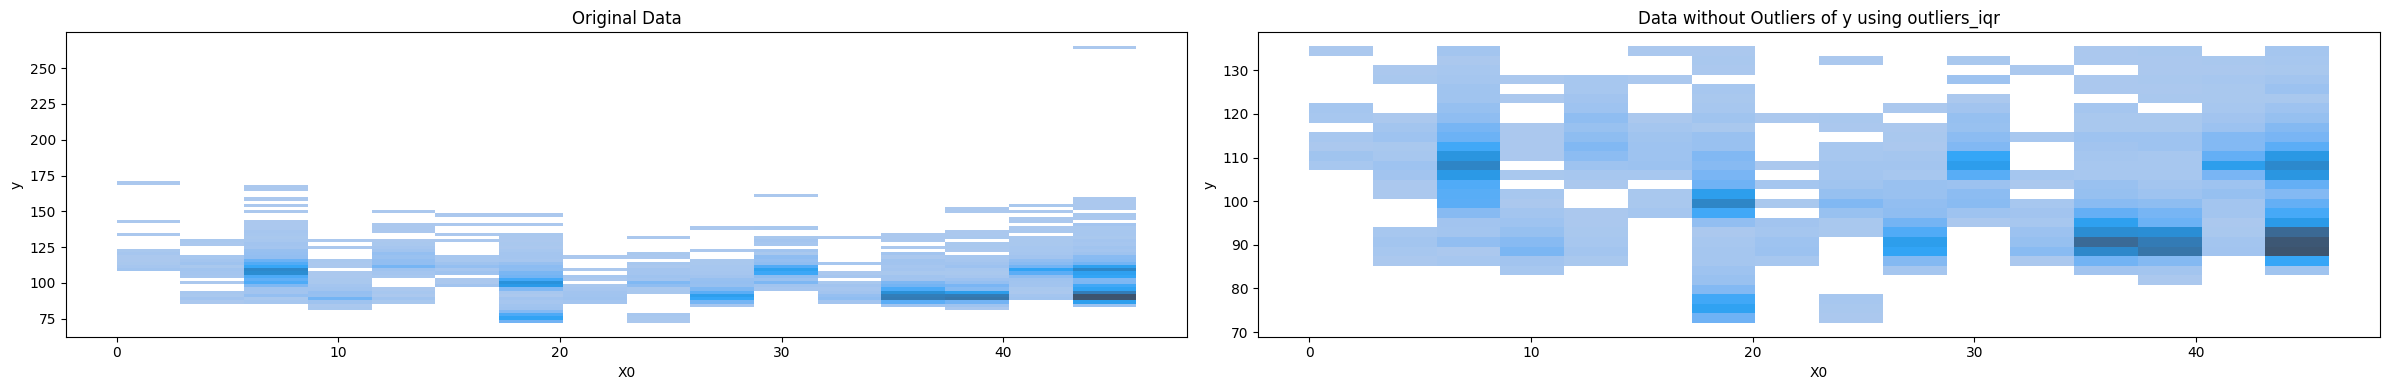

length of y outliers_indices: 40


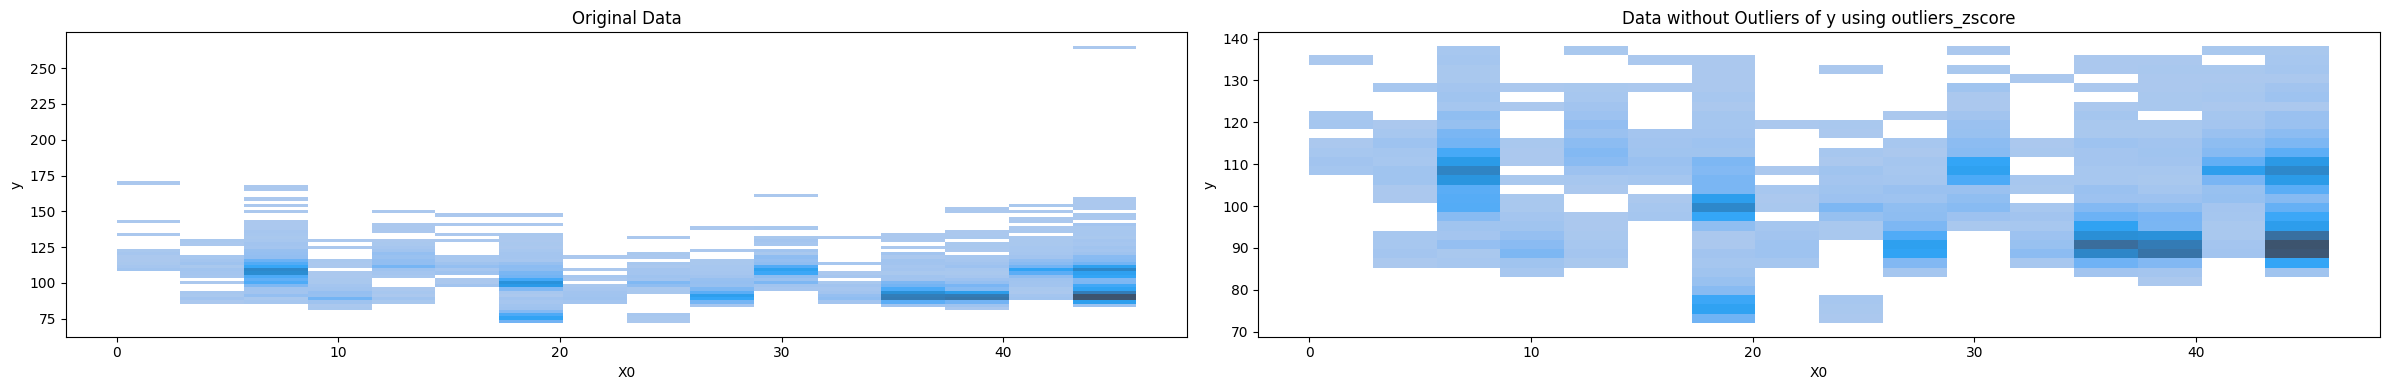

length of y outliers_indices: 50


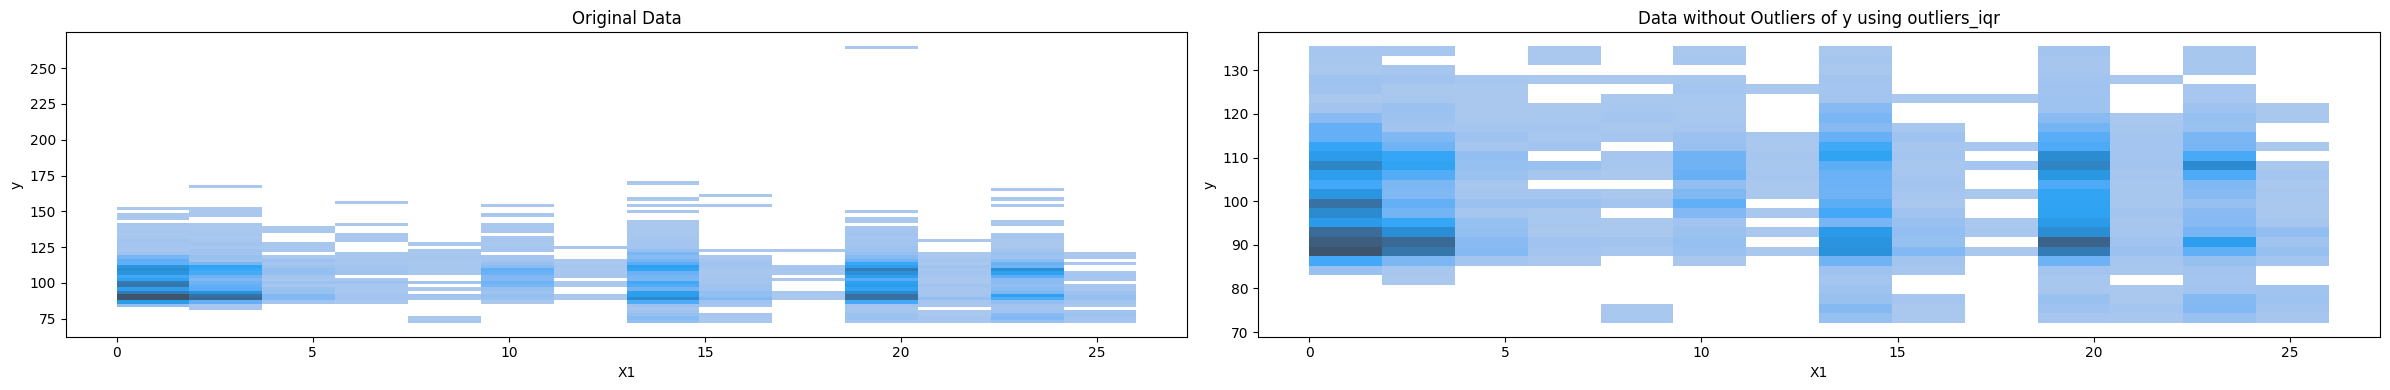

length of y outliers_indices: 40


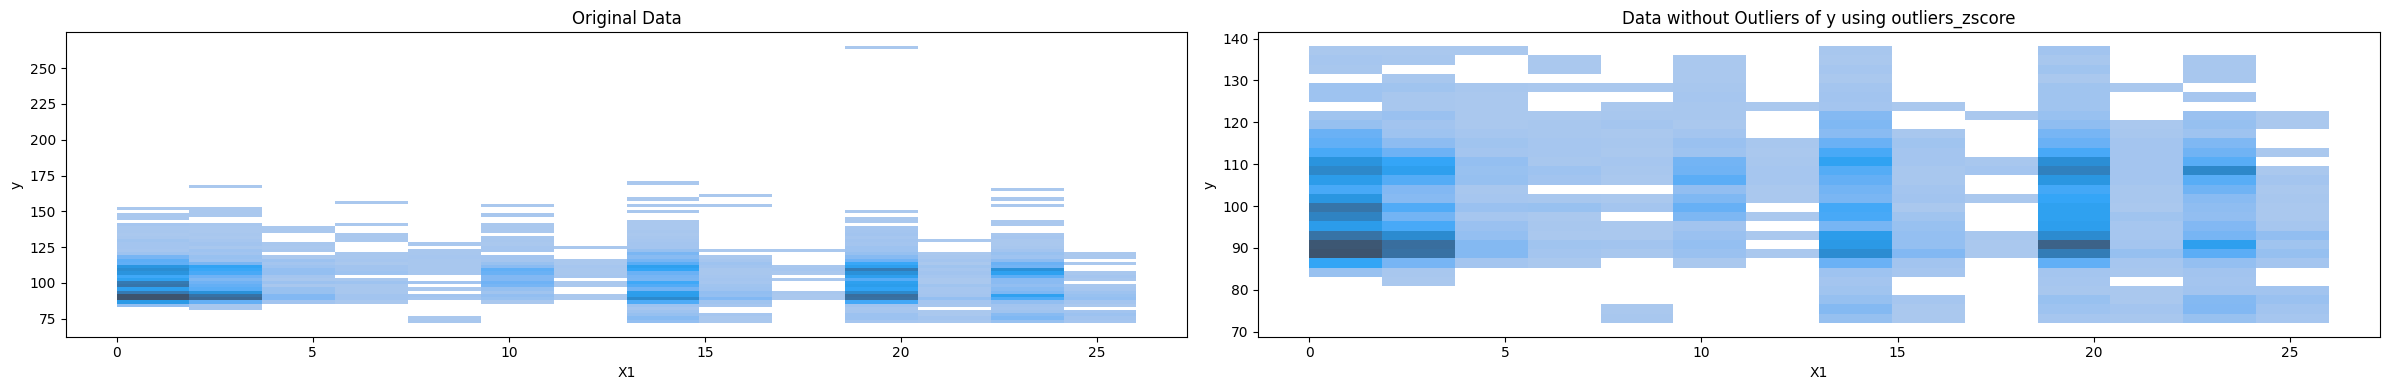

length of y outliers_indices: 50


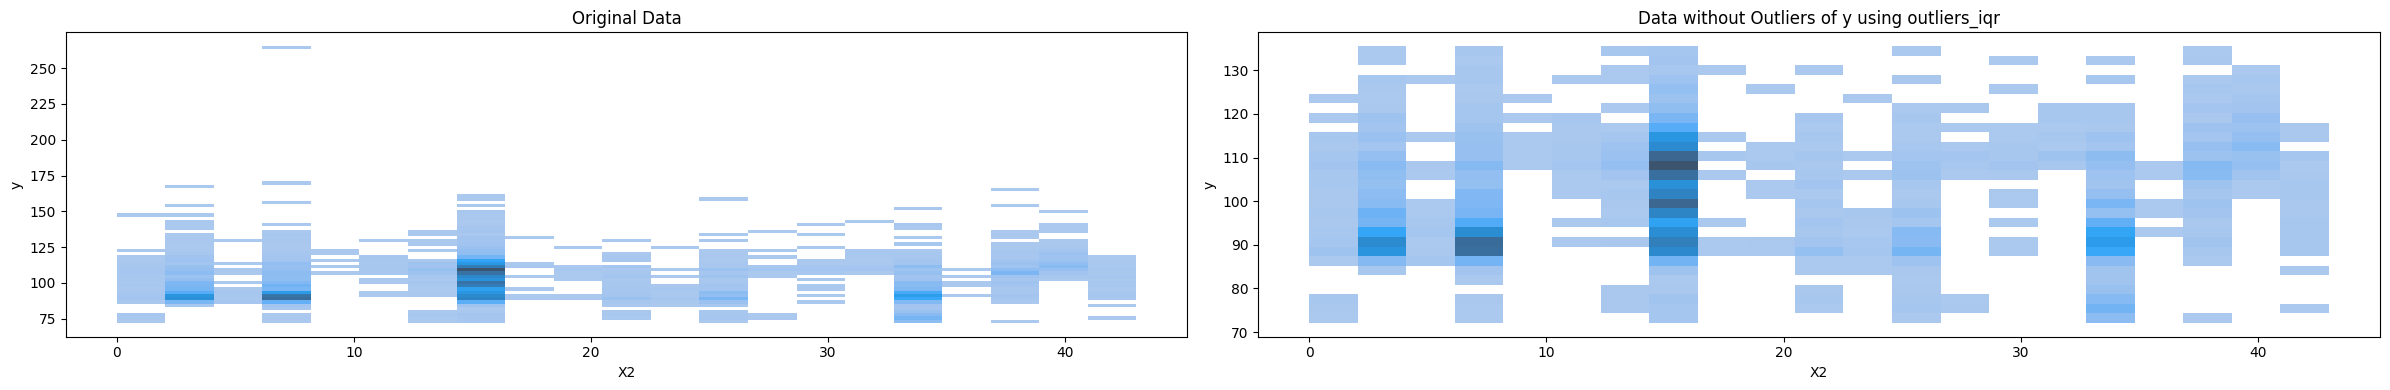

length of y outliers_indices: 40


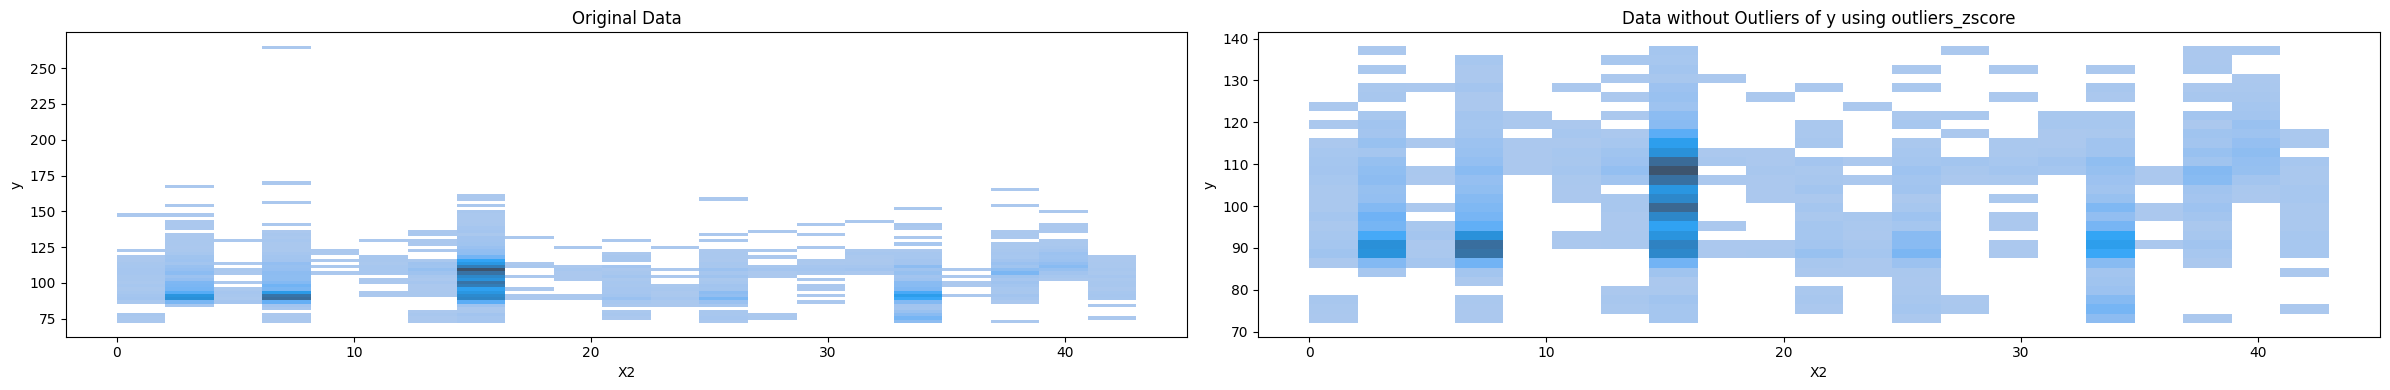

length of y outliers_indices: 50


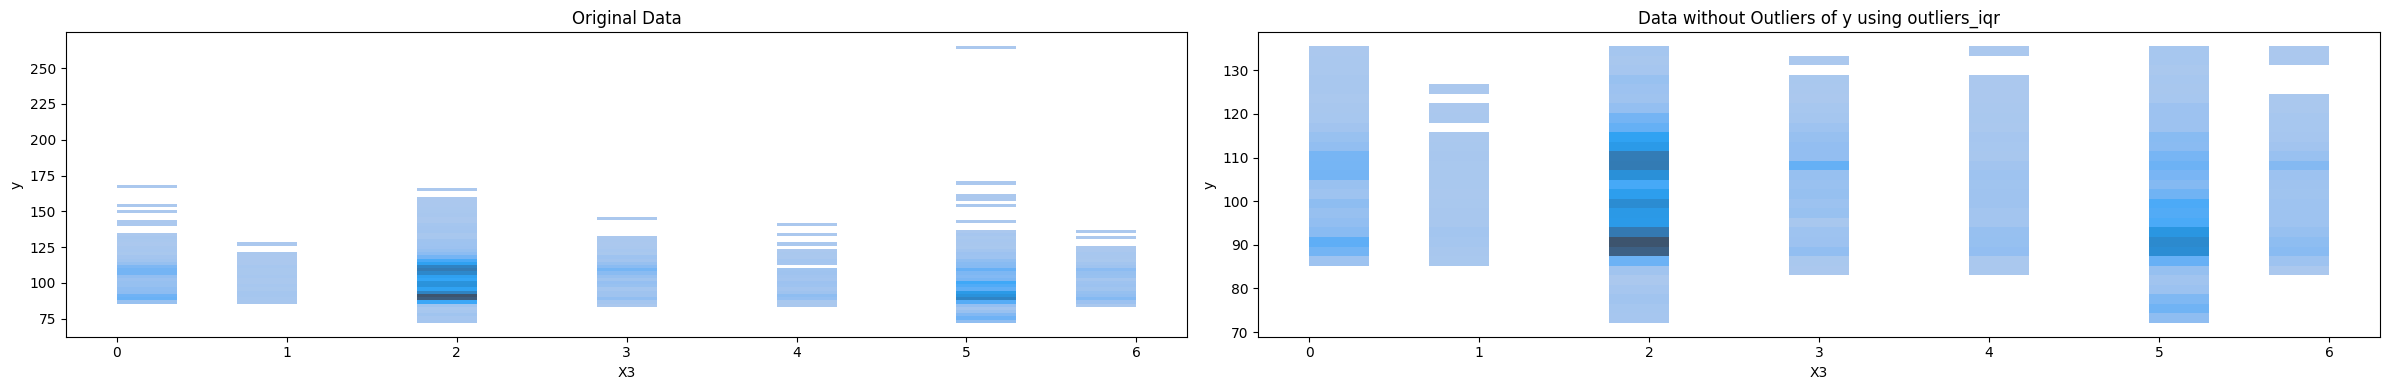

length of y outliers_indices: 40


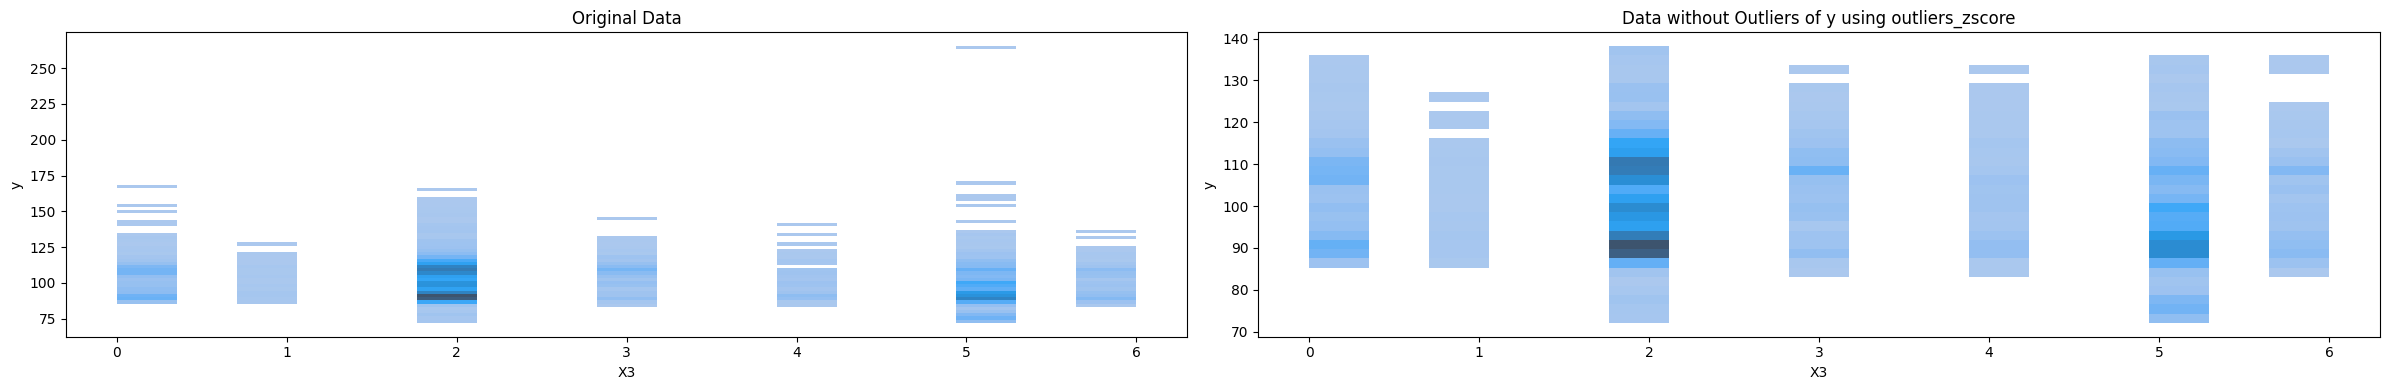

length of y outliers_indices: 50


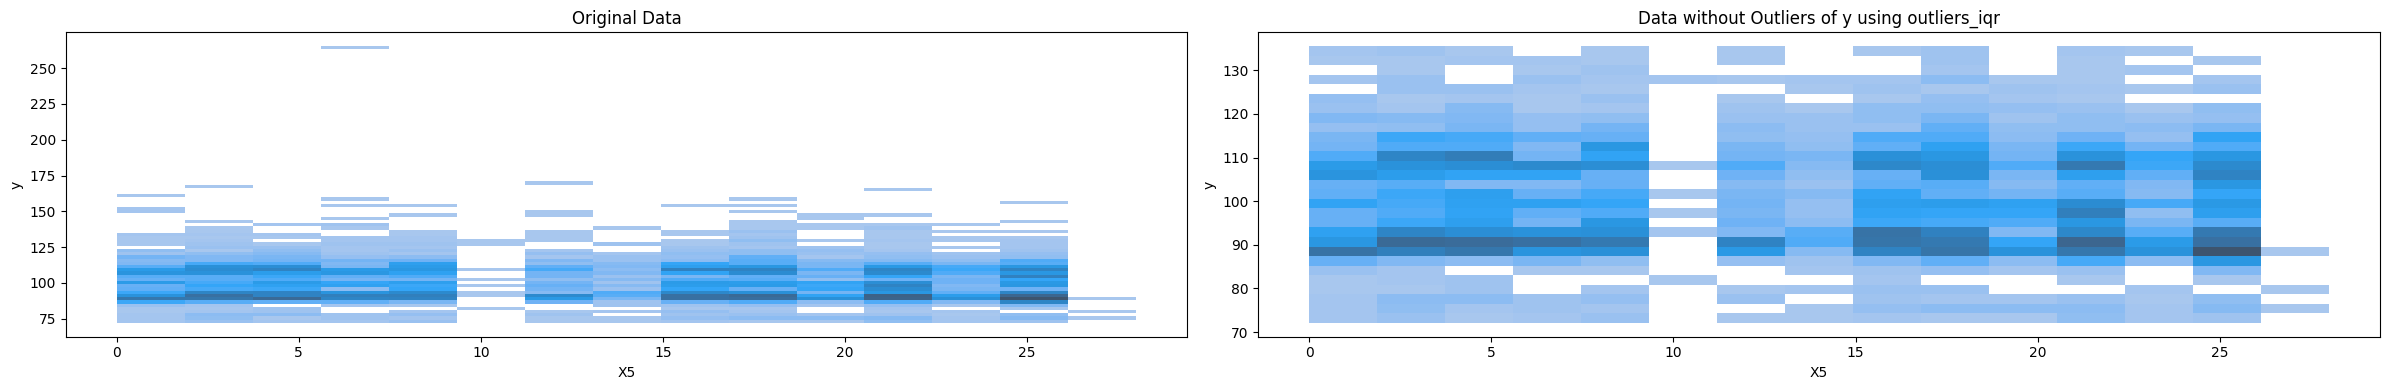

length of y outliers_indices: 40


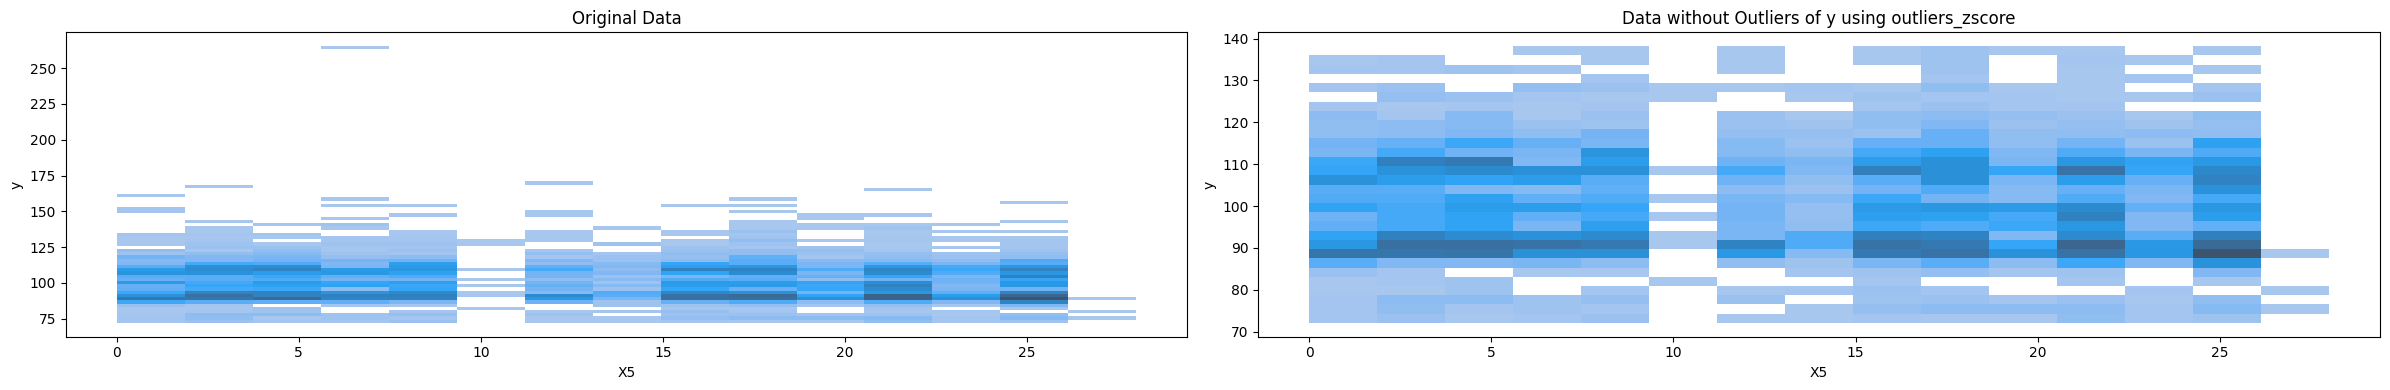

length of y outliers_indices: 50


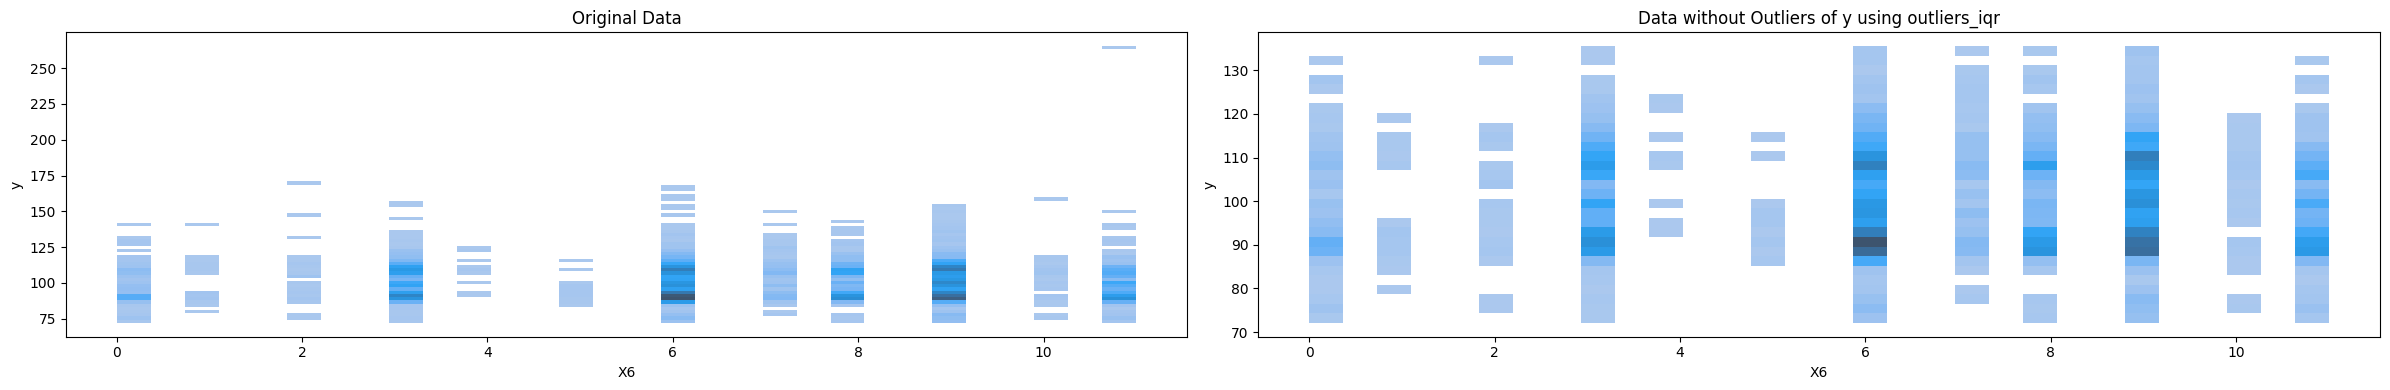

length of y outliers_indices: 40


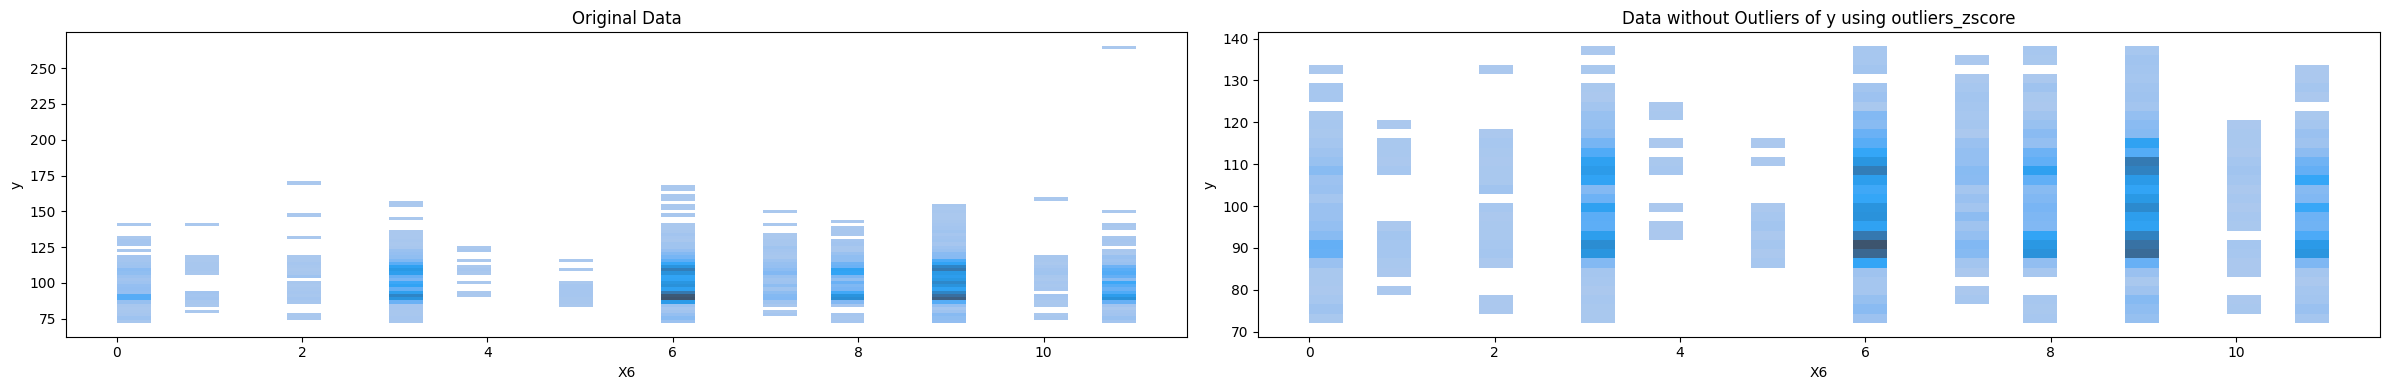

length of y outliers_indices: 50


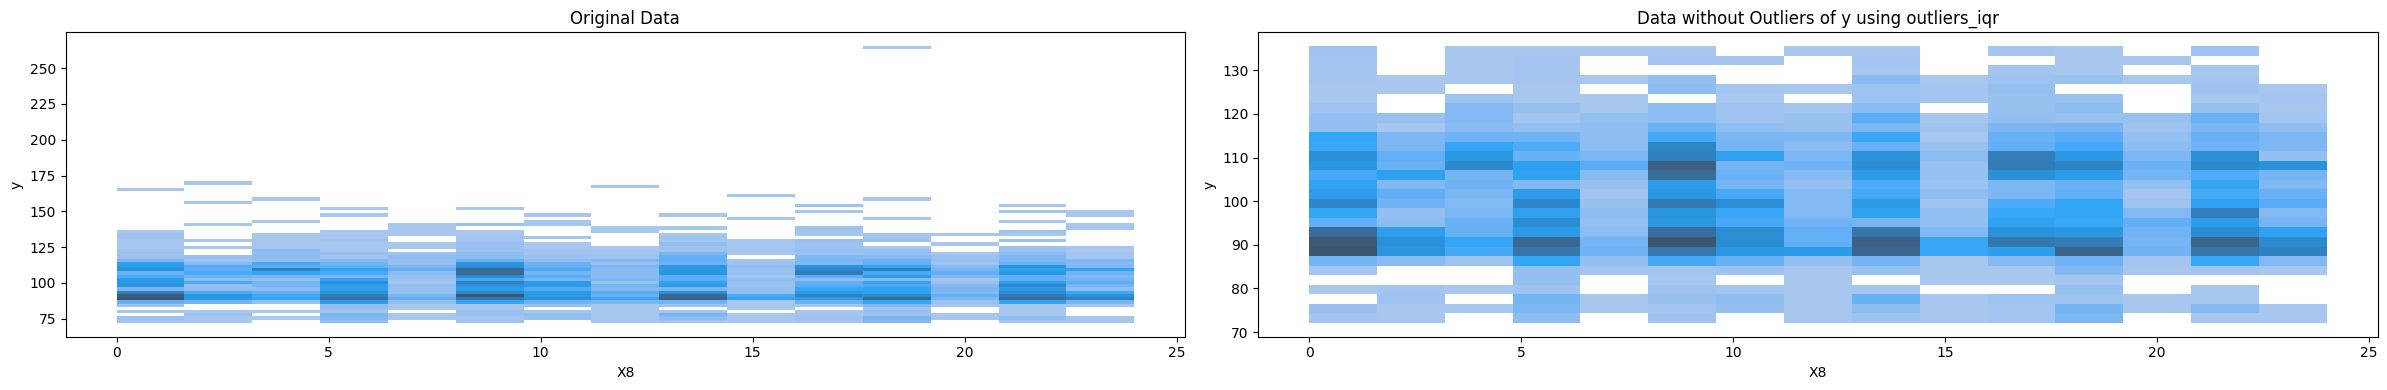

length of y outliers_indices: 40


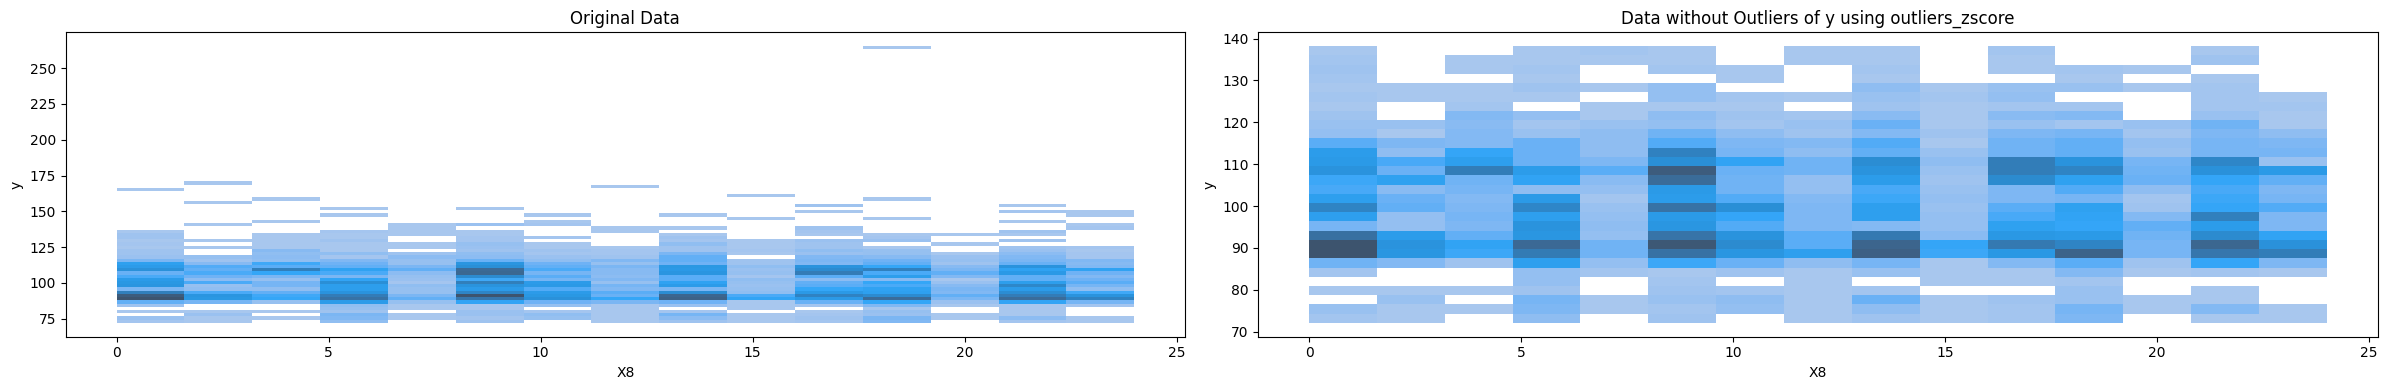

length of y outliers_indices: 50


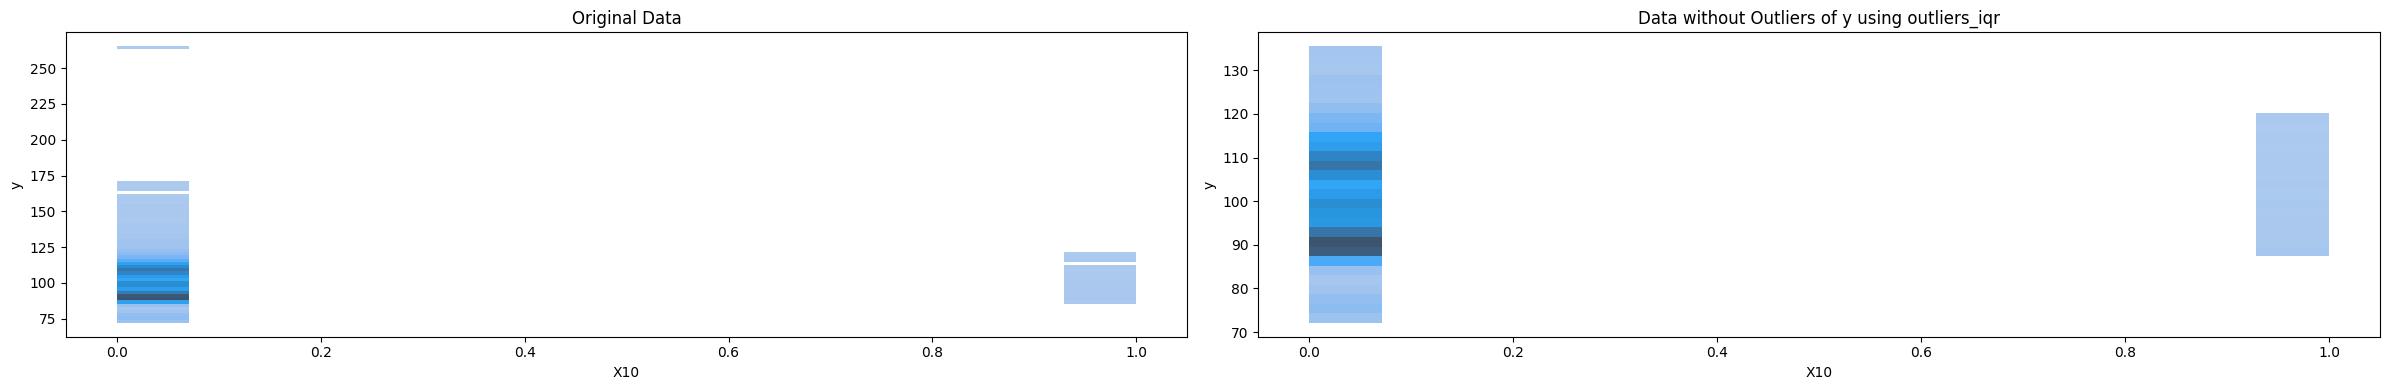

length of y outliers_indices: 40


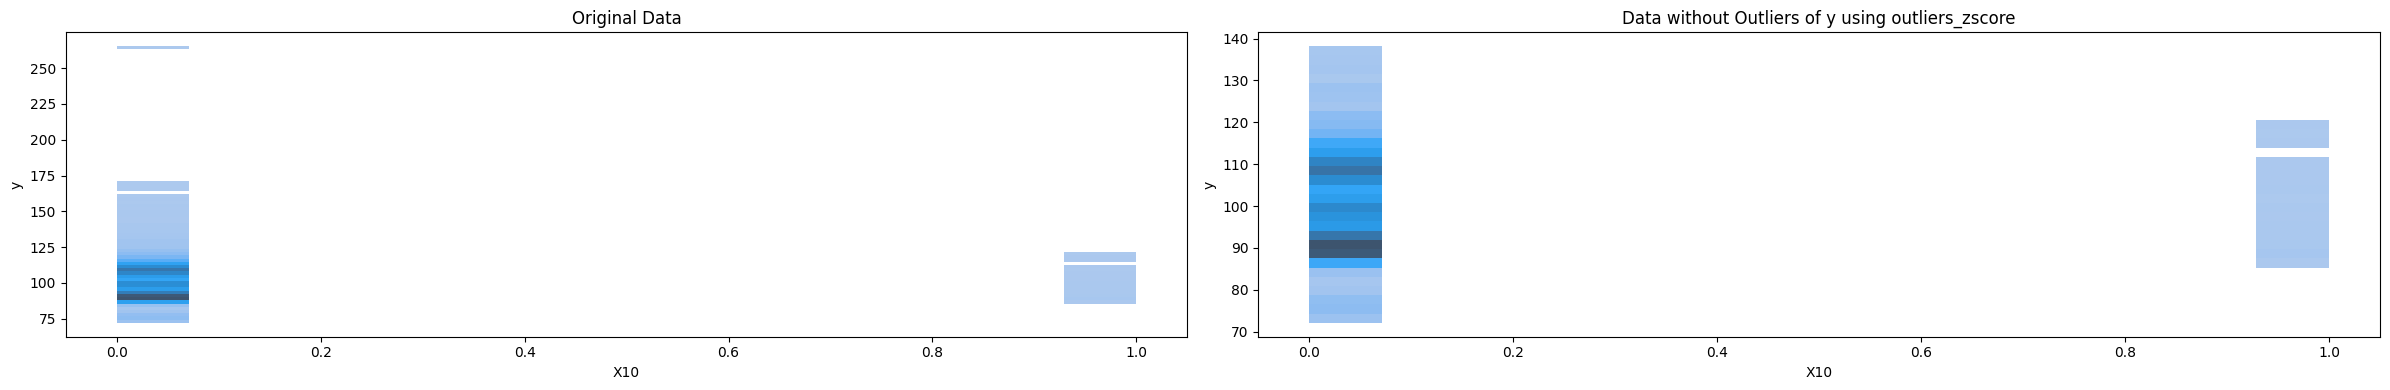

In [63]:
for col in categorical_features[:8]:
    detect_outliers(df[[col]+['y']], 'y', outliers_iqr,    sns.histplot)
    detect_outliers(df[[col]+['y']], 'y', outliers_zscore, sns.histplot)

# Single Feature Analysis

In [64]:
def plot_top_n(df, xlabel, ylabel, n=25, figsize=(12, 4)):
    plt.figure(figsize=figsize)
    sns.barplot(x=df.index, y=df)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    yminlim = df.min()
    ymaxlim = df.max()
    yrange = (ymaxlim - yminlim) * .05
    yminlim -= yrange
    ymaxlim += yrange
    plt.ylim(yminlim, ymaxlim)
    plt.title(f'Top {n} {xlabel} based on the {ylabel}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

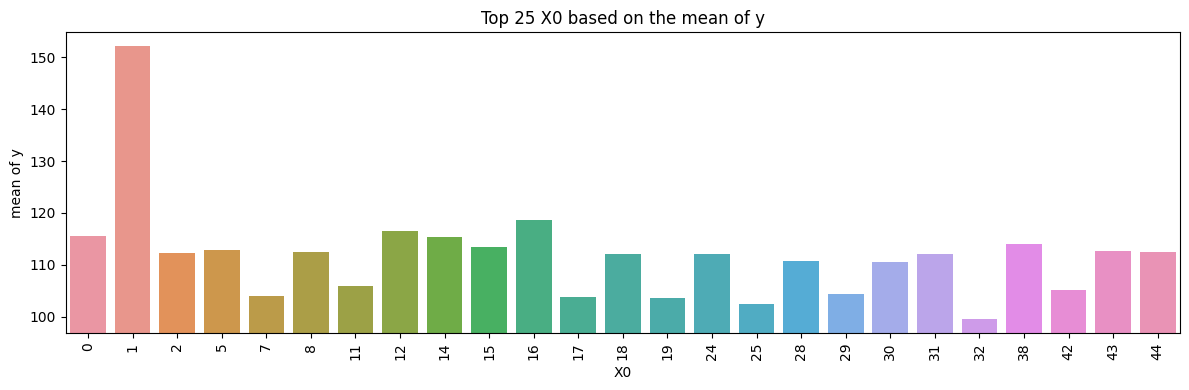

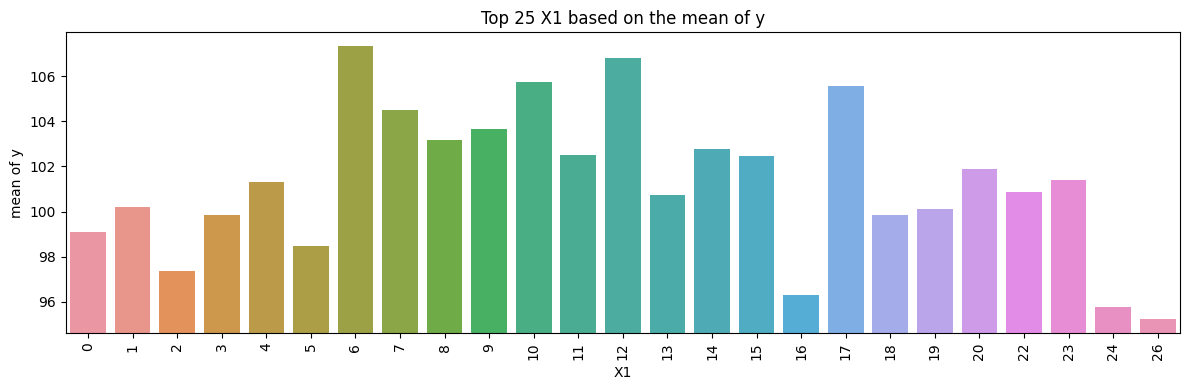

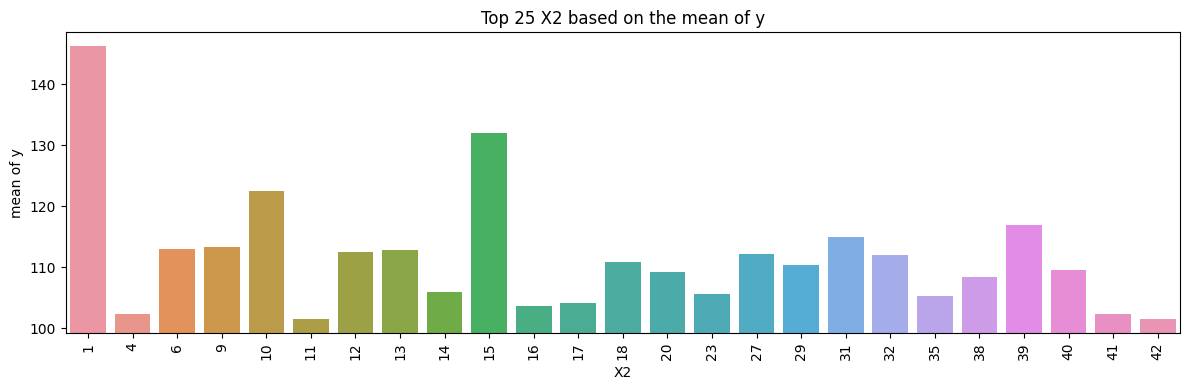

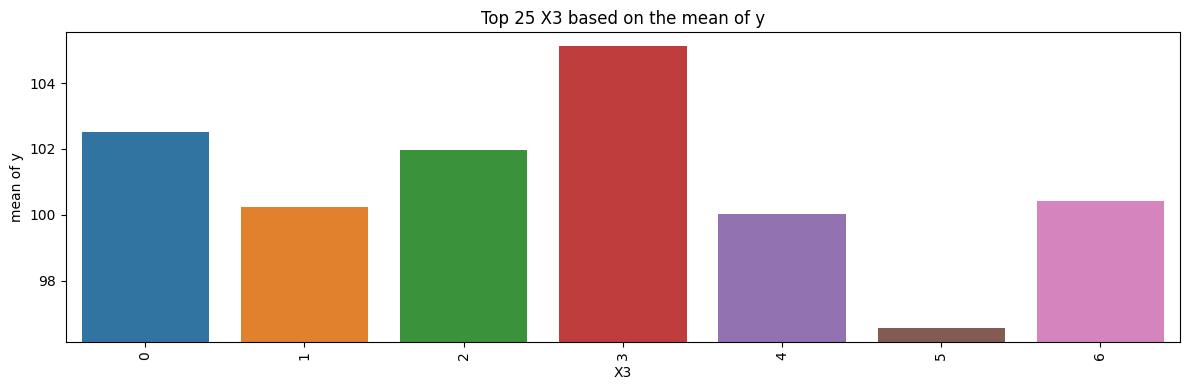

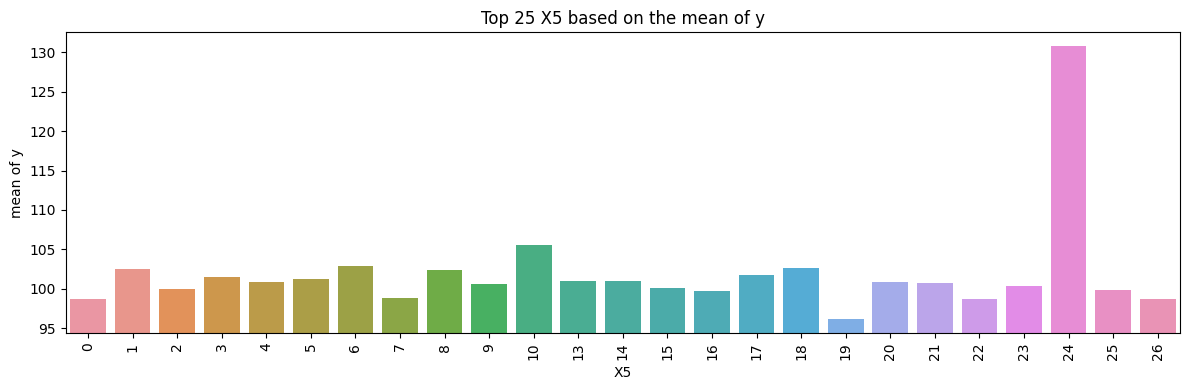

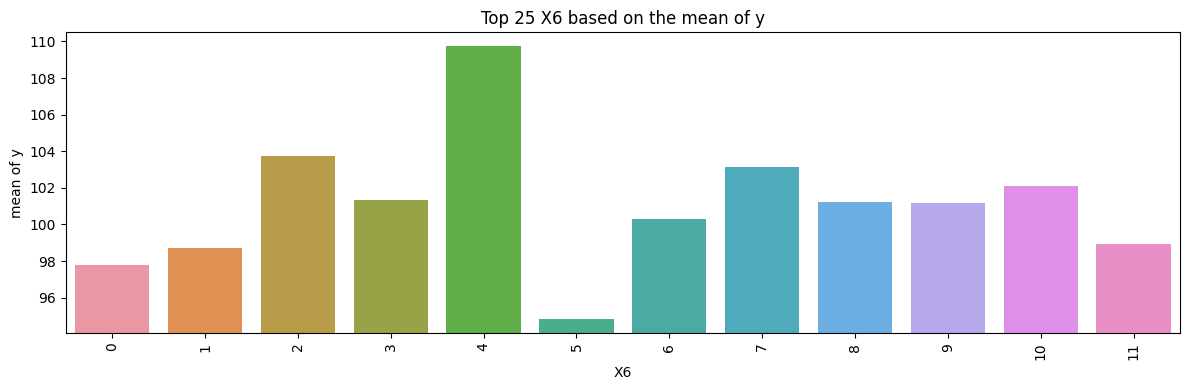

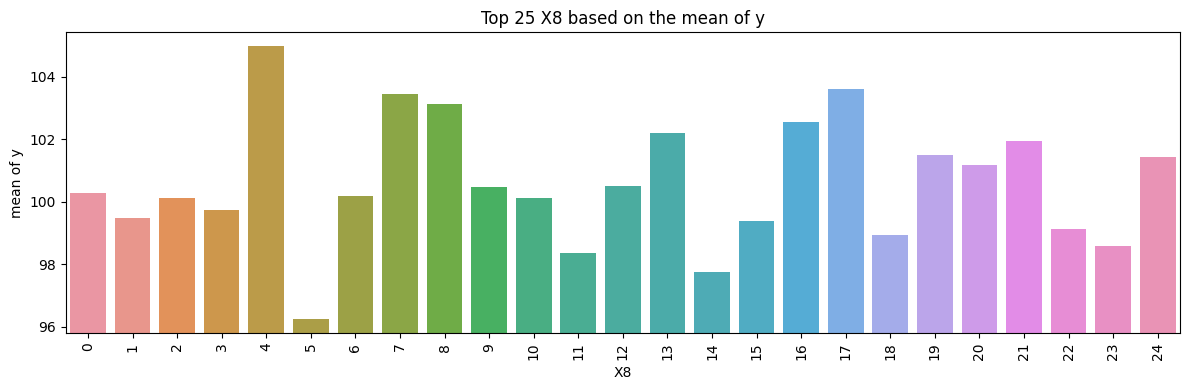

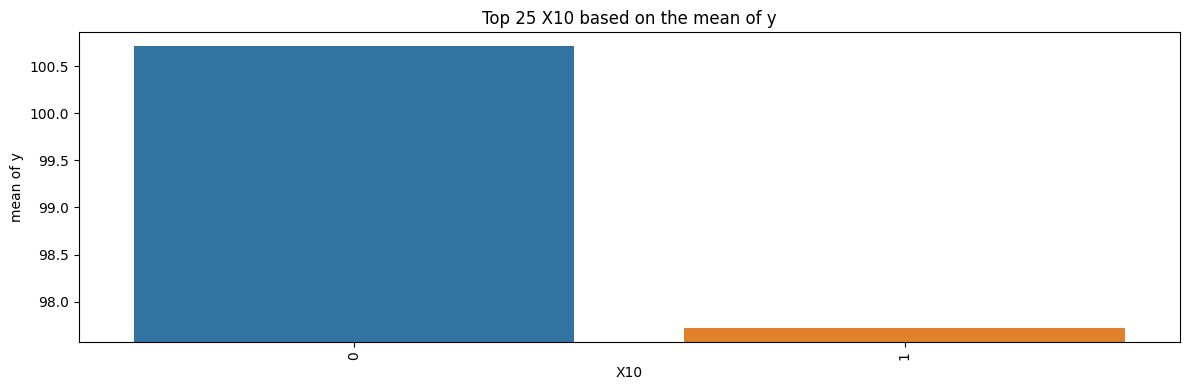

In [65]:
n = 25
for col in categorical_features[:8]:
    top_artists = df.groupby(col)['y'].mean().sort_values(ascending=False)
    plot_top_n(top_artists.head(n), col, f'mean of y', n)

# Multiple Feature Analysis

In [66]:
def plot_pos_neg(df, columns, plot_func, y_col, size=(12, 4), n_col=1):
    if len(columns) == 0:
        return
    n_rows = (len(columns) + n_col-1) // n_col
    fig, axes = plt.subplots(n_rows, n_col, figsize=(size[0]*n_col, size[1]*n_rows))
    if len(columns) == 1:
        axes = np.array([axes])
    axes = axes.flatten()
    
    for i, label in enumerate(columns):
        plot_func(df[df[y_col] >= df[y_col].median()], x=label, kde=True, color='green', label='Above Median', element='step', alpha=0.5, ax=axes[i])
        plot_func(df[df[y_col] <  df[y_col].median()], x=label, kde=True, color='red',   label='Below Median', element='step', alpha=0.5, ax=axes[i])
        axes[i].set_xlabel(label)
        axes[i].set_title(f'Above Median vs. Below Median {y_col} for {label}')

    for j in range(i+1, n_rows*n_col):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

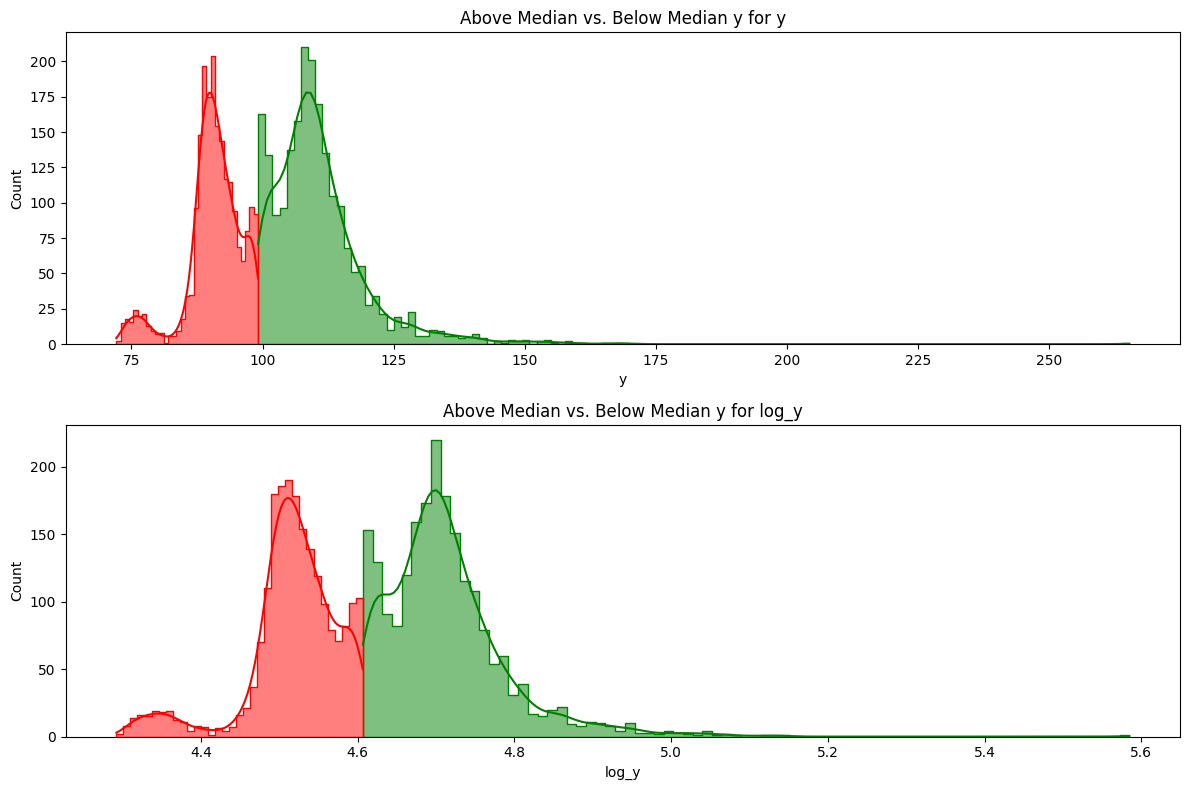

In [67]:
plot_pos_neg(df, numerical_features, sns.histplot, 'y')

In [68]:
def plot_scatter_comparison(df, plot_func, label, size=(4, 4), n_col=6):
    if len(df.columns) == 0:
        return
    n_rows = (len(df.columns) + n_col-1) // n_col
    fig, axes = plt.subplots(n_rows, n_col, figsize=(size[0]*n_col, size[1]*n_rows))
    if len(df.columns) == 1:
        axes = np.array([axes])
    axes = axes.flatten()

    for i, ylabel in enumerate(df.columns):
        plot_func(data=df, x=label, y=ylabel, ax=axes[i])
        axes[i].set_xlabel(label)
        axes[i].set_ylabel(ylabel)

    for j in range(i+1, n_rows*n_col):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

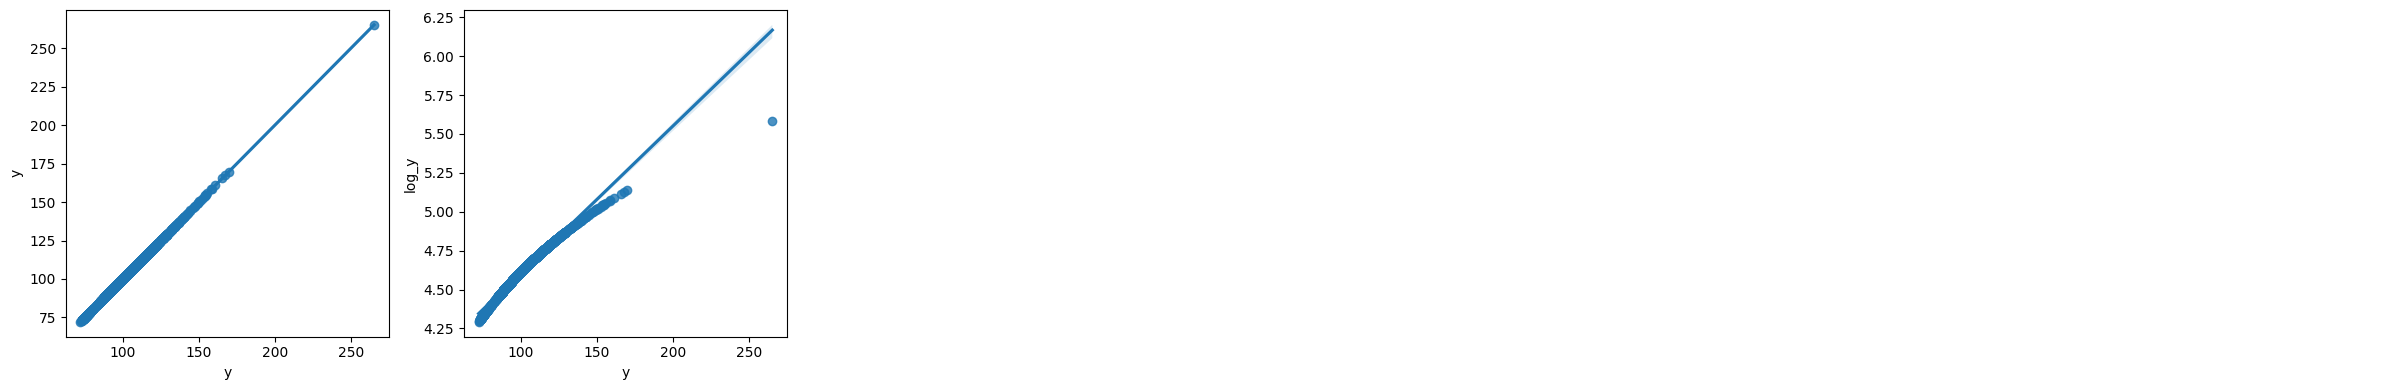

In [69]:
plot_scatter_comparison(df[numerical_features], sns.regplot, 'y')

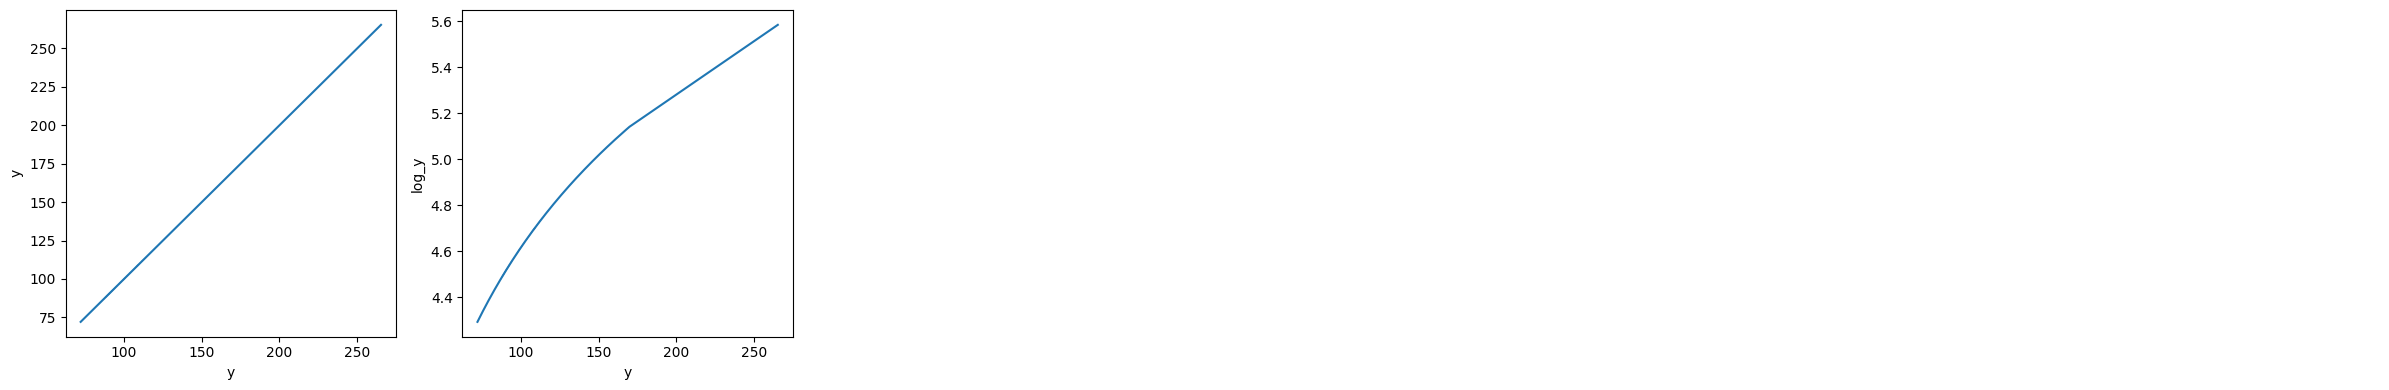

In [70]:
plot_scatter_comparison(df[numerical_features], sns.lineplot, 'y')

# Predictive Models

In [71]:
df.head()

y  X0  X1  X2  X3  X5  X6  X8  X10  X12  ...  X376  X377  X378  X379  \
0  130.81  32  23  17   0  24   9  14    0    0  ...     0     1     0     0   
1   88.53  32  21  19   4  28  11  14    0    0  ...     0     0     0     0   
2   76.26  20  24  34   2  27   9  23    0    0  ...     0     0     0     0   
3   80.62  20  21  34   5  27  11   4    0    0  ...     0     0     0     0   
4   78.02  20  23  34   5  12   3  13    0    0  ...     0     0     0     0   

   X380  X382  X383  X384  X385     log_y  
0     0     0     0     0     0  4.881361  
1     0     0     0     0     0  4.494574  
2     0     1     0     0     0  4.347176  
3     0     0     0     0     0  4.402074  
4     0     0     0     0     0  4.369701  

[5 rows x 360 columns]

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 360 entries, y to log_y
dtypes: float64(2), int64(358)
memory usage: 11.6 MB


In [73]:
train_test_df = pd.concat([df, test])
train_test_df_dummy = pd.get_dummies(train_test_df)

In [74]:
df_dummy, test_dummy = train_test_df_dummy[:len(df)], train_test_df_dummy[len(df):]
test_dummy = test_dummy.drop(columns=['y', 'log_y'])

In [75]:
df_dummy.head(10)

y  X0  X1  X2  X3  X5  X6  X8  X10  X12  ...  X376  X377  X378  X379  \
0  130.81  32  23  17   0  24   9  14    0    0  ...     0     1     0     0   
1   88.53  32  21  19   4  28  11  14    0    0  ...     0     0     0     0   
2   76.26  20  24  34   2  27   9  23    0    0  ...     0     0     0     0   
3   80.62  20  21  34   5  27  11   4    0    0  ...     0     0     0     0   
4   78.02  20  23  34   5  12   3  13    0    0  ...     0     0     0     0   
5   92.93  40   3  25   2  11   7  18    0    0  ...     0     1     0     0   
6  128.76   9  19  25   5  10   7  18    0    0  ...     0     0     0     0   
7   91.91  36  13  16   5  10   9   0    0    0  ...     0     0     0     0   
8  108.67  43  20  16   4  10   8   7    0    0  ...     0     0     0     0   
9  126.99  31   3  14   2  10   0   4    0    0  ...     0     1     0     0   

   X380  X382  X383  X384  X385     log_y  
0     0     0     0     0     0  4.881361  
1     0     0     0     0     0  4.494574  
2     0     1     0     0     0  4.347176  
3     0     0     0     0     0  4.402074  
4     0     0     0     0     0  4.369701  
5     0     0     0     0     0  4.542550  
6     0     0     0     0     0  4.865687  
7     0     0     0     0     0  4.531631  
8     0     0     0     0     0  4.697476  
9     0     0     0     0     0  4.851952  

[10 rows x 360 columns]

In [76]:
print(f'df_dummy.columns   : {df_dummy.columns}')
print(f'df_dummy.shape     : {df_dummy.shape}')

df_dummy.columns   : Index(['y', 'X0', 'X1', 'X2', 'X3', 'X5', 'X6', 'X8', 'X10', 'X12',
       ...
       'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384', 'X385',
       'log_y'],
      dtype='object', length=360)
df_dummy.shape     : (4209, 360)


In [77]:
dtype_str = df_dummy.dtypes.apply(lambda x: str(x))
dtypes_cnt = dtype_str.groupby(dtype_str).size()
dtypes_col = df_dummy.columns.groupby(dtype_str)

In [78]:
print("dtypes_cnt    :", dtypes_cnt.to_dict())
print("dtypes_col    :", dtypes_col)

dtypes_cnt    : {'float64': 2, 'int64': 358}
dtypes_col    : {'float64': ['y', 'log_y'], 'int64': ['X0', 'X1', 'X2', 'X3', 'X5', 'X6', 'X8', 'X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', ...]}


In [79]:
df_dummy.select_dtypes(include=['int64', 'float64']).describe()

y           X0           X1           X2           X3  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean    100.669318    29.760751    11.113566    17.306486     2.919696   
std      12.679381    13.738338     8.531001    10.899914     1.739912   
min      72.110000     0.000000     0.000000     0.000000     0.000000   
25%      90.820000    19.000000     3.000000     8.000000     2.000000   
50%      99.150000    35.000000    13.000000    16.000000     2.000000   
75%     109.010000    43.000000    20.000000    25.000000     5.000000   
max     265.320000    46.000000    26.000000    43.000000     6.000000   

                X5           X6           X8          X10          X12  ...  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000  ...   
mean     13.340223     6.807318    11.611309     0.013305     0.075077  ...   
std       8.250832     2.916973     7.037888     0.114590     0.263547  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       5.000000     6.000000     5.000000     0.000000     0.000000  ...   
50%      15.000000     7.000000    11.000000     0.000000     0.000000  ...   
75%      21.000000     9.000000    18.000000     0.000000     0.000000  ...   
max      28.000000    11.000000    24.000000     1.000000     1.000000  ...   

              X376         X377         X378         X379         X380  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean      0.057258     0.314802     0.020670     0.009503     0.008078   
std       0.232363     0.464492     0.142294     0.097033     0.089524   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     1.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              X382         X383         X384         X385        log_y  
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000  
mean      0.007603     0.001663     0.000475     0.001426     4.614342  
std       0.086872     0.040752     0.021796     0.037734     0.120474  
min       0.000000     0.000000     0.000000     0.000000     4.291965  
25%       0.000000     0.000000     0.000000     0.000000     4.519830  
50%       0.000000     0.000000     0.000000     0.000000     4.606669  
75%       0.000000     0.000000     0.000000     0.000000     4.700571  
max       1.000000     1.000000     1.000000     1.000000     5.584699  

[8 rows x 360 columns]

In [80]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4209 entries, 0 to 4208
Columns: 360 entries, y to log_y
dtypes: float64(2), int64(358)
memory usage: 11.6 MB


In [81]:
df_dummy.select_dtypes(include=['int64', 'float64']).isna().sum()

y        0
X0       0
X1       0
X2       0
X3       0
        ..
X382     0
X383     0
X384     0
X385     0
log_y    0
Length: 360, dtype: int64

In [82]:
import statistics
import lightgbm as lgb
import catboost as cat
import xgboost as xgb

from sklearn.metrics         import mean_squared_error, \
                                    mean_absolute_error, \
                                    mean_squared_log_error, \
                                    r2_score
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import StandardScaler, \
                                    OneHotEncoder
from sklearn.compose         import ColumnTransformer
from sklearn.impute          import SimpleImputer

from sklearn.svm             import SVR
from sklearn.tree            import DecisionTreeRegressor
from sklearn.linear_model    import LinearRegression, \
                                    BayesianRidge, \
                                    Ridge, \
                                    LassoCV
from sklearn.model_selection import KFold, \
                                    cross_val_score, \
                                    train_test_split
from sklearn.ensemble        import GradientBoostingRegressor, \
                                    RandomForestRegressor, \
                                    ExtraTreesRegressor, \
                                    AdaBoostRegressor, \
                                    BaggingRegressor, \
                                    StackingRegressor, \
                                    VotingRegressor
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.neural_network  import MLPRegressor

In [83]:
target = 'log_y'
y = df_dummy[target]
X = df_dummy.drop(columns=[target, 'y'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
numerical_features   = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(exclude=['int64', 'float64']).columns

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

In [85]:
models = {
    'DecisionTreeRegressor':     DecisionTreeRegressor(),
    'ExtraTreesRegressor':       ExtraTreesRegressor(),
    'KNeighborsRegressor':       KNeighborsRegressor(),
    'BayesianRidge':             BayesianRidge(),
    'BayesianRidge':             BayesianRidge(compute_score=True),
    'RandomForestRegressor':     RandomForestRegressor(n_estimators=100),
    'Ridge':                     Ridge(alpha = 10),
    'LassoCV':                   LassoCV(alphas = [1, 0.1, 0.001, 0.0005]),
    'XGBRegressor':              xgb.XGBRegressor(
                                    colsample_bytree=0.4603, 
                                    gamma=0.0468, 
                                    learning_rate=0.05, 
                                    max_depth=3, 
                                    min_child_weight=1.7817, 
                                    n_estimators=100,
                                    reg_alpha=0.4640, 
                                    reg_lambda=0.8571,
                                    subsample=0.5213
                                 ),
    'LGBMRegressor':             lgb.LGBMRegressor(
                                    objective='regression',
                                    num_leaves=5,
                                    learning_rate=0.05, 
                                    n_estimators=100,
                                    max_bin = 55, 
                                    bagging_fraction = 0.8,
                                    bagging_freq = 5, 
                                    feature_fraction = 0.2319,
                                    feature_fraction_seed=9, 
                                    bagging_seed=9,
                                    min_data_in_leaf =6, 
                                    min_sum_hessian_in_leaf = 11
                                 ),
    'GradientBoostingRegressor': GradientBoostingRegressor(
                                    n_estimators=100, 
                                    learning_rate=0.05,
                                    max_depth=4, 
                                    max_features='sqrt',
                                    min_samples_leaf=15, 
                                    min_samples_split=10, 
                                    loss='huber',
                                 ),
    'LightGBM':                  lgb.LGBMRegressor(
                                    n_estimators=100,
                                    learning_rate=0.01,
                                    num_leaves=63,
                                    max_depth=10,
                                    subsample=0.8,
                                    colsample_bytree=0.8,
                                 ),
    'CatBoostRegressor':         cat.CatBoostRegressor(silent=True),
    'AdaBoost':                  AdaBoostRegressor(),
    'Bagging Regressor':         BaggingRegressor(),
    'Stacking Regressor':        StackingRegressor(
                                    estimators=[
                                        ('rf', RandomForestRegressor()),
                                        ('svm', SVR()),
                                        ('xgb', xgb.XGBRegressor())
                                    ],
                                    final_estimator=LinearRegression()
                                 ),
    'Voting Regressor':          VotingRegressor(
                                    estimators=[
                                        ('rf', RandomForestRegressor()),
                                        ('xgb', xgb.XGBRegressor())
                                    ]
                                 ),
}

In [86]:
def evaluate_model(pipeline, X, y, kf):
    cv_mae = cross_val_score(pipeline, X, y, cv=kf, scoring='neg_mean_absolute_error')
    cv_mse = cross_val_score(pipeline, X, y, cv=kf, scoring='neg_mean_squared_error')
    cv_r2  = cross_val_score(pipeline, X, y, cv=kf, scoring='r2')
    
    mae = -statistics.mean(cv_mae)
    mse = -statistics.mean(cv_mse)
    rmse = np.sqrt(mse)
    r2 = statistics.mean(cv_r2)
    
    return mae, mse, rmse, r2

In [87]:
import time

results = {}

kf = KFold(n_splits=5, shuffle=True)

for name, model in models.items():

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    print(f'Model {name} begining now ...')
    begin_time = time.time()
    mae, mse, rmse, r2 = evaluate_model(pipeline, X, y, kf)
    end_time = time.time()
    print(f'Model {name} finishing in'.ljust(50), f'{round((end_time - begin_time) / 60, 1)} minutes')

    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R^2': r2
    }

Model DecisionTreeRegressor begining now ...
Model DecisionTreeRegressor finishing in           0.1 minutes
Model ExtraTreesRegressor begining now ...
Model ExtraTreesRegressor finishing in             2.5 minutes
Model KNeighborsRegressor begining now ...
Model KNeighborsRegressor finishing in             0.1 minutes
Model BayesianRidge begining now ...
Model BayesianRidge finishing in                   0.1 minutes
Model RandomForestRegressor begining now ...
Model RandomForestRegressor finishing in           1.8 minutes
Model Ridge begining now ...
Model Ridge finishing in                           0.1 minutes
Model LassoCV begining now ...
Model LassoCV finishing in                         0.3 minutes
Model XGBRegressor begining now ...
Model XGBRegressor finishing in                    0.1 minutes
Model LGBMRegressor begining now ...
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [

In [88]:
results_df = pd.DataFrame(results).T
results_df

MAE       MSE      RMSE       R^2
DecisionTreeRegressor      0.073385  0.012074  0.109882  0.204838
ExtraTreesRegressor        0.061035  0.007611  0.087238  0.480121
KNeighborsRegressor        0.064161  0.008161  0.090338  0.441280
BayesianRidge              0.052116  0.005735  0.075727  0.606322
RandomForestRegressor      0.055148  0.006127  0.078274  0.554472
Ridge                      0.053251  0.005964  0.077226  0.594211
LassoCV                    0.050933  0.005584  0.074725  0.612417
XGBRegressor               0.050561  0.005475  0.073995  0.622611
LGBMRegressor              0.050203  0.005454  0.073853  0.623764
GradientBoostingRegressor  0.048451  0.005607  0.074882  0.611507
LightGBM                   0.058779  0.006720  0.081977  0.535562
CatBoostRegressor          0.051757  0.005771  0.075965  0.604754
AdaBoost                   0.095455  0.012376  0.111247  0.154344
Bagging Regressor          0.056954  0.006832  0.082657  0.523951
Stacking Regressor         0.053738  0.006105  0.078132  0.588124
Voting Regressor           0.054114  0.006128  0.078285  0.574633

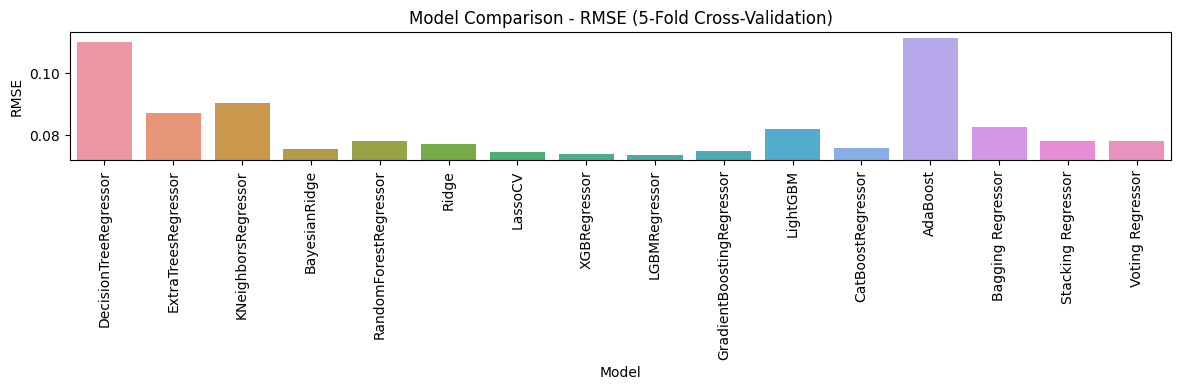

In [89]:
results_df.reset_index(inplace=True)
rmse_df = results_df[['index', 'RMSE']]

plt.figure(figsize=(12, 4))
sns.barplot(data=rmse_df, x='index', y='RMSE')

plt.title("Model Comparison - RMSE (5-Fold Cross-Validation)")
plt.xlabel("Model")
plt.ylabel("RMSE")
yminlim = rmse_df['RMSE'].min()
ymaxlim = rmse_df['RMSE'].max()
yrange = (ymaxlim - yminlim) * .05
yminlim -= yrange
ymaxlim += yrange
plt.ylim(yminlim, ymaxlim)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [90]:
best_regressor_name = results_df.sort_values(by=['RMSE']).head(1)['index'].iloc[0]
best_regressor = models[best_regressor_name]

In [91]:
best_model = best_regressor.fit(X_train, y_train)

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319

In [92]:
pred = best_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, pred))

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


0.07238836503111444

# Submission

In [94]:
submission = pd.DataFrame({
    'ID': test_id,
    'y': np.expm1(best_model.predict(test_dummy)),
})
submission.head()

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


ID           y
0   1   77.731536
1   2   94.116485
2   3   77.638438
3   4   77.829200
4   5  109.465613

In [95]:
submission.to_csv("submission_base.csv", index = False, header = True)